In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns
import tensorflow as tf # This code has been tested with TensorFlow 1.6


In [2]:
SBI=pd.read_csv('data/SBI/daily_NSE_SBIN.csv')
SBI.set_index('timestamp',inplace=True)
AXISBANK=pd.read_csv('data/SBI/daily_NSE_AXISBANK.csv')
AXISBANK.set_index('timestamp',inplace=True)
BANKBARODA=pd.read_csv('data/SBI/daily_NSE_BANKBARODA.csv')
BANKBARODA.set_index('timestamp',inplace=True)
HDFCBANK=pd.read_csv('data/SBI/daily_NSE_HDFCBANK.csv')
HDFCBANK.set_index('timestamp',inplace=True)
ICICIBANK=pd.read_csv('data/SBI/daily_NSE_ICICIBANK.csv')
ICICIBANK.set_index('timestamp',inplace=True)
PNB=pd.read_csv('data/SBI/daily_NSE_PNB.csv')
PNB.set_index('timestamp',inplace=True)



In [3]:
SBI['SBI']=SBI['close']
AXISBANK['AXISBANK']=AXISBANK['open']
BANKBARODA['BANKBARODA']=BANKBARODA['open']
HDFCBANK['HDFCBANK']=HDFCBANK['open']
ICICIBANK['ICICIBANK']=ICICIBANK['open']
PNB['PNB']=PNB['open']

dataSet=pd.concat([SBI, AXISBANK, BANKBARODA,HDFCBANK,ICICIBANK,PNB], axis=1)
dataSet=dataSet[['AXISBANK','BANKBARODA','HDFCBANK','ICICIBANK','PNB','SBI']]
dataSet=dataSet.dropna()
dataSet

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,AXISBANK,BANKBARODA,HDFCBANK,ICICIBANK,PNB,SBI
2002-07-01,7.61,12.80,40.0000,25.4182,9.60,22.8379
2002-07-02,7.88,12.08,42.6000,25.4545,9.60,22.8143
2002-07-03,7.80,12.38,42.0000,26.7273,9.46,22.5879
2002-07-04,7.80,12.23,42.0600,28.1818,9.56,22.6728
2002-07-05,8.02,12.19,43.6900,27.0909,9.90,22.7672
2002-07-08,7.90,11.80,42.3500,27.8818,9.90,22.8190
2002-07-09,8.16,11.82,42.4600,27.4000,9.90,22.7200
2002-07-10,8.39,12.20,42.0000,27.2364,9.76,22.9747
2002-07-11,8.51,12.19,42.2000,27.0818,9.70,22.1775
2002-07-12,8.19,12.20,42.2000,27.2727,9.45,22.1208


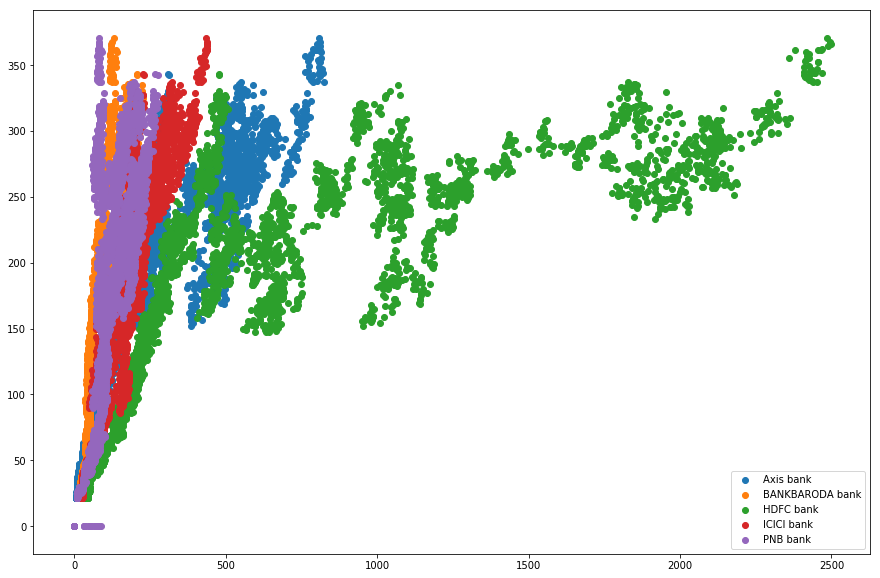

In [4]:
plt.figure(figsize=(15,10))
plt.scatter(dataSet['AXISBANK'],dataSet['SBI'],label='Axis bank')
plt.scatter(dataSet['BANKBARODA'],dataSet['SBI'],label='BANKBARODA bank')
plt.scatter(dataSet['HDFCBANK'],dataSet['SBI'],label='HDFC bank')
plt.scatter(dataSet['ICICIBANK'],dataSet['SBI'],label='ICICI bank')
plt.scatter(dataSet['PNB'],dataSet['SBI'],label='PNB bank')
plt.legend()
plt.show()

In [5]:
results = sm.ols(formula='SBI ~ AXISBANK', data=dataSet).fit()

In [6]:
Y_pred = results.predict(dataSet[["AXISBANK"]])

In [7]:

residual = dataSet["SBI"].values-Y_pred

In [8]:
residual

2002-07-01   -57.571915
2002-07-02   -57.701324
2002-07-03   -57.896374
2002-07-04   -57.811474
2002-07-05   -57.803289
2002-07-08   -57.704462
2002-07-09   -57.905353
2002-07-10   -57.740787
2002-07-11   -58.585013
2002-07-12   -58.516309
2002-07-15   -58.728523
2002-07-16   -59.068123
2002-07-17   -58.865409
2002-07-18   -58.752383
2002-07-19   -58.936196
2002-07-22   -59.006996
2002-07-23   -58.655860
2002-07-24   -58.881406
2002-07-25   -59.099621
2002-07-26   -59.181730
2002-07-29   -58.669353
2002-07-30   -58.869115
2002-07-31   -58.186317
2002-08-01   -58.660126
2002-08-02   -58.429187
2002-08-05   -58.891006
2002-08-06   -58.576107
2002-08-07   -58.256075
2002-08-08   -58.544222
2002-08-09   -58.414306
                ...    
2019-05-24   -27.533817
2019-05-27   -26.885772
2019-05-28   -37.274850
2019-05-29   -44.932330
2019-05-30   -38.660726
2019-05-31   -42.747849
2019-06-03   -40.797161
2019-06-04   -41.495839
2019-06-06   -63.442379
2019-06-07   -53.237038
2019-06-10   -49

In [9]:
x_data=dataSet[['AXISBANK','BANKBARODA','HDFCBANK','ICICIBANK','PNB']]
y_data=dataSet[['SBI']]

In [10]:
print(x_data.shape)
print(y_data.shape)

(4240, 5)
(4240, 1)


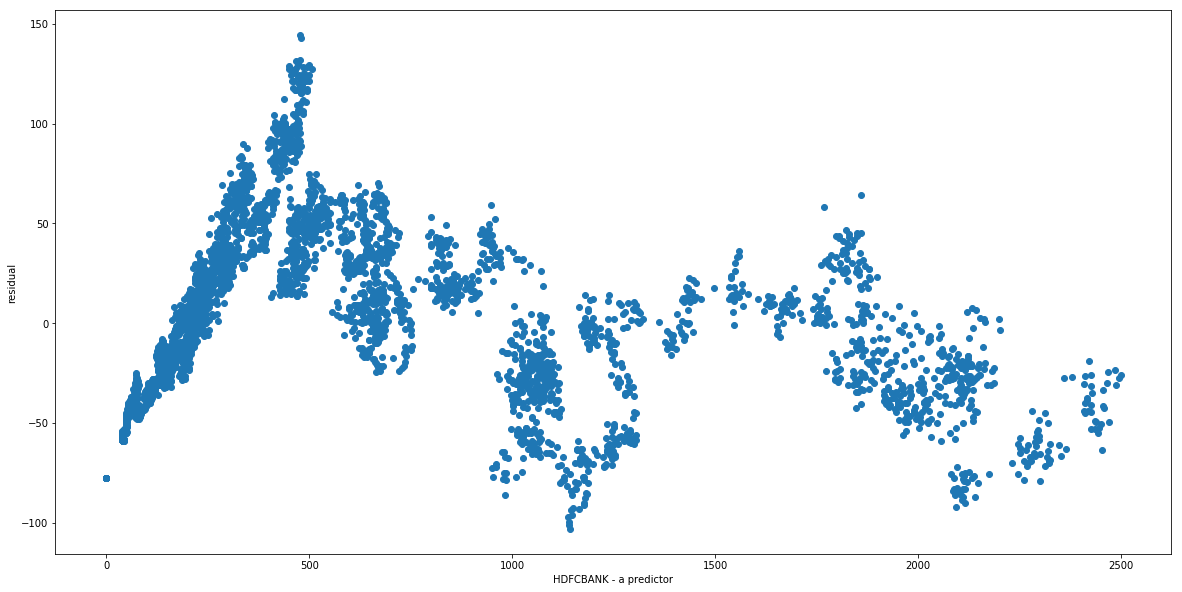

In [11]:
plt.figure(figsize=(20,10))
plt.scatter(dataSet[["HDFCBANK"]],residual)
plt.xlabel("HDFCBANK - a predictor")
plt.ylabel("residual")
plt.show()

In [12]:
results = sm.ols(formula='SBI~AXISBANK+BANKBARODA+HDFCBANK+ICICIBANK+PNB',data =dataSet).fit()
results

In [13]:
Y_ols_pred=results.predict(x_data)


In [14]:
x_data.columns.values
dataSet
dataSet.reset_index(inplace=True)
dataSet

,index,AXISBANK,BANKBARODA,HDFCBANK,ICICIBANK,PNB,SBI
0,2002-07-01,7.61,12.80,40.0000,25.4182,9.60,22.8379
1,2002-07-02,7.88,12.08,42.6000,25.4545,9.60,22.8143
2,2002-07-03,7.80,12.38,42.0000,26.7273,9.46,22.5879
3,2002-07-04,7.80,12.23,42.0600,28.1818,9.56,22.6728
4,2002-07-05,8.02,12.19,43.6900,27.0909,9.90,22.7672
5,2002-07-08,7.90,11.80,42.3500,27.8818,9.90,22.8190
6,2002-07-09,8.16,11.82,42.4600,27.4000,9.90,22.7200
7,2002-07-10,8.39,12.20,42.0000,27.2364,9.76,22.9747
8,2002-07-11,8.51,12.19,42.2000,27.0818,9.70,22.1775
9,2002-07-12,8.19,12.20,42.2000,27.2727,9.45,22.1208


In [15]:
# Training and test data
# Dimensions of dataset
dataSet=dataSet.drop(['index'],axis=1)
data=dataSet.values
n = data.shape[0]
p = data.shape[1]

train_start = 0
train_end = int(np.floor(0.8*n))
test_start = train_end
test_end = n
data_train = data[np.arange(train_start, train_end), :]
data_test = data[np.arange(test_start, test_end), :]
data_train

array([[   7.61  ,   12.8   ,   40.    ,   25.4182,    9.6   ,   22.8379],
       [   7.88  ,   12.08  ,   42.6   ,   25.4545,    9.6   ,   22.8143],
       [   7.8   ,   12.38  ,   42.    ,   26.7273,    9.46  ,   22.5879],
       ...,
       [ 400.    ,  123.55  , 1021.    ,  207.727 ,   88.65  ,  175.6   ],
       [ 419.4   ,  126.3   , 1025.7   ,  211.455 ,   89.9   ,  184.6   ],
       [ 429.75  ,  132.4   , 1039.95  ,  214.5   ,   94.    ,  182.95  ]])

In [16]:
# Scale data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_train = scaler.fit_transform(data_train)
data_test = scaler.transform(data_test)
# Build X and y
X_train = data_train[:, 1:]
y_train = data_train[:, 0]
X_test = data_test[:, 1:]
y_test = data_test[:, 0]


In [17]:
y_train

array([0.0116915 , 0.01210631, 0.01198341, ..., 0.61453372, 0.64433861,
       0.66023967])

In [18]:
Y_ols_pred

2002-07-01     12.702806
2002-07-02     12.876292
2002-07-03     13.059778
2002-07-04     13.542536
2002-07-05     13.582509
2002-07-08     13.780749
2002-07-09     13.688113
2002-07-10     13.524368
2002-07-11     13.459235
2002-07-12     13.273901
2002-07-15     14.544382
2002-07-16     13.152339
2002-07-17     13.177365
2002-07-18     13.103689
2002-07-19     12.318597
2002-07-22     12.916031
2002-07-23     12.913788
2002-07-24     12.616868
2002-07-25     13.234061
2002-07-26     12.379101
2002-07-29     12.392669
2002-07-30     12.688766
2002-07-31     12.052763
2002-08-01     12.304345
2002-08-02     13.502184
2002-08-05     12.969493
2002-08-06     12.489663
2002-08-07     12.601149
2002-08-08     12.231432
2002-08-09     12.300115
                 ...    
2019-05-24    328.060322
2019-05-27    337.040197
2019-05-28    343.260478
2019-05-29    336.213465
2019-05-30    332.020618
2019-05-31    335.536221
2019-06-03    334.027933
2019-06-04    332.755053
2019-06-06    334.112186


In [19]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SBI   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 2.248e+04
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        12:43:38   Log-Likelihood:                -18122.
No. Observations:                4240   AIC:                         3.626e+04
Df Residuals:                    4234   BIC:                         3.629e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3835      0.731     -3.259      0.001      -3.817      -0.950
AXISBANK       0.1391      0.006     21.436      0.000       0.126       0.152
BANKBARODA    -0.0881      0.016     -5.397      0.000      -0.120      -0.056
HDFCBANK       0.0241      0.002     15.483      0.000       0.021       0.027
ICICIBANK      0.2692      0.010     25.998      0.000       0.249       0.290
PNB            0.7653      0.013     59.119      0.000       0.740       0.791
==============================================================================
Omnibus:                       91.171   Durbin-Watson:                   0.141
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.691
Skew:                           0.176   Prob(JB):                     4.02e-14
Kurtosis:                       2.526   Cond. No.                     2.68e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
co_relations=dataSet.corr()

In [21]:
co_relations

,AXISBANK,BANKBARODA,HDFCBANK,ICICIBANK,PNB,SBI
AXISBANK,1.000000,0.767618,0.940925,0.943636,0.393810,0.877813
BANKBARODA,0.767618,1.000000,0.618432,0.776891,0.823702,0.901898
HDFCBANK,0.940925,0.618432,1.000000,0.887263,0.206565,0.770733
ICICIBANK,0.943636,0.776891,0.887263,1.000000,0.500752,0.918564
PNB,0.393810,0.823702,0.206565,0.500752,1.000000,0.736258
SBI,0.877813,0.901898,0.770733,0.918564,0.736258,1.000000


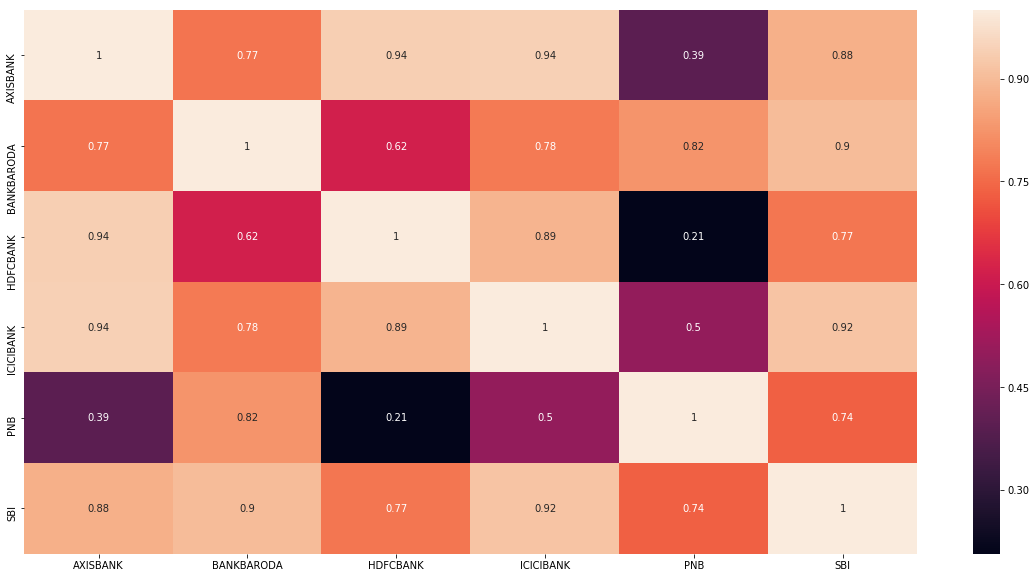

In [22]:
plt.figure(figsize=(20,10))
sns.heatmap(co_relations, annot=True)
plt.show()

## Tensorflow Starts 

In [23]:
import tensorflow as tf
import numpy as np
n=5
y_data=np.reshape(y_data, -1)
y_data


,SBI
2002-07-01,22.8379
2002-07-02,22.8143
2002-07-03,22.5879
2002-07-04,22.6728
2002-07-05,22.7672
2002-07-08,22.8190
2002-07-09,22.7200
2002-07-10,22.9747
2002-07-11,22.1775
2002-07-12,22.1208


In [24]:
# Initializers
sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)
bias_initializer = tf.zeros_initializer()

In [25]:
# Model architecture parameters
n_stocks = 5
n_neurons_1 = 1024
n_neurons_2 = 512
n_neurons_3 = 256
n_neurons_4 = 128
n_target = 1
# Placeholder
X = tf.placeholder(dtype=tf.float32, shape=[None, n_stocks])
Y = tf.placeholder(dtype=tf.float32, shape=[None])

# Layer 1: Variables for hidden weights and biases
W_hidden_1 = tf.Variable(weight_initializer([n_stocks, n_neurons_1]))
bias_hidden_1 = tf.Variable(bias_initializer([n_neurons_1]))
# Layer 2: Variables for hidden weights and biases
W_hidden_2 = tf.Variable(weight_initializer([n_neurons_1, n_neurons_2]))
bias_hidden_2 = tf.Variable(bias_initializer([n_neurons_2]))
# Layer 3: Variables for hidden weights and biases
W_hidden_3 = tf.Variable(weight_initializer([n_neurons_2, n_neurons_3]))
bias_hidden_3 = tf.Variable(bias_initializer([n_neurons_3]))
# Layer 4: Variables for hidden weights and biases
W_hidden_4 = tf.Variable(weight_initializer([n_neurons_3, n_neurons_4]))
bias_hidden_4 = tf.Variable(bias_initializer([n_neurons_4]))

# Output layer: Variables for output weights and biases
W_out = tf.Variable(weight_initializer([n_neurons_4, n_target]))
bias_out = tf.Variable(bias_initializer([n_target]))

In [26]:
# Hidden layer
hidden_1 = tf.nn.relu(tf.add(tf.matmul(X, W_hidden_1), bias_hidden_1))
hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, W_hidden_2), bias_hidden_2))
hidden_3 = tf.nn.relu(tf.add(tf.matmul(hidden_2, W_hidden_3), bias_hidden_3))
hidden_4 = tf.nn.relu(tf.add(tf.matmul(hidden_3, W_hidden_4), bias_hidden_4))

# Output layer (must be transposed)
out = tf.transpose(tf.add(tf.matmul(hidden_4, W_out), bias_out))

In [27]:
# Cost function
mse = tf.reduce_mean(tf.squared_difference(out, Y))

In [28]:
# Optimizer
opt = tf.train.AdamOptimizer().minimize(mse)

In [29]:
t=data_train[3000:3001]
print(t)
tt=t[:,:-1]
tt

X_train = data_train[:, 1:]
y_train = data_train[:, 0]
X_test = data_test[:, 1:]
y_test = data_test[:, 0]



[[0.56229836 0.73467601 0.7378953  0.73900142 0.70284407 0.75233366]]


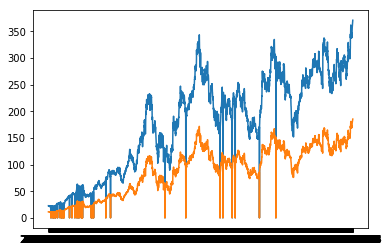

[[0.24699254 0.2469416  0.24145548 0.24277675 0.24010396 0.23427048
  0.23554331 0.23692639 0.24080257 0.23574723 0.23197603 0.22618729
  0.22237572 0.22465964 0.23492296 0.22821002 0.23354882 0.23259903
  0.23410721 0.23309015 0.22465436 0.22545542 0.22436762 0.22568065
  0.2297204  0.24261309 0.24671249 0.2477279  0.246729   0.24253075
  0.24613662 0.24240832 0.24627358 0.24698325 0.24781452 0.2509962
  0.24901967 0.25243697 0.25531185 0.25408733 0.2524389  0.24792898
  0.25261092 0.25697845 0.25638473 0.26069835 0.2573109  0.25169972
  0.2504427  0.24914931 0.25081268 0.25502378 0.25845328 0.26017237
  0.25898364 0.26467782 0.26792508 0.27058917 0.26783502 0.27059326
  0.2696668  0.26747465 0.26436803 0.26243675 0.2582839  0.25734156
  0.257705   0.25982893 0.2644561  0.26160884 0.2669052  0.26585644
  0.26021987 0.25865522 0.25592083 0.25521812 0.25265223 0.25140318
  0.24947909 0.25216624 0.25891313 0.26307854 0.2668091  0.26778868
  0.26740396 0.26410547 0.26609698 0.2656556  0.2

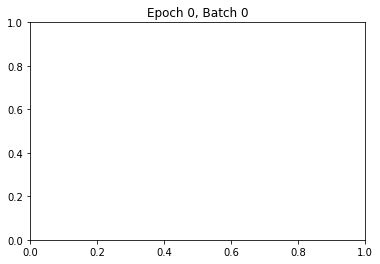

[[0.40094218 0.40029025 0.39161244 0.3942584  0.3903091  0.3805576
  0.3819754  0.38447687 0.3901598  0.38129956 0.37590533 0.36735842
  0.36052844 0.36468518 0.37748232 0.3689238  0.37579018 0.37569988
  0.3770782  0.37542427 0.36258912 0.36233953 0.36101192 0.36375844
  0.37088215 0.3911965  0.39764792 0.40033114 0.3989063  0.39261705
  0.39768296 0.39252853 0.39833096 0.400015   0.40059212 0.40596515
  0.40328723 0.40889764 0.41362464 0.41238236 0.40899864 0.4030311
  0.41087097 0.41713527 0.416556   0.42137846 0.4161929  0.4082629
  0.40637475 0.4041555  0.40723124 0.41302288 0.41850954 0.42173052
  0.42072326 0.4290476  0.43364102 0.43670487 0.4336692  0.43735665
  0.43647012 0.4323336  0.4284306  0.42543977 0.41921824 0.4186019
  0.41973794 0.42236614 0.43022555 0.4253605  0.433458   0.43237698
  0.42440873 0.42360276 0.4194858  0.4174451  0.41387427 0.41168457
  0.4088868  0.41367668 0.42530805 0.43244883 0.43837327 0.44011828
  0.43901688 0.43396756 0.43694302 0.4363361  0.4426

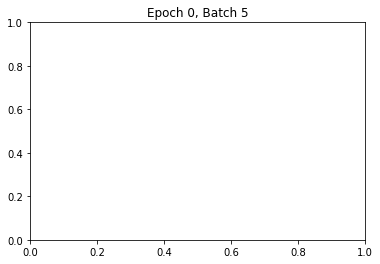

[[0.6229416  0.62150997 0.60820067 0.6130686  0.60753417 0.59211123
  0.5942536  0.5979877  0.6063719  0.59226793 0.5845826  0.57208157
  0.5606306  0.56675106 0.58606625 0.5735283  0.58347934 0.5836727
  0.5851191  0.5832729  0.56323624 0.56234986 0.55988336 0.56441396
  0.5760995  0.60681915 0.6169239  0.62126344 0.6191599  0.6093993
  0.6172826  0.60957503 0.61846286 0.6211044  0.6216536  0.6301737
  0.62564087 0.6343052  0.6418065  0.64023393 0.63528425 0.62648404
  0.6384496  0.6482475  0.6474391  0.6541475  0.64687026 0.6349594
  0.63228405 0.62857187 0.63321227 0.6420343  0.6503008  0.6561821
  0.6550262  0.66732717 0.67397887 0.6785407  0.6739249  0.6798777
  0.6790931  0.6726333  0.66722584 0.66273105 0.653377   0.6528898
  0.6547631  0.658      0.67083174 0.6632302  0.6758557  0.6748766
  0.6634444  0.66336286 0.6567068  0.6532293  0.6479497  0.6448955
  0.64084154 0.6481545  0.6668564  0.6775839  0.68605447 0.6888986
  0.686648   0.67904127 0.68357474 0.68278354 0.69193625 0

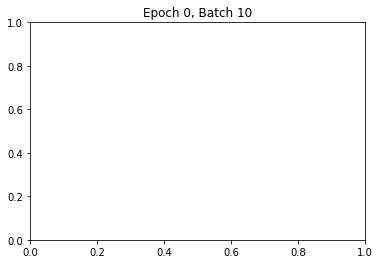

[[0.5692141  0.5668374  0.5552201  0.5612631  0.5571058  0.5423219
  0.54401535 0.5472647  0.5539884  0.54043514 0.53515434 0.5249529
  0.5131796  0.5183214  0.53616285 0.5257431  0.5347873  0.535493
  0.53528845 0.53465915 0.515923   0.5144162  0.5115702  0.51624835
  0.52797943 0.5552307  0.564266   0.56880593 0.5664777  0.55760306
  0.5646982  0.55790496 0.5660078  0.56844205 0.5685703  0.5765228
  0.5718082  0.5795824  0.5868172  0.5861527  0.58185744 0.57454765
  0.58562803 0.594692   0.59417886 0.59886074 0.5935029  0.5833087
  0.58135    0.57757646 0.5816045  0.5898476  0.5969522  0.6035073
  0.6033429  0.6137903  0.61842597 0.6226231  0.6184722  0.62460846
  0.624956   0.61902845 0.6155375  0.6117004  0.60351527 0.6037763
  0.60595787 0.60797954 0.62074935 0.61382604 0.625948   0.6256348
  0.61598593 0.61757696 0.6111976  0.6071796  0.60243297 0.5999285
  0.59641874 0.603199   0.6214455  0.6309061  0.6382818  0.6405277
  0.638358   0.63133985 0.63566947 0.6350367  0.642697   0.

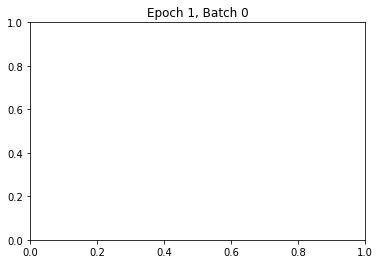

[[0.67863834 0.6751226  0.66126174 0.6694934  0.66522783 0.64732784
  0.648561   0.6526732  0.6598236  0.6429103  0.6375628  0.6267988
  0.6116113  0.61806947 0.6369914  0.62597305 0.63609284 0.6377291
  0.63637805 0.6359526  0.6138743  0.6111507  0.60776305 0.61378497
  0.6284577  0.6604048  0.6711258  0.6770847  0.6742403  0.66395694
  0.6719771  0.6643618  0.6738245  0.67695266 0.6766782  0.6861869
  0.6806148  0.68998486 0.6987404  0.698514   0.69306046 0.685509
  0.6989105  0.70908487 0.7088163  0.7130193  0.7070467  0.6956801
  0.693605   0.68896556 0.69391155 0.7033161  0.7115299  0.7199478
  0.72033083 0.7322919  0.7373741  0.74177516 0.7373346  0.7444956
  0.74541533 0.7381276  0.7348182  0.73040354 0.72100407 0.72173846
  0.72464114 0.7265714  0.7422598  0.7338663  0.7484539  0.7486596
  0.7379686  0.7413567  0.7339043  0.7282989  0.7231938  0.72036797
  0.71685636 0.72507745 0.7478677  0.75933844 0.76722485 0.77040905
  0.7667694  0.75904566 0.7637048  0.7632205  0.77210385 

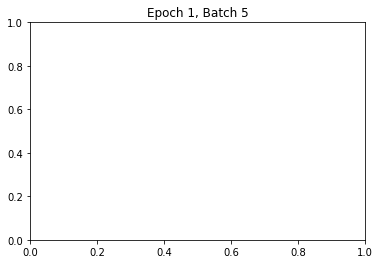

[[0.71515006 0.7111025  0.69575447 0.705293   0.7008428  0.68149275
  0.6822044  0.68670034 0.69388    0.67530787 0.67011863 0.65962195
  0.6428728  0.64990336 0.6678846  0.65701073 0.666703   0.66917294
  0.66733336 0.66694015 0.643786   0.64017695 0.63666695 0.6433181
  0.6593699  0.69353235 0.7048875  0.71174425 0.7085529  0.6978069
  0.7059411  0.6983034  0.7081457  0.7118309  0.71106046 0.7214546
  0.715751   0.72573847 0.73508245 0.73510253 0.7291778  0.72159606
  0.7359035  0.7465543  0.7463728  0.7499313  0.7436234  0.7318917
  0.7296612  0.7246835  0.7301305  0.73959833 0.74849826 0.7577979
  0.7583917  0.77100223 0.7765364  0.78056055 0.77636164 0.7835544
  0.78437173 0.7764322  0.77283746 0.7682108  0.75826627 0.75925916
  0.7626508  0.76460916 0.7814621  0.7723188  0.7879657  0.7883847
  0.77738047 0.78185934 0.77413386 0.7678186  0.76284474 0.7598439
  0.75656426 0.7655595  0.7904109  0.8025841  0.8105699  0.81442964
  0.8098276  0.8018812  0.8066409  0.80625993 0.8155944 

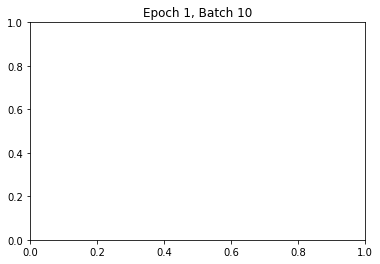

[[0.673081   0.6687762  0.6538574  0.6635106  0.659661   0.6409114
  0.64063215 0.6451556  0.6513578  0.6332348  0.62904364 0.62064
  0.6040454  0.6112036  0.6257374  0.6169132  0.62510365 0.62858754
  0.62560755 0.6256133  0.6040204  0.59943163 0.5961693  0.60296404
  0.61903745 0.6514703  0.66199964 0.66945493 0.6657331  0.6559413
  0.6628905  0.6562441  0.6653141  0.66929895 0.66801864 0.67806965
  0.67311466 0.6827345  0.6915652  0.6920283  0.6859692  0.67982686
  0.6938185  0.7031442  0.7033226  0.70522213 0.6992536  0.689032
  0.68710524 0.68234414 0.68776333 0.69613546 0.70456153 0.7139444
  0.7150467  0.72668225 0.731644   0.73454577 0.7313045  0.7376407
  0.738621   0.7309199  0.72813815 0.7239583  0.71477365 0.71623296
  0.71994525 0.72156227 0.7378832  0.7289709  0.7439242  0.7446582
  0.7346652  0.73992854 0.73297644 0.7261004  0.72163117 0.7187564
  0.7162021  0.7251032  0.7496546  0.7616788  0.76888    0.7731212
  0.7678154  0.76074606 0.7648377  0.76479864 0.77383655 0.7

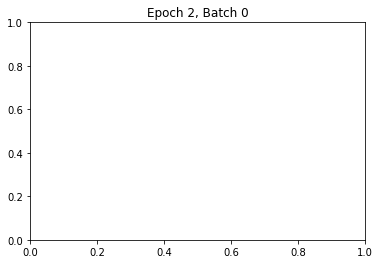

[[0.6909403  0.68605524 0.6700819  0.68040526 0.67636997 0.6566995
  0.6558529  0.6607682  0.666847   0.64740354 0.64342123 0.6354827
  0.6177173  0.6259415  0.6385053  0.6304481  0.63790363 0.64253217
  0.6387751  0.63872427 0.6166998  0.6109783  0.6077244  0.615174
  0.6325502  0.66644835 0.67735535 0.6857431  0.68183553 0.6718951
  0.678636   0.67216384 0.6814384  0.6860016  0.68412626 0.69481736
  0.690005   0.7000852  0.7092516  0.71014345 0.70342404 0.69782823
  0.71254    0.72170806 0.72210604 0.72292364 0.716618   0.70662075
  0.70453477 0.6996138  0.70557266 0.7135914  0.72246635 0.7323824
  0.7338738  0.7457225  0.7509162  0.75320286 0.75047666 0.756503
  0.7574878  0.74918354 0.7463266  0.74206233 0.732597   0.7343807
  0.73869395 0.7403063  0.7572542  0.74770623 0.7631666  0.7640764
  0.75403666 0.7604299  0.75362545 0.7458189  0.7415981  0.73852366
  0.7363805  0.7459657  0.772219   0.78528315 0.79241353 0.79753727
  0.79093105 0.7842055  0.78788733 0.78815633 0.7978341  0

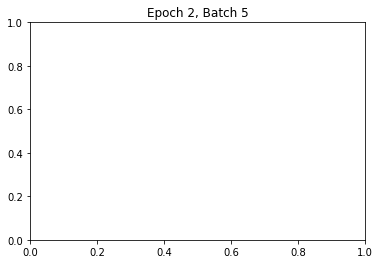

[[0.690712   0.6855107  0.66870904 0.679523   0.67537063 0.6550853
  0.6536646  0.65880287 0.6647532  0.6445723  0.6408036  0.6336199
  0.6150874  0.6239935  0.63448477 0.6272144  0.63365865 0.6392765
  0.6348887  0.63493365 0.61289084 0.6062746  0.60307103 0.61090493
  0.6291467  0.66394544 0.67492723 0.684168   0.67975944 0.6699075
  0.67625844 0.67007756 0.6793412  0.68439585 0.6820336  0.6932143
  0.68871635 0.6991156  0.7083714  0.7094727  0.70243967 0.69733906
  0.7125695  0.7214824  0.7221037  0.72179526 0.7152302  0.7055968
  0.7034285  0.698509   0.70483077 0.7123032  0.7215444  0.7318876
  0.73376703 0.745696   0.7511672  0.75259733 0.7505305  0.7559836
  0.7568084  0.74808896 0.745098   0.7408638  0.7313181  0.7334112
  0.73823315 0.7398914  0.7571663  0.74712294 0.7628694  0.7639526
  0.7541951  0.7614318  0.75494206 0.7464101  0.74244976 0.73918545
  0.7375629  0.74763274 0.775092   0.7888757  0.7958265  0.8017479
  0.79400504 0.787675   0.7909506  0.7915689  0.8016683  0.

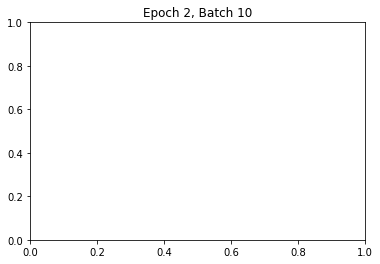

[[0.7223424  0.71720964 0.69892335 0.7101229  0.7054071  0.68412733
  0.68262815 0.6880578  0.6945587  0.67326844 0.66890764 0.66110814
  0.64178896 0.65106285 0.66175896 0.653986   0.6605109  0.66645217
  0.66217726 0.6619477  0.6388961  0.63194454 0.6287719  0.63693166
  0.6559552  0.6928675  0.7044927  0.7141702  0.7097205  0.69934356
  0.7060333  0.6995226  0.7092645  0.7146493  0.7121514  0.7239994
  0.71945906 0.730484   0.7401403  0.7410828  0.7336229  0.72800195
  0.7440965  0.7533918  0.75401866 0.75394666 0.7466917  0.7363804
  0.7339624  0.72884    0.735602   0.7433016  0.75321436 0.7639415
  0.76581323 0.7784374  0.7845893  0.7859502  0.783867   0.789323
  0.78986514 0.7805828  0.7771827  0.77268875 0.76248133 0.7646177
  0.7697528  0.7716061  0.789616   0.77893794 0.7955011  0.79662246
  0.786459   0.7935101  0.78663087 0.7780793  0.7739189  0.7703957
  0.7686171  0.77917576 0.8076966  0.8221133  0.82966185 0.83593124
  0.8279226  0.8210902  0.82466745 0.8252349  0.8359678

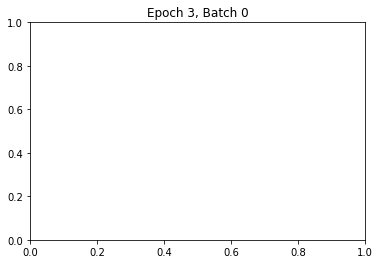

[[0.716579   0.71125126 0.6919178  0.70367205 0.69878864 0.67708695
  0.6748599  0.68046737 0.6867469  0.66481525 0.6608168  0.6541176
  0.6341814  0.6439506  0.65239245 0.6454325  0.6507833  0.657668
  0.6528634  0.65268373 0.6298615  0.62203854 0.6190002  0.6274423
  0.6471791  0.68466127 0.696298   0.70669323 0.7018838  0.69164133
  0.6978975  0.69171166 0.701383   0.7072517  0.70426106 0.7165149
  0.71243304 0.72365797 0.7332908  0.7344223  0.7266252  0.72148764
  0.73790675 0.7469243  0.74771106 0.7465874  0.73914385 0.729222
  0.7266654  0.7214851  0.7285592  0.7356783  0.7458863  0.7570364
  0.7590331  0.7717067  0.7783568  0.77868026 0.7772283  0.7820763
  0.7823633  0.77277535 0.76889473 0.76444733 0.75412625 0.7563659
  0.7618057  0.7637566  0.78185046 0.77083623 0.78752035 0.78877103
  0.7788656  0.78703636 0.78072315 0.77132654 0.76766235 0.76399654
  0.7629779  0.7738811  0.803024   0.81786    0.8252237  0.8322375
  0.8232882  0.81677264 0.8200456  0.8208535  0.83181787 0.

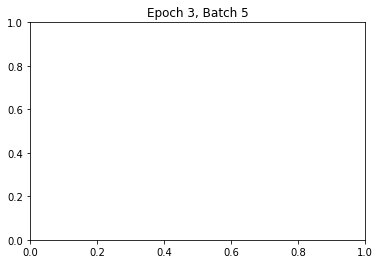

[[0.73459536 0.7289368  0.70810205 0.7206686  0.715529   0.69280595
  0.6898796  0.69585854 0.70215875 0.6789181  0.67495716 0.66888124
  0.64785814 0.6582989  0.6647498  0.658399   0.6627708  0.6707833
  0.66539425 0.66515565 0.641937   0.6330276  0.6301057  0.6390212
  0.6599805  0.69914025 0.7111523  0.72253627 0.7173535  0.70695287
  0.71295476 0.70691615 0.71681017 0.7233461  0.71976596 0.73277175
  0.7289966  0.7407548  0.75066096 0.75195205 0.74362034 0.73853815
  0.7557723  0.76484424 0.7657756  0.76384765 0.7558245  0.7459243
  0.74314433 0.7377939  0.7452888  0.7522213  0.7630243  0.7747968
  0.7769741  0.7900252  0.79733664 0.79681486 0.7959728  0.8002726
  0.8003565  0.79014516 0.7858335  0.78132766 0.77052337 0.77296495
  0.77889687 0.7809164  0.79964155 0.787936   0.8053142  0.80679786
  0.7967729  0.8048783  0.7984014  0.7890825  0.7854114  0.78140885
  0.7803903  0.79192954 0.82237756 0.8381958  0.8455887  0.85367256
  0.8433737  0.8370896  0.8400363  0.84113866 0.85272

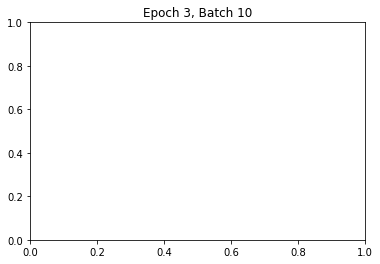

[[0.7149704  0.7092044  0.6880304  0.7008347  0.6956854  0.67305535
  0.66963536 0.67566687 0.68159586 0.65829116 0.6547499  0.6495938
  0.62849516 0.63916713 0.64364415 0.63815004 0.64159393 0.6502245
  0.6444078  0.6442461  0.62165433 0.6121837  0.60939234 0.61840075
  0.63957596 0.6784242  0.690224   0.7020075  0.6965992  0.686529
  0.6920378  0.68639475 0.69603664 0.7028314  0.6989229  0.7119562
  0.7085966  0.7202663  0.72999305 0.73147494 0.7230145  0.7185665
  0.73577315 0.7443419  0.74545836 0.7425925  0.73457134 0.7252668
  0.7224491  0.7172005  0.7248511  0.731069   0.74191374 0.7539175
  0.7563452  0.7690313  0.77631557 0.7750565  0.7747486  0.778488
  0.77848274 0.76818556 0.7637851  0.7594564  0.74885166 0.7514618
  0.75768214 0.7596726  0.7782213  0.7664377  0.7836955  0.78532565
  0.77574885 0.7850744  0.77912205 0.7691912  0.7659285  0.76192194
  0.7615784  0.7732153  0.8037533  0.8194805  0.82664555 0.8349377
  0.8242698  0.818324   0.82102185 0.82226497 0.83378273 0.8

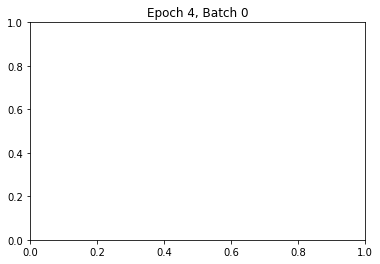

[[0.6925702  0.68669724 0.66489065 0.6778995  0.6726012  0.64999104
  0.645996   0.6521708  0.6578022  0.63427407 0.630983   0.6266478
  0.6054477  0.6164204  0.6186861  0.6140219  0.6164429  0.62577516
  0.6196875  0.61945295 0.5973671  0.58728576 0.58467424 0.59374475
  0.6153412  0.65435123 0.66599953 0.6783185  0.6726481  0.66273165
  0.6678481  0.66245204 0.6719943  0.6791991  0.67491823 0.6880551
  0.6852263  0.69695705 0.70650434 0.7080084  0.69937205 0.69524074
  0.7126112  0.7208415  0.7220504  0.71838236 0.71008587 0.70129704
  0.69826424 0.6931076  0.7009622  0.70657897 0.7177111  0.729841
  0.7324381  0.7448627  0.75245154 0.7502653  0.75066495 0.75364125
  0.753429   0.742946   0.73814404 0.7339161  0.72335297 0.72607636
  0.7325997  0.7346765  0.7530466  0.74100906 0.75824463 0.7600907
  0.750902   0.76129186 0.7561394  0.74512887 0.74256    0.7384688
  0.73904324 0.7511225  0.7821014  0.7981911  0.8049642  0.8138701
  0.8023286  0.7969544  0.7991455  0.8006759  0.8123855

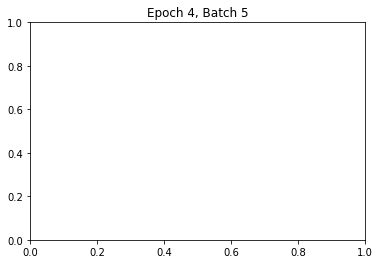

[[0.7233052  0.71740305 0.6936126  0.70731777 0.7013185  0.67741066
  0.67296624 0.67956465 0.6856944  0.66065496 0.6569686  0.652546
  0.630166   0.6418875  0.64367694 0.63855183 0.64068216 0.6507393
  0.6444366  0.6442053  0.62080765 0.6100741  0.60728437 0.616885
  0.63984704 0.6817418  0.6942095  0.7073166  0.7010754  0.69057775
  0.6958709  0.69024676 0.7003053  0.7081015  0.7034463  0.7178059
  0.7149864  0.72738725 0.7373866  0.7386303  0.7297034  0.7248158
  0.7431229  0.75202304 0.75310606 0.74986446 0.7407039  0.7308611
  0.7274515  0.7220698  0.7304517  0.7362389  0.748373   0.7612236
  0.76348096 0.7770735  0.7856458  0.7831186  0.78364784 0.7864454
  0.78576076 0.7746278  0.7687157  0.76417404 0.7528866  0.7556051
  0.76240736 0.7647949  0.7839272  0.77115786 0.78914624 0.7909018
  0.7810369  0.79082745 0.7851259  0.7744456  0.77155155 0.7671339
  0.7673324  0.77989864 0.81249636 0.82981217 0.8368945  0.84683603
  0.8339524  0.82860345 0.8306158  0.83243024 0.84492093 0.85

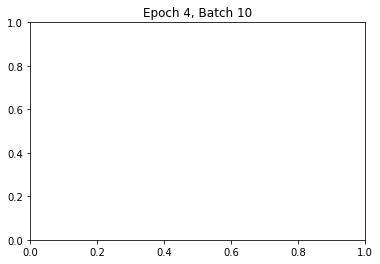

[[0.74097973 0.7351526  0.7103984  0.724114   0.71773237 0.6931363
  0.688723   0.6954934  0.70219463 0.6765285  0.6722242  0.6672556
  0.6444636  0.65645987 0.65867704 0.65285456 0.65513694 0.6652859
  0.6592468  0.65876323 0.634673   0.6238586  0.6210779  0.6308455
  0.6542077  0.6976447  0.71059793 0.72396165 0.71761566 0.70670015
  0.712279   0.706355   0.7167763  0.72482735 0.72010833 0.7349284
  0.7321183  0.7450126  0.75526226 0.75643    0.74717337 0.7419247
  0.76082605 0.77010494 0.7711255  0.7679642  0.75824827 0.74801743
  0.7443829  0.7388586  0.7475833  0.75345016 0.7661347  0.7793616
  0.7814054  0.7957113  0.8049736  0.80222064 0.8028191  0.80553657
  0.8044475  0.79286605 0.7864631  0.78174216 0.76999307 0.77270454
  0.7793767  0.78220814 0.80159503 0.78858954 0.8069696  0.8085051
  0.7978592  0.80752164 0.80185634 0.79098254 0.7879706  0.7832977
  0.78360087 0.79675645 0.8304366  0.84831387 0.85571325 0.8661056
  0.8528584  0.847225   0.8493658  0.8512037  0.86424154 0

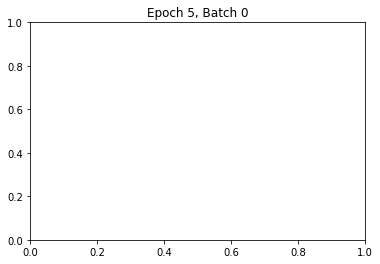

[[0.7162859  0.7103736  0.68514705 0.6990014  0.6924888  0.66802126
  0.6631713  0.6699916  0.6763827  0.65069586 0.6466812  0.6424556
  0.6197119  0.6318923  0.6321134  0.62714666 0.6285544  0.6392419
  0.63294905 0.6324264  0.60895944 0.59761393 0.5950155  0.6049008
  0.62836134 0.67167556 0.6843724  0.698145   0.69159466 0.68097776
  0.6860743  0.6805323  0.6907172  0.6990604  0.6940058  0.7089321
  0.70654756 0.7194096  0.7294517  0.7306974  0.7213281  0.7164898
  0.7354491  0.744192   0.7453714  0.7414926  0.7316434  0.72187376
  0.718142   0.71273273 0.72158545 0.72685355 0.7396608  0.7529028
  0.7551906  0.7691439  0.77852166 0.77503604 0.7762329  0.7782813
  0.7770503  0.76534027 0.7587841  0.75418013 0.7425001  0.74527615
  0.7524702  0.755199   0.774512   0.761175   0.77956814 0.78145605
  0.7715327  0.78212255 0.7767802  0.76559263 0.76298326 0.7583017
  0.75900596 0.77211547 0.8057564  0.823854   0.83092695 0.84181964
  0.8277485  0.8227268  0.824374   0.8264845  0.8394933 

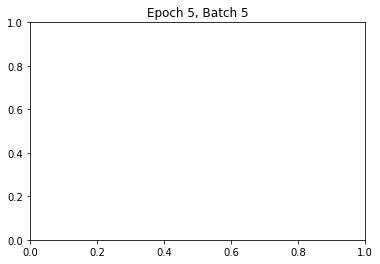

[[0.71937054 0.713457   0.6870464  0.70107764 0.69413626 0.66907346
  0.66405296 0.67104554 0.6777828  0.65156686 0.647169   0.64286715
  0.61974823 0.63230324 0.63218486 0.62706196 0.6280862  0.63927037
  0.63293236 0.6322537  0.6083781  0.5966699  0.59413195 0.6041311
  0.62826616 0.6730017  0.6860152  0.7001703  0.693404   0.6825289
  0.68769485 0.6819875  0.69244266 0.7011094  0.69588804 0.711298
  0.70906055 0.7222758  0.7324693  0.73354506 0.72393894 0.7187981
  0.73827624 0.7472168  0.7483799  0.74457645 0.73412853 0.7240044
  0.7199896  0.7145378  0.72368926 0.72896194 0.7422769  0.7557899
  0.7579435  0.7724062  0.78252107 0.7787172  0.77996397 0.7818372
  0.7800897  0.7680639  0.7608861  0.7561357  0.74405557 0.74672365
  0.75398844 0.7570616  0.7766553  0.762916   0.7817478  0.7835979
  0.7732464  0.78349954 0.77825963 0.7668842  0.7642854  0.75938857
  0.76020885 0.7739085  0.80855143 0.8272254  0.8345059  0.84595644
  0.8313318  0.82622933 0.82784903 0.83007383 0.8436228  

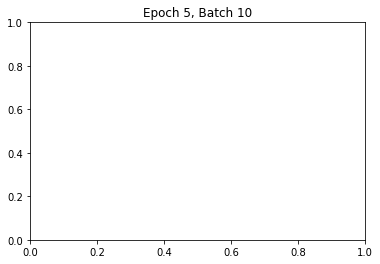

[[0.69822025 0.69233227 0.6659435  0.6799033  0.6729727  0.64818454
  0.64297223 0.6499163  0.65648365 0.6304758  0.626247   0.6223817
  0.5995177  0.61205745 0.61111915 0.60634387 0.60690415 0.6182554
  0.61188155 0.6111839  0.5878131  0.57600784 0.57354677 0.5834609
  0.6074674  0.6517324  0.6645273  0.6787348  0.6719041  0.66128916
  0.6661741  0.66070783 0.6709296  0.6796481  0.67432934 0.6896514
  0.68765926 0.70073444 0.7107318  0.7118504  0.7022499  0.69737357
  0.71669495 0.72533333 0.7265415  0.72240585 0.7119578  0.70216775
  0.6981805  0.692822   0.70195305 0.7068789  0.7201369  0.7335962
  0.73574483 0.74998343 0.76017386 0.75601524 0.75748754 0.7590612
  0.7571604  0.74516904 0.73797786 0.73333275 0.7213726  0.7240418
  0.73136604 0.7344718  0.7537344  0.7400751  0.75862944 0.76054513
  0.75057256 0.7612927  0.75630224 0.74493825 0.742505   0.73760873
  0.7386745  0.7521168  0.7864269  0.80501616 0.81204355 0.8236553
  0.808732   0.8040193  0.80532944 0.80769193 0.82113385

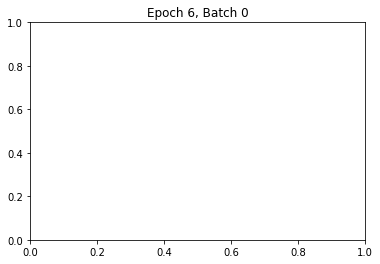

[[0.7060612  0.7001493  0.67244714 0.6867124  0.67933846 0.6538302
  0.6483599  0.6555216  0.66239107 0.6356217  0.63108766 0.62720543
  0.60375315 0.6167197  0.61554545 0.61040246 0.61079115 0.6224738
  0.6161662  0.6153068  0.59130883 0.5791945  0.57676035 0.5868773
  0.61150676 0.65736204 0.6705735  0.68525016 0.6782051  0.6672807
  0.6722396  0.66660255 0.6771554  0.6862475  0.68070185 0.69660574
  0.69474113 0.7082571  0.7184741  0.719439   0.7095759  0.7042831
  0.72414505 0.7331694  0.7343188  0.7302365  0.7192125  0.7090523
  0.70480746 0.69935054 0.70874715 0.71373636 0.7275644  0.741363
  0.74340063 0.75819546 0.76912355 0.7646503  0.76616806 0.76753205
  0.7652792  0.75287694 0.745023   0.74021536 0.72775817 0.73027503
  0.7377252  0.7411893  0.76076794 0.7467009  0.76576346 0.7675124
  0.7568916  0.7674703  0.7627128  0.75084835 0.7484588  0.74331945
  0.7446752  0.75885147 0.7942374  0.81346    0.82073087 0.8328286
  0.81740206 0.81256264 0.8138806  0.8163539  0.83030874 0

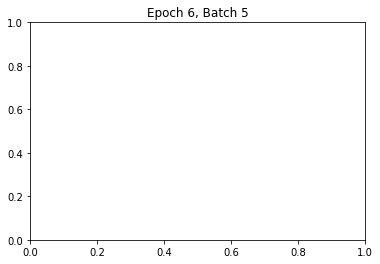

[[0.70988923 0.7040184  0.67532825 0.6899112  0.68212765 0.65608555
  0.6503437  0.65769905 0.6647385  0.6373419  0.63260657 0.6288406
  0.6049016  0.61814326 0.61638117 0.6112615  0.6113456  0.6234134
  0.6170169  0.61607295 0.5917284  0.57929504 0.57691807 0.58720404
  0.6123227  0.65932494 0.6728212  0.68784994 0.6806932  0.66953546
  0.67453533 0.66884077 0.6795904  0.68895555 0.6832358  0.69955677
  0.6978292  0.7116563  0.7220153  0.7228968  0.71285    0.7071789
  0.7274527  0.7367336  0.7378159  0.73381245 0.7223541  0.71194047
  0.70748025 0.7019356  0.71160024 0.71652484 0.7307908  0.7449071
  0.7465643  0.7618542  0.77347916 0.7686806  0.77037024 0.7715371
  0.7690086  0.7562842  0.74787015 0.7429387  0.73015773 0.7324374
  0.73977506 0.7435538  0.7632685  0.748952   0.7682373  0.7699941
  0.7593283  0.77061003 0.76593655 0.75365615 0.75149876 0.74605787
  0.7477595  0.7623095  0.7982525  0.81786054 0.8252285  0.8377093
  0.82188815 0.81700987 0.81829345 0.82080483 0.8350833 

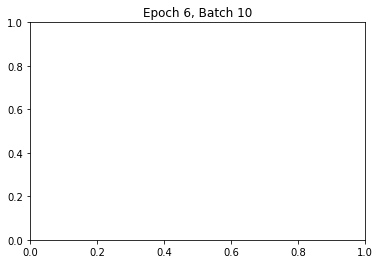

[[0.7178016  0.7120788  0.6825374  0.69707197 0.68878    0.6623752
  0.6570154  0.66436225 0.67182714 0.6440342  0.6390076  0.634719
  0.6107877  0.62398976 0.6225989  0.6171471  0.6171399  0.6293554
  0.6230836  0.6220241  0.59727097 0.5846662  0.5822992  0.59269005
  0.61819637 0.66611093 0.679952   0.6950652  0.6878751  0.6764503
  0.6816693  0.67573833 0.68673176 0.6961948  0.69047976 0.70712936
  0.70546085 0.7195589  0.7300514  0.7307195  0.7205329  0.71455425
  0.7352645  0.7446998  0.7458069  0.74201727 0.7300887  0.7191207
  0.7144138  0.70883304 0.71872514 0.72372955 0.73843056 0.7526614
  0.7543946  0.7700581  0.7822536  0.7774151  0.7789168  0.77995676
  0.7770912  0.7641154  0.75500846 0.7499127  0.73670065 0.7390316
  0.7467585  0.75073856 0.7708271  0.75596625 0.77568954 0.77752525
  0.766603   0.7775672  0.7728278  0.76062006 0.75835633 0.7527889
  0.7544627  0.7692219  0.80561775 0.8256164  0.83316135 0.8459649
  0.8297985  0.8248567  0.82613    0.8287061  0.8432937  0

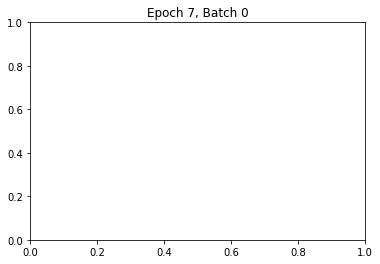

[[0.68501467 0.6793344  0.6500118  0.664502   0.6563975  0.6304778
  0.6245382  0.6317983  0.6389405  0.6116209  0.6068889  0.6034083
  0.5797401  0.59304076 0.5901911  0.58532685 0.58459395 0.5970728
  0.59072113 0.5896335  0.5657313  0.55293566 0.5507748  0.561023
  0.5862543  0.6333222  0.64679444 0.66190475 0.6546831  0.6436345
  0.6484599  0.64288014 0.6535277  0.66307217 0.6571921  0.6736339
  0.6722306  0.6860195  0.69619936 0.6969692  0.6868844  0.6812986
  0.70156235 0.7106216  0.71174526 0.70753556 0.6958243  0.685492
  0.6808794  0.6754443  0.6852456  0.6896939  0.7041376  0.71829945
  0.7198754  0.7351833  0.7473977  0.74205333 0.7439407  0.74450463
  0.7415809  0.728772   0.7197924  0.71490914 0.7020789  0.70432013
  0.71175    0.7157895  0.73519313 0.7207317  0.7399151  0.7417124
  0.73108023 0.74259365 0.7382901  0.72589225 0.7240526  0.71843666
  0.72052914 0.7352604  0.7712931  0.7911486  0.79834706 0.8113434
  0.7949135  0.79038984 0.7913502  0.7940901  0.80849    0.8

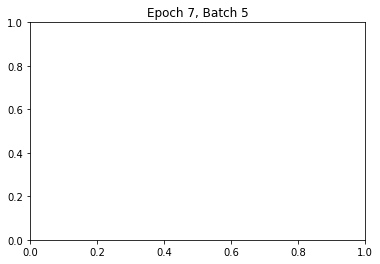

[[0.6803608  0.6748183  0.6443289  0.65896744 0.6503126  0.6240968
  0.61802626 0.6253387  0.6326875  0.6051952  0.6001994  0.596738
  0.572915   0.5864299  0.5834126  0.57825667 0.5773836  0.58990765
  0.5837936  0.58258575 0.5585397  0.5456502  0.54355204 0.5537909
  0.5791722  0.62692285 0.640589   0.65599906 0.6485623  0.6373866
  0.64219826 0.6365643  0.64733905 0.6572338  0.65108824 0.6679161
  0.6669502  0.68112105 0.6913756  0.6919062  0.68168926 0.6758632
  0.6964736  0.70562875 0.70674586 0.70237505 0.69007343 0.6796691
  0.67475754 0.66932946 0.679342   0.683657   0.6986457  0.71293485
  0.71452636 0.73014444 0.74293995 0.73723906 0.7392385  0.7395155
  0.7360992  0.72296125 0.713252   0.7082538  0.69500995 0.69716066
  0.70495826 0.7093131  0.72893995 0.7139118  0.73347217 0.7353614
  0.7246675  0.7360839  0.73192775 0.7195068  0.7176748  0.7118607
  0.714145   0.7291335  0.76554704 0.78572786 0.7930196  0.8063523
  0.789572   0.7850793  0.78596854 0.7887966  0.8034759  0.8

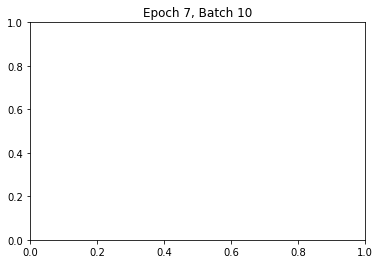

[[0.71371865 0.70823306 0.67654335 0.6912777  0.6818835  0.65453637
  0.64862823 0.6561833  0.6644539  0.63595515 0.6301051  0.6257929
  0.6013052  0.61531615 0.6127163  0.60704863 0.60598516 0.6191377
  0.61291337 0.6115267  0.58621037 0.57311475 0.57086015 0.5813494
  0.60802907 0.6583748  0.67285013 0.68861496 0.6810621  0.66915774
  0.6745008  0.668314   0.6797439  0.68989587 0.6837634  0.7013687
  0.7000772  0.71474814 0.7253766  0.7256788  0.71516705 0.70857114
  0.72996765 0.7397771  0.7408014  0.7371625  0.724185   0.71271026
  0.70748454 0.7018589  0.71223956 0.71697235 0.7326218  0.74719656
  0.74857074 0.7651364  0.77871317 0.7731894  0.77491844 0.7753416
  0.77159476 0.7580532  0.7475691  0.74225867 0.72833085 0.73025095
  0.73807585 0.7429558  0.76316404 0.747617   0.767921   0.7696057
  0.7580111  0.76895064 0.7644413  0.7520264  0.7498947  0.7438597
  0.7459315  0.7613704  0.79886144 0.8197974  0.8276375  0.8414339
  0.82420564 0.8193313  0.8204074  0.82324564 0.83860064

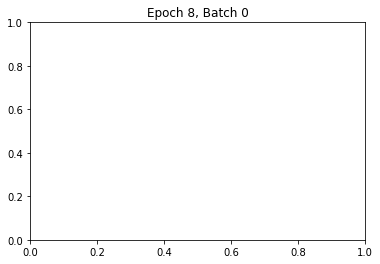

[[0.71038646 0.7048852  0.67246413 0.68739426 0.67775816 0.65014243
  0.6439147  0.6516162  0.6598258  0.6302414  0.6248421  0.62117803
  0.5961937  0.6107236  0.60608435 0.60101056 0.5990288  0.6131454
  0.60640746 0.60502183 0.5796331  0.56535405 0.56326175 0.57427895
  0.6018077  0.6533406  0.66795653 0.6843269  0.6766149  0.66465056
  0.66971815 0.6637699  0.6752565  0.6856565  0.6793232  0.69721735
  0.69612944 0.71098125 0.7216187  0.72192574 0.7112354  0.70469975
  0.72632295 0.7360884  0.73713434 0.73324466 0.7199936  0.70848024
  0.70312035 0.6974697  0.7080671  0.7125727  0.72852886 0.74333143
  0.74469686 0.7614066  0.7753955  0.7694626  0.77140117 0.7715322
  0.76757395 0.75380564 0.7430502  0.7377083  0.7235898  0.7255281
  0.7334553  0.73843426 0.75872296 0.7429783  0.7633983  0.76513946
  0.75360274 0.7647809  0.7604274  0.7478336  0.7457968  0.7396421
  0.7419206  0.75762457 0.7956257  0.81691736 0.8247223  0.83896375
  0.8212044  0.8164742  0.81738025 0.820359   0.8359

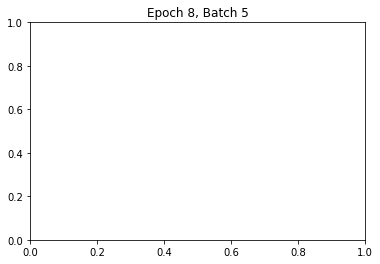

[[0.6997849  0.6939495  0.6603873  0.67598206 0.6662765  0.6380905
  0.63112843 0.6391209  0.6469971  0.61736643 0.6118931  0.6089357
  0.58344597 0.59840035 0.59279966 0.5878523  0.5854555  0.59986645
  0.5931183  0.59169763 0.56645125 0.5518107  0.54978985 0.5609241
  0.5886281  0.64040834 0.65504926 0.67214066 0.6638717  0.65205705
  0.65674895 0.6510013  0.662453   0.67349607 0.6665247  0.68492997
  0.6843191  0.699483   0.71017474 0.7107814  0.69962186 0.69372416
  0.71570593 0.72533315 0.72647953 0.721344   0.70781595 0.6968026
  0.69131845 0.68563247 0.69665116 0.7004955  0.71686304 0.7322795
  0.733876   0.7507171  0.7650675  0.75798285 0.760791   0.76014894
  0.7559735  0.7417024  0.73077035 0.725501   0.7112358  0.71356314
  0.72182935 0.72689885 0.74741167 0.7313241  0.75197774 0.7539169
  0.7424585  0.7537314  0.7494977  0.7368993  0.7349164  0.7287004
  0.73107374 0.74694854 0.7851409  0.80660325 0.8144044  0.8289116
  0.8108663  0.8062355  0.8070384  0.81011087 0.82587343

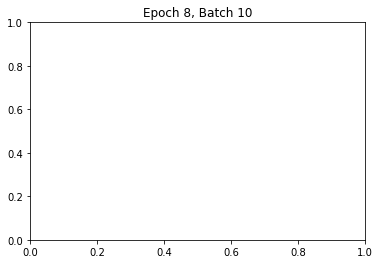

[[0.69313794 0.68731695 0.65342546 0.6689661  0.6591502  0.63107294
  0.62396973 0.6320035  0.6399365  0.6102837  0.60472363 0.6018655
  0.5764368  0.5914181  0.5854033  0.5805846  0.57791966 0.59247524
  0.5857175  0.58423305 0.55910754 0.54436487 0.54238874 0.5535266
  0.5813146  0.6332507  0.64788365 0.66510004 0.6567232  0.6449557
  0.64954126 0.6438177  0.65526897 0.6664233  0.65937334 0.67787236
  0.6774299  0.6926323  0.70327127 0.70381385 0.69258887 0.68670994
  0.70907074 0.7182881  0.7196313  0.7142485  0.70056105 0.68953335
  0.6839527  0.67829007 0.689383   0.6930941  0.7096097  0.7250399
  0.7267364  0.74354595 0.75813586 0.75077987 0.7536832  0.7528455
  0.74850065 0.7342046  0.7230149  0.7177438  0.7033805  0.70564383
  0.7143094  0.71932834 0.7399969  0.72356665 0.7443736  0.7464643
  0.7352814  0.7468855  0.7428665  0.7299337  0.72817993 0.7217825
  0.72449714 0.7405899  0.7789672  0.80057555 0.80839676 0.82307744
  0.8048416  0.8002908  0.80100554 0.8041523  0.8200405

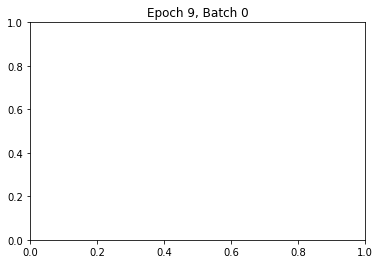

[[0.66951215 0.6637977  0.62987125 0.6452758  0.6355828  0.60785764
  0.60041946 0.6084462  0.6161811  0.58670014 0.5813336  0.5790445
  0.5538299  0.5687951  0.5617451  0.5572987  0.55406696 0.5688426
  0.5619281  0.5604853  0.53588545 0.521164   0.51925933 0.5301812
  0.55786943 0.60941356 0.6238445  0.641154   0.6326842  0.621161
  0.62546915 0.6199593  0.63119805 0.64243186 0.63526183 0.65370697
  0.653501   0.66850704 0.678915   0.6794306  0.66831785 0.66257685
  0.68470293 0.69368976 0.69503695 0.68945336 0.67578053 0.6649954
  0.6593557  0.65381914 0.6648698  0.6682467  0.68472046 0.70016325
  0.7018009  0.71835047 0.7330243  0.72530013 0.7284354  0.727243
  0.7227512  0.708567   0.69712245 0.6919803  0.67772543 0.6799292
  0.6886038  0.6936855  0.71400267 0.69762534 0.7182325  0.7203806
  0.70952374 0.7220569  0.7186575  0.70508176 0.70379144 0.69730264
  0.7007411  0.7171835  0.755732   0.77752036 0.7850546  0.8001238
  0.7813236  0.7771725  0.77755845 0.7809462  0.7968754  0.

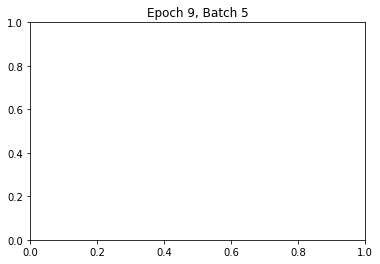

[[0.6729637  0.66732967 0.6325358  0.64803374 0.6379776  0.6098843
  0.60240674 0.61046636 0.6184999  0.588812   0.5831591  0.5807239
  0.555374   0.57036614 0.5635212  0.5586513  0.5554364  0.57022566
  0.5635984  0.562011   0.5371216  0.52229285 0.52042425 0.5314171
  0.5592613  0.61152583 0.6261827  0.6436322  0.6350684  0.6233506
  0.62780094 0.622123   0.63355494 0.6449788  0.63768065 0.65647876
  0.6563742  0.67159486 0.68208134 0.6824771  0.6712538  0.66524094
  0.68765926 0.69682366 0.6981393  0.6926271  0.6786237  0.6675372
  0.661721   0.65612185 0.6673546  0.6706995  0.6875379  0.7031735
  0.7046789  0.72156817 0.73676956 0.7287714  0.7319932  0.730597
  0.7258554  0.7114301  0.6994358  0.6941963  0.67963755 0.6816861
  0.69047284 0.69583714 0.71627855 0.69961214 0.7204719  0.7225917
  0.7115192  0.7239549  0.7205796  0.70700127 0.705711   0.6990494
  0.7025753  0.7193192  0.75835645 0.7804694  0.7881714  0.80356246
  0.7844472  0.78024316 0.78062105 0.78407633 0.8002675  0.

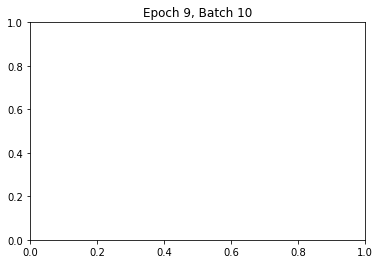

[[0.6869598  0.68136925 0.6456718  0.6613078  0.650803   0.6222145
  0.6147216  0.6229035  0.6312948  0.6011473  0.59513634 0.59239167
  0.56672996 0.5819659  0.57562023 0.57014924 0.5671609  0.5818568
  0.57551366 0.5737732  0.5483407  0.5336047  0.53174263 0.54276186
  0.5708001  0.62421215 0.63922644 0.6568789  0.64824384 0.6362186
  0.64086014 0.6349781  0.64667577 0.6582966  0.6509294  0.6701016
  0.6700323  0.68558794 0.69625396 0.69651216 0.6850935  0.67872304
  0.7015891  0.7110428  0.71231735 0.7069772  0.69256496 0.68106204
  0.6750589  0.6693691  0.68082386 0.6842723  0.7015291  0.7173348
  0.71871513 0.73608816 0.7518025  0.7437425  0.7469352  0.74547654
  0.7405223  0.72581786 0.71334916 0.70795494 0.6930195  0.6949579
  0.7038327  0.70945233 0.73017865 0.71320254 0.7344077  0.73644763
  0.7250083  0.73722357 0.7337247  0.72010803 0.71873206 0.7118995
  0.71536607 0.73209065 0.77147573 0.79393584 0.80189514 0.81757206
  0.7982142  0.7938277  0.79428685 0.79776245 0.8142783

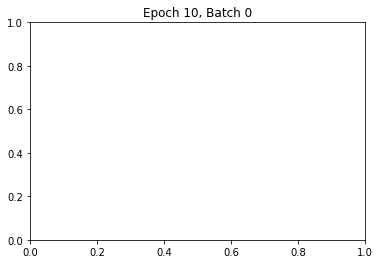

[[0.67435515 0.66881937 0.6329146  0.6485615  0.638014   0.60947424
  0.60186434 0.60998434 0.61834085 0.58833486 0.5824004  0.57988214
  0.55431145 0.56952053 0.56276697 0.5574683  0.554161   0.5689866
  0.5626546  0.5608912  0.5357142  0.5208314  0.5190333  0.5300217
  0.55805993 0.61129254 0.62625724 0.643913   0.6352771  0.62325287
  0.6278481  0.6220518  0.63369864 0.6453412  0.6379115  0.6571279
  0.6571389  0.6726052  0.6831675  0.6833933  0.67212844 0.6656905
  0.68847495 0.6978912  0.69913214 0.6937309  0.67931765 0.6679083
  0.6618454  0.6562079  0.66760415 0.67092115 0.6881856  0.70406747
  0.7053818  0.72269005 0.7385625  0.7301818  0.7335577  0.73187226
  0.72676885 0.71205026 0.6993741  0.69402516 0.6791006  0.6809382
  0.6898184  0.69557744 0.7161439  0.69911224 0.7202679  0.72234386
  0.71100724 0.7233581  0.72009474 0.7064578  0.7052064  0.69831115
  0.7019926  0.7189923  0.7587665  0.78119856 0.78906447 0.8049256
  0.7854056  0.7811217  0.7815086  0.7850253  0.8015329

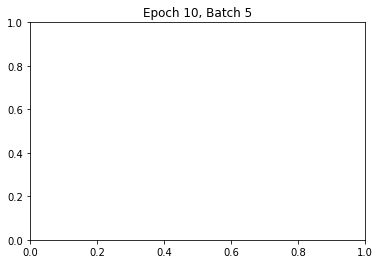

[[0.66162705 0.65615815 0.62016374 0.63586146 0.62528193 0.5968698
  0.58924913 0.5972849  0.6056017  0.57570356 0.5698694  0.56755567
  0.5421038  0.55719185 0.54992455 0.5448725  0.54113823 0.55626243
  0.54981565 0.5480584  0.5231035  0.508123   0.5063664  0.517298
  0.54542327 0.5983579  0.61323416 0.6308506  0.6222528  0.6103141
  0.61480695 0.6090882  0.62064767 0.6323416  0.6248507  0.6440889
  0.64419234 0.6595769  0.6700495  0.67024875 0.6590386  0.65261066
  0.6753106  0.6846726  0.68591386 0.6803792  0.666      0.65467906
  0.64854896 0.6429687  0.6543206  0.6574761  0.67476416 0.6907313
  0.69199115 0.7091146  0.7250569  0.71645206 0.7199782  0.718129
  0.7129251  0.69825506 0.68538046 0.680085   0.6652925  0.6671133
  0.675918   0.6816379  0.70198715 0.685051   0.7059884  0.7081152
  0.69698566 0.709426   0.70633066 0.69262636 0.69164425 0.68477285
  0.688558   0.7055195  0.7456436  0.7683054  0.77607393 0.792079
  0.7720475  0.7682556  0.7682095  0.77206945 0.7885765  0.8

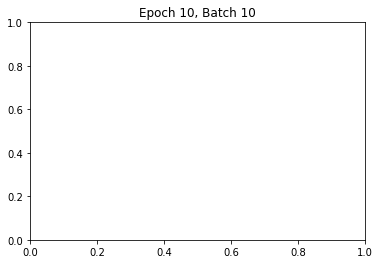

[[0.6834754  0.6780551  0.6409732  0.65682995 0.64578336 0.61661655
  0.60904175 0.61724645 0.626072   0.59551036 0.5891853  0.5864
  0.5604685  0.5758069  0.5693964  0.5635758  0.56012267 0.5752204
  0.56903046 0.5671242  0.5413248  0.52632004 0.52446306 0.5355664
  0.56419235 0.6187218  0.63411677 0.65188164 0.6432889  0.63088065
  0.6357716  0.6296977  0.64167184 0.65348744 0.6459804  0.66563946
  0.6656571  0.6814217  0.6921611  0.69219005 0.6807985  0.6739027
  0.6970506  0.70684576 0.70802295 0.70281905 0.68805856 0.67613983
  0.66981643 0.6641015  0.6756766  0.67909056 0.69680876 0.7129436
  0.7140609  0.7318248  0.7484148  0.7398316  0.74318916 0.7414094
  0.73598605 0.72098374 0.707598   0.70208967 0.68674    0.68841475
  0.6973093  0.70338535 0.7241841  0.7068297  0.72828287 0.73034316
  0.718687   0.7307705  0.727494   0.7138663  0.7125539  0.70543975
  0.7091788  0.72655356 0.7663734  0.7891491  0.7973625  0.81361
  0.7937377  0.7892105  0.7897467  0.79329073 0.8101707  0.8

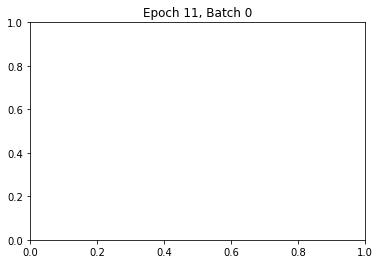

[[0.6536878  0.6483358  0.6116692  0.62752515 0.616635   0.5879654
  0.5802382  0.5882585  0.59673876 0.5666631  0.56072235 0.5585988
  0.5330632  0.54811186 0.5408121  0.5356106  0.5314674  0.5468538
  0.54044664 0.53869295 0.51357526 0.49840057 0.49656346 0.50754315
  0.53611934 0.5895425  0.6045818  0.622308   0.6135986  0.6015214
  0.6060453  0.60024005 0.6119287  0.62379116 0.61620057 0.63569057
  0.63587046 0.6513485  0.66175723 0.6618395  0.6507003  0.644016
  0.6668259  0.676232   0.6774354  0.6720296  0.65743256 0.64593816
  0.63963646 0.6340573  0.6454834  0.64855313 0.6660929  0.6821977
  0.6832631  0.70059526 0.7169378  0.7081034  0.7116172  0.70966446
  0.70413864 0.6893365  0.6758992  0.67058295 0.65562665 0.65727866
  0.66610146 0.6720849  0.6923962  0.675269   0.6963486  0.6984993
  0.6873372  0.69965094 0.69663    0.6830274  0.68208885 0.6751387
  0.6790019  0.6961248  0.73648834 0.7595205  0.76730275 0.783694
  0.76317894 0.75955707 0.75933164 0.7634131  0.78014827 0.

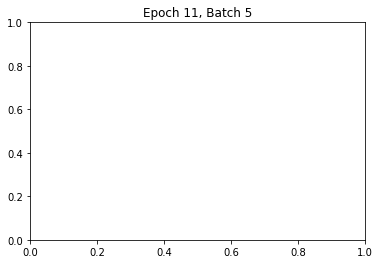

[[0.64085263 0.63559663 0.59915155 0.61487454 0.60388166 0.57538617
  0.56762624 0.57559645 0.5840429  0.5542111  0.5482945  0.5462941
  0.52099544 0.5359985  0.5285907  0.52339536 0.51911753 0.5345275
  0.52814394 0.5263843  0.5014667  0.48642677 0.48450816 0.49536592
  0.5239048  0.577105   0.5920606  0.6096478  0.6009689  0.5889879
  0.5935196  0.58774596 0.59931487 0.6110725  0.60353506 0.6229342
  0.62315935 0.63845265 0.6487592  0.6487587  0.6378308  0.63101965
  0.653663   0.66310024 0.66423404 0.65898347 0.644389   0.6329078
  0.62659067 0.6210882  0.63237995 0.63540906 0.65293115 0.6689646
  0.6699212  0.68720454 0.7036156  0.69477844 0.69821966 0.69621867
  0.6905596  0.67581815 0.66223264 0.6569669  0.6420316  0.6435707
  0.6523319  0.65840596 0.678472   0.6614737  0.682384   0.6844871
  0.67345625 0.6855878  0.6826435  0.6692278  0.66835594 0.6613782
  0.66539776 0.6823848  0.7224216  0.7456006  0.75307506 0.7699869
  0.7489417  0.7454953  0.7451236  0.74930876 0.7662689  0

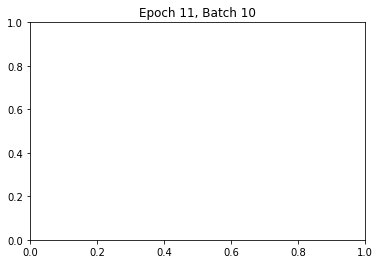

[[0.68337864 0.67820936 0.64015585 0.6560739  0.6442445  0.6146853
  0.6072398  0.6154372  0.62480366 0.5939886  0.5871462  0.58408856
  0.5580909  0.573528   0.5676275  0.5611207  0.5574805  0.57271034
  0.5668426  0.5647721  0.5385659  0.5237288  0.5217201  0.53271
  0.5617581  0.617291   0.6330461  0.65104014 0.64222044 0.6294963
  0.6346083  0.628313   0.6405217  0.65259904 0.6449628  0.6652254
  0.66529244 0.6813161  0.6921553  0.69187766 0.68055093 0.67282355
  0.69640595 0.70672387 0.70772105 0.7031061  0.6876939  0.675133
  0.6684712  0.6627015  0.67443824 0.6779564  0.696324   0.7128386
  0.71348983 0.7319     0.74924064 0.74074715 0.7437132  0.74203175
  0.73589975 0.7206332  0.7062538  0.70059156 0.6847798  0.68612695
  0.69496    0.70151824 0.72243106 0.70478    0.7265331  0.72852474
  0.7164665  0.72790647 0.7244131  0.7112768  0.7098359  0.7025519
  0.7061201  0.7233117  0.7634689  0.78668875 0.7952259  0.81188095
  0.7916471  0.78702885 0.7875622  0.79125243 0.8085564  0

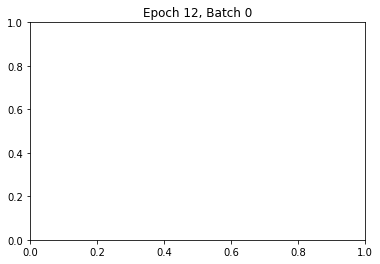

[[0.6642194  0.65906465 0.6212176  0.637123   0.62552524 0.5961559
  0.5885106  0.59662235 0.6057896  0.5752562  0.56866574 0.5660039
  0.5401845  0.5554149  0.54932344 0.54301256 0.5391501  0.55440617
  0.54847586 0.5465198  0.5205838  0.50566113 0.50360405 0.5145445
  0.5436008  0.5985794  0.6141383  0.6319561  0.62322795 0.61064106
  0.61564064 0.60939825 0.6215048  0.6334628  0.62590575 0.6459808
  0.64611614 0.66196245 0.67265    0.67237127 0.6612232  0.6535901
  0.6769339  0.6871431  0.68815744 0.683362   0.66814315 0.65582204
  0.6492065  0.6435015  0.6550614  0.65848565 0.6766566  0.6931263
  0.6937827  0.711998   0.7292936  0.72047114 0.7236805  0.721718
  0.71556205 0.70043665 0.68607545 0.68054324 0.6648954  0.6662061
  0.675049   0.6815518  0.7021811  0.6846745  0.706229   0.70828927
  0.6966001  0.70811415 0.7048559  0.69176644 0.6904805  0.6832278
  0.6869696  0.7041685  0.7439407  0.76678413 0.7751433  0.7918353
  0.7716023  0.76704144 0.76759875 0.7712529  0.78836054 0.

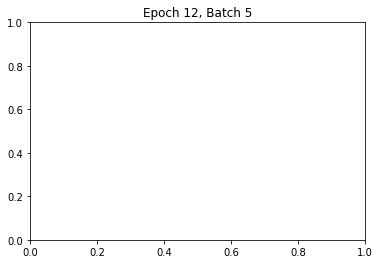

[[0.6694369  0.66430086 0.6256635  0.6417654  0.629765   0.6000558
  0.59241843 0.6005727  0.60993606 0.5790246  0.5723709  0.5697025
  0.54359275 0.55895746 0.5527489  0.54630864 0.54217374 0.55779755
  0.55173266 0.54979354 0.5234791  0.50835925 0.506237   0.5172864
  0.5468767  0.6026126  0.6183901  0.63658106 0.62756354 0.61483157
  0.61987853 0.61353195 0.62581074 0.6380726  0.6302593  0.6507936
  0.6509836  0.66701436 0.6778019  0.6774291  0.66627514 0.6583881
  0.6818531  0.69232357 0.6932847  0.6886617  0.67316073 0.660547
  0.65373236 0.64799523 0.65977573 0.6631255  0.68175733 0.6984258
  0.69897795 0.71743166 0.7350394  0.72612    0.7292916  0.7273087
  0.7209898  0.7057317  0.69093806 0.6853285  0.66943395 0.67068356
  0.6795539  0.6862271  0.70698935 0.6893588  0.7111192  0.71316254
  0.7012942  0.712464   0.70895636 0.69629645 0.69483554 0.6875427
  0.6909715  0.70818114 0.7483161  0.7713959  0.7798663  0.7967534
  0.7762995  0.77165407 0.772258   0.775959   0.79316777 0.

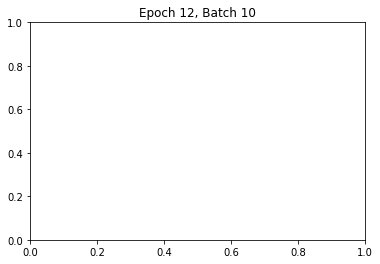

[[0.6823706  0.6772767  0.6378476  0.6540064  0.6416499  0.6114457
  0.603856   0.61204994 0.6218312  0.59049    0.5836066  0.58068115
  0.5542558  0.5697819  0.5639609  0.55711424 0.55308187 0.5687524
  0.56281507 0.5608256  0.5339913  0.5186996  0.5165363  0.5277282
  0.557722   0.61446106 0.6306034  0.64903885 0.63989216 0.62684226
  0.63199997 0.62545633 0.63803214 0.6505614  0.6426496  0.66355306
  0.6636917  0.6799076  0.690872   0.69041944 0.679151   0.67095625
  0.69477594 0.70554775 0.7064716  0.70195144 0.6862293  0.67324185
  0.6662336  0.66043675 0.672381   0.67588085 0.6948003  0.7116755
  0.7121541  0.7309631  0.7489905  0.7400027  0.7431347  0.7411594
  0.73466045 0.71914715 0.70393366 0.69817495 0.68203026 0.68307453
  0.6918954  0.6989055  0.7199097  0.7019893  0.7242806  0.7262506
  0.7139284  0.72460145 0.72102314 0.70834535 0.7067274  0.6993062
  0.70272166 0.7202224  0.76078975 0.78420943 0.79289585 0.8099554
  0.78932863 0.78452116 0.7852132  0.78892857 0.80639297

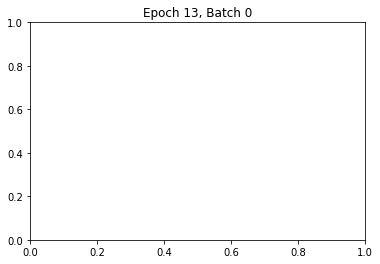

[[0.67929816 0.6742546  0.63416255 0.6503667  0.63779736 0.60743326
  0.599764   0.6079419  0.6178423  0.58642733 0.57950044 0.5766518
  0.5501808  0.56565803 0.5600233  0.55293524 0.548823   0.56451535
  0.5586157  0.556642   0.52975446 0.5143184  0.512147   0.5233424
  0.553519   0.6106991  0.62693477 0.6454453  0.63623196 0.62303936
  0.62826186 0.62167984 0.63433933 0.6469194  0.63898146 0.66004926
  0.6602642  0.67661625 0.6876241  0.68711835 0.67580974 0.66746354
  0.6914561  0.70234954 0.70323837 0.69868696 0.68274975 0.6696352
  0.6625044  0.65667933 0.6687267  0.6721716  0.6913488  0.70845073
  0.708797   0.72778624 0.74609905 0.7370136  0.7400993  0.73805255
  0.7313471  0.7156914  0.70003414 0.69425327 0.677827   0.6787452
  0.6876813  0.69500613 0.7160626  0.6979367  0.72045124 0.7224353
  0.7100773  0.72111034 0.7175448  0.7048847  0.70328844 0.6957594
  0.69919926 0.7168822  0.75767565 0.78123415 0.7899846  0.80728066
  0.786421   0.78159845 0.7822909  0.7860532  0.803619

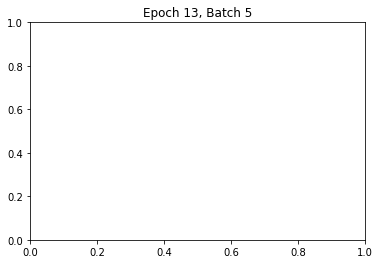

[[0.6803008  0.67529577 0.6348917  0.6512124  0.6384664  0.60791194
  0.60018396 0.6083527  0.6183199  0.58689684 0.5799393  0.5770946
  0.55056983 0.56598526 0.56050265 0.55325454 0.54906505 0.5647982
  0.5588961  0.55699897 0.52993375 0.5146488  0.5124539  0.5235837
  0.5537931  0.61123127 0.6275733  0.6461217  0.63691676 0.62363183
  0.62890524 0.62227595 0.6350154  0.6476662  0.6396624  0.6609146
  0.6610481  0.6774525  0.68848914 0.68794787 0.6767266  0.66820276
  0.69230384 0.70331043 0.704197   0.69962615 0.6836001  0.6704397
  0.6632499  0.6573954  0.6694549  0.67286795 0.69218606 0.7094647
  0.70975673 0.72890246 0.74742085 0.7382205  0.7413147  0.73920417
  0.73233527 0.7165596  0.70062    0.69481766 0.6782412  0.6791025
  0.68804944 0.69546765 0.71664184 0.6983645  0.7210756  0.7231433
  0.71075726 0.72216076 0.71880955 0.70562935 0.70426434 0.69652134
  0.70046777 0.71827453 0.75924146 0.78286564 0.7916834  0.8090514
  0.7881098  0.7832368  0.78396696 0.78776115 0.80536425 

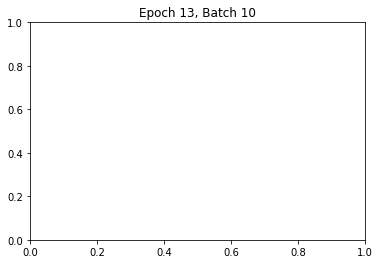

[[0.6527043  0.64761436 0.6081984  0.6244937  0.6120699  0.5821669
  0.5742636  0.58228344 0.59183115 0.5608247  0.554318   0.5522699
  0.5260255  0.54114753 0.53492707 0.5282573  0.5236732  0.5393897
  0.5334341  0.5316718  0.5053692  0.4903515  0.48801836 0.49887004
  0.5287053  0.5847078  0.6005489  0.61887383 0.6097535  0.5968978
  0.60192055 0.595631   0.6079358  0.6203626  0.61236775 0.6332181
  0.6334598  0.6494524  0.6601842  0.6596958  0.64876467 0.6405436
  0.66417414 0.67481226 0.6757212  0.6709669  0.65533894 0.64261556
  0.6356453  0.6299054  0.64166796 0.64479953 0.6637525  0.6808294
  0.68118566 0.6998132  0.717751   0.70841056 0.71180254 0.7095603
  0.7027541  0.6872855  0.6717706  0.6661901  0.6501464  0.6511292
  0.6599873  0.66711235 0.68778765 0.6699628  0.6920138  0.69415337
  0.6823828  0.693911   0.6908242  0.6777248  0.6765534  0.66897637
  0.67309207 0.69085497 0.7323299  0.75557053 0.76403826 0.78122276
  0.76041085 0.7558584  0.75640005 0.7602636  0.7774438  

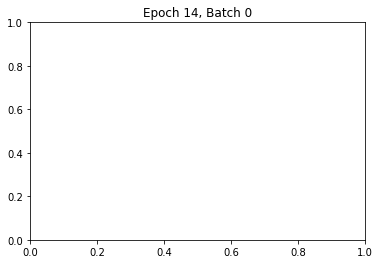

[[0.6764228  0.67149246 0.6306919  0.6471161  0.6341307  0.60344636
  0.59562373 0.6037625  0.613786   0.5824003  0.5753764  0.57268023
  0.5460807  0.5614954  0.5561801  0.548702   0.5443586  0.56012857
  0.55435836 0.5525031  0.5252913  0.51001793 0.50775576 0.51881075
  0.54921556 0.60682786 0.62326527 0.64188564 0.63263535 0.61923635
  0.62456036 0.61789715 0.6307051  0.64345574 0.63534224 0.6568077
  0.6569289  0.6733439  0.6843975  0.68375766 0.6726405  0.6638282
  0.68800485 0.6992398  0.700037   0.69565696 0.6794839  0.66614485
  0.6588277  0.6529906  0.6650803  0.6684635  0.68801266 0.70547664
  0.7055926  0.7249869  0.743752   0.7344514  0.7375331  0.7352973
  0.7282299  0.71234465 0.695935   0.6901299  0.67340815 0.6741431
  0.6830871  0.69070154 0.7119172  0.69351786 0.7164222  0.71853185
  0.70612836 0.7175002  0.7142395  0.7010346  0.6996139  0.69178796
  0.6958234  0.71410394 0.7552574  0.7789414  0.7878219  0.8052051
  0.7842508  0.77932525 0.7801014  0.78393483 0.80156

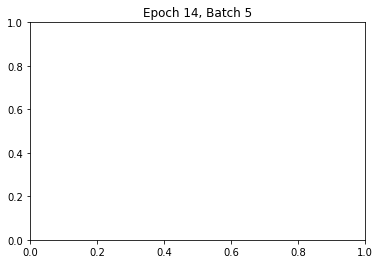

[[0.6701619  0.66530496 0.6245252  0.6409097  0.62777007 0.59710926
  0.58941334 0.5973755  0.60751903 0.5763789  0.5692897  0.56651974
  0.54007363 0.5553357  0.55057865 0.54289865 0.5385392  0.55418223
  0.5485759  0.54674    0.51956606 0.50440574 0.50210524 0.51304686
  0.5433761  0.6007465  0.6171238  0.63566655 0.62644136 0.6130482
  0.61845577 0.61177516 0.62453747 0.63722694 0.6291181  0.65063214
  0.6507465  0.6671266  0.6781256  0.6773906  0.6664083  0.6573646
  0.681484   0.6928377  0.6935574  0.68935275 0.6731754  0.65975606
  0.65239    0.64659345 0.6585436  0.661952   0.681584   0.6991104
  0.69904387 0.71850544 0.7374258  0.7280799  0.7310829  0.72884905
  0.7216022  0.70577127 0.6892318  0.6834293  0.6667611  0.66733205
  0.6761939  0.6838449  0.7049244  0.68665975 0.70941746 0.71152455
  0.69921696 0.7104501  0.70714533 0.69416666 0.69272906 0.68490326
  0.6889149  0.7071103  0.74861795 0.7722036  0.7811018  0.7985163
  0.77757657 0.77262676 0.7734345  0.7772888  0.7948

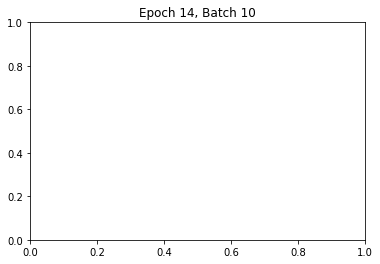

[[0.65325665 0.64843726 0.6079421  0.6242809  0.6113107  0.5809715
  0.57328904 0.58115184 0.5910468  0.5600865  0.5533744  0.55096054
  0.52473557 0.53983426 0.53497255 0.5274155  0.5229329  0.5385561
  0.532899   0.53117955 0.50433826 0.48922044 0.48681834 0.49770564
  0.5278927  0.584576   0.60075843 0.6191865  0.60991216 0.59666955
  0.6019968  0.5953934  0.6080233  0.62062216 0.61252177 0.6339216
  0.6340802  0.6502713  0.6611266  0.6603973  0.6495967  0.6406932
  0.66463923 0.6758001  0.67656577 0.67222834 0.65617514 0.6429316
  0.6356735  0.6299014  0.641737   0.64505124 0.66452503 0.68200946
  0.68203914 0.70119846 0.7200086  0.71055615 0.71364903 0.7112708
  0.70401454 0.6883737  0.67205906 0.66637015 0.64986503 0.65037465
  0.65909886 0.6667646  0.68760455 0.669515   0.69206905 0.6942041
  0.682137   0.6933013  0.69011045 0.67725205 0.6758801  0.66810036
  0.67214704 0.69011843 0.73173285 0.7551807  0.7639142  0.78133667
  0.76040053 0.7555691  0.75631046 0.7601942  0.7776208

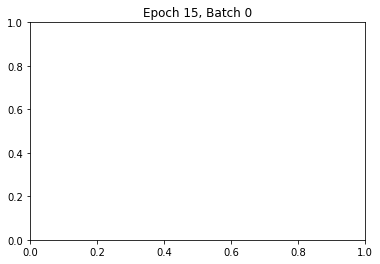

[[0.65001404 0.6452335  0.6044815  0.62081885 0.6077356  0.5773633
  0.5696979  0.5775707  0.58760846 0.5567591  0.5498751  0.54735035
  0.52120215 0.53627175 0.53172743 0.5239971  0.5194647  0.53507423
  0.52950484 0.5277769  0.5008596  0.48597112 0.483584   0.49420232
  0.5244439  0.58129823 0.5975577  0.61589056 0.6066244  0.59328884
  0.5987938  0.59202045 0.6047408  0.61729044 0.6092398  0.63067114
  0.63090986 0.64713633 0.65798455 0.65716016 0.64634436 0.6372496
  0.6612221  0.672563   0.67323965 0.66904014 0.65299314 0.639513
  0.63220173 0.6264383  0.6382348  0.6416082  0.66116345 0.6787219
  0.6785509  0.6979421  0.71696544 0.7074322  0.7105002  0.70807165
  0.7007763  0.6851329  0.6685061  0.6627962  0.6462104  0.6466362
  0.6552759  0.66297007 0.68380284 0.6657875  0.6884314  0.69053704
  0.6783355  0.68928605 0.68610185 0.6733356  0.67194563 0.664107
  0.6681631  0.6861833  0.72760963 0.7512477  0.76007855 0.77763444
  0.75655824 0.751733   0.75244457 0.7564302  0.7740252 

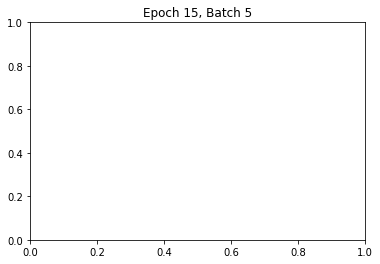

[[0.6601846  0.6554965  0.613927   0.6303903  0.6169342  0.5861454
  0.5785619  0.58649904 0.5968507  0.5657502  0.5584954  0.5556399
  0.5293533  0.5444094  0.54076195 0.5325377  0.5281431  0.5437648
  0.5383636  0.5365633  0.5091032  0.49398863 0.49163848 0.5025187
  0.53302646 0.5908501  0.60751283 0.62588435 0.6166012  0.6028379
  0.6086106  0.6015692  0.6146089  0.62727785 0.6192806  0.64109135
  0.64117336 0.6576148  0.668595   0.66749835 0.6567184  0.64700955
  0.671315   0.68304837 0.68363047 0.68002933 0.6636321  0.6495172
  0.64193404 0.6361385  0.6480429  0.65180117 0.6716884  0.689367
  0.68892753 0.7087806  0.72833335 0.7190023  0.72171295 0.71947896
  0.71186894 0.69609874 0.6787372  0.67289877 0.6559504  0.6562221
  0.66486585 0.6728281  0.6939509  0.6756497  0.6987493  0.70081747
  0.68817043 0.69882536 0.69549084 0.68285704 0.6812612  0.673337
  0.6772568  0.69544536 0.7367334  0.7604469  0.76955014 0.7873825
  0.7661661  0.7610563  0.7619804  0.76586205 0.7837944  0.7

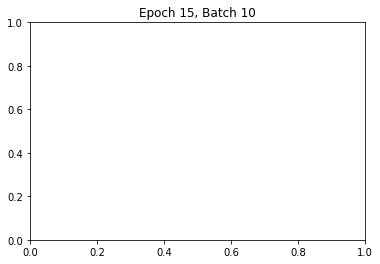

[[0.6335419  0.628965   0.58843875 0.6046191  0.59137136 0.5611585
  0.55348724 0.5612609  0.5712783  0.5408438  0.5338929  0.53151214
  0.5057903  0.5205789  0.5164417  0.5085713  0.503969   0.5194443
  0.51404554 0.51232797 0.4855646  0.471322   0.4689614  0.4792177
  0.5090247  0.5657112  0.5819378  0.5999643  0.5908249  0.57743776
  0.5829922  0.5761873  0.5888905  0.60134345 0.59339595 0.6148075
  0.61484826 0.6309134  0.64162683 0.640543   0.63019717 0.62058693
  0.64435846 0.65580016 0.65636224 0.652795   0.6367513  0.6230301
  0.61561996 0.609966   0.6215241  0.6250842  0.64464754 0.6620594
  0.6615947  0.6809395  0.7001371  0.69085306 0.69355786 0.6912629
  0.68367267 0.6681953  0.65108097 0.6454223  0.6288041  0.6290106
  0.63754165 0.6454702  0.66601855 0.6480965  0.6706758  0.67276937
  0.66055715 0.67106307 0.66786    0.6555633  0.65410006 0.6462771
  0.6502231  0.66809696 0.7094523  0.7329485  0.74176747 0.75955886
  0.7382699  0.7335226  0.73419935 0.738245   0.7559506  

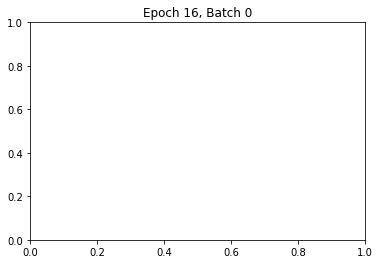

[[0.63331974 0.628825   0.58803195 0.6042292  0.5907537  0.56040806
  0.55278194 0.5605305  0.5707524  0.5402881  0.5332621  0.53074956
  0.50500274 0.5197473  0.51655895 0.5082152  0.5037622  0.5191327
  0.5139909  0.5122425  0.48524198 0.47110108 0.46858838 0.4788452
  0.5087642  0.5657402  0.5820702  0.59996957 0.590734   0.57718176
  0.58291054 0.57588696 0.5887342  0.601178   0.59331685 0.61484843
  0.6148168  0.63084155 0.6415866  0.6403742  0.6301725  0.62020844
  0.6440347  0.6557305  0.65620935 0.65296865 0.63677317 0.6228126
  0.6153157  0.6096501  0.6212279  0.62487805 0.6446145  0.66213304
  0.6615282  0.6810561  0.70041674 0.6911983  0.6937708  0.69153476
  0.68380636 0.6682798  0.65087986 0.6451896  0.62842816 0.6285061
  0.6369888  0.64506775 0.66568035 0.64769596 0.6704177  0.67249954
  0.6601731  0.67049474 0.6671776  0.65507156 0.6535329  0.6456457
  0.6495089  0.667398   0.7088207  0.7323815  0.7413236  0.7589485
  0.7378142  0.7330053  0.7337296  0.73780864 0.755411

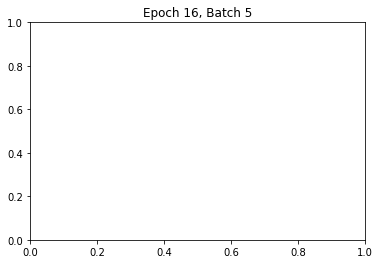

[[0.6488677  0.64437556 0.6021132  0.6186031  0.6046726  0.5737061
  0.56611735 0.5739471  0.58449835 0.5534841  0.54622597 0.5434835
  0.51732326 0.5322525  0.52968    0.52076423 0.5164722  0.53195226
  0.5269035  0.52508366 0.49739516 0.48245135 0.47996357 0.49064305
  0.5214188  0.5795977  0.59641254 0.6146492  0.60518444 0.5911961
  0.5971634  0.58985686 0.6030816  0.6158425  0.6078364  0.6299059
  0.6299989  0.64644504 0.6573959  0.6560482  0.64546835 0.6352819
  0.65960133 0.67163754 0.6720989  0.66884226 0.65220404 0.6377361
  0.6299306  0.6241641  0.6361146  0.63988054 0.66011345 0.67793524
  0.6771977  0.6972827  0.71739954 0.70780915 0.7104857  0.70807743
  0.7001192  0.6842861  0.6661778  0.6603362  0.6431444  0.64309657
  0.65161365 0.65995735 0.6810113  0.66264534 0.6859648  0.68802845
  0.6752329  0.68548197 0.68218225 0.66989154 0.668244   0.66018146
  0.66413075 0.6824646  0.7239589  0.74762136 0.756919   0.7745718
  0.7536148  0.74837244 0.74941874 0.75334203 0.7711836

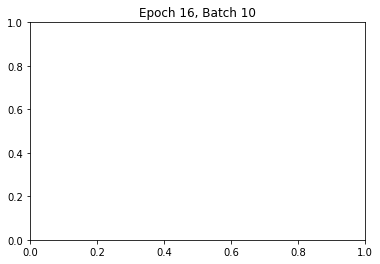

[[0.66368043 0.6592303  0.6162161  0.6328004  0.6185345  0.58715445
  0.5796062  0.5875129  0.59842485 0.5670429  0.55951875 0.55642325
  0.5300203  0.54505277 0.5430733  0.5336819  0.5296408  0.54507464
  0.54015297 0.538231   0.5101131  0.49526212 0.49272662 0.50343513
  0.5344113  0.59344333 0.6105605  0.62898    0.61940664 0.6051255
  0.61136097 0.6038285  0.61727566 0.6301605  0.6221193  0.644498
  0.6446127  0.6613103  0.6724357  0.6709625  0.66026217 0.64968854
  0.67437357 0.6867238  0.6871217  0.6840537  0.66709673 0.6522217
  0.6442723  0.6384307  0.6506313  0.65449953 0.6750416  0.6930404
  0.6922162  0.71269894 0.7331069  0.7236336  0.72613907 0.72383195
  0.7157127  0.6996793  0.68128693 0.67531043 0.65779287 0.65764475
  0.6661473  0.6746953  0.69600755 0.67743725 0.70102066 0.7030459
  0.6900036  0.7000706  0.69660527 0.6843781  0.68262833 0.6743976
  0.6782874  0.69670564 0.7381062  0.7618173  0.7713265  0.78911465
  0.7681866  0.76265603 0.7639148  0.76769716 0.7857253

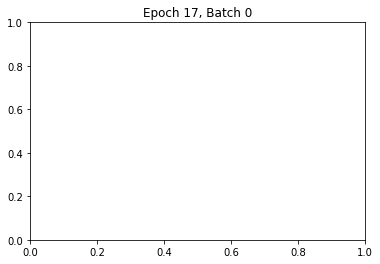

[[0.6470467  0.6426784  0.6000546  0.61649305 0.6022457  0.57110673
  0.5634626  0.5712996  0.5820767  0.55095696 0.5435814  0.5408449
  0.5147203  0.5297239  0.5274466  0.51815045 0.5139489  0.5293666
  0.52448237 0.5225468  0.49489647 0.48053968 0.4779842  0.48826003
  0.5188969  0.577542   0.5944259  0.6125797  0.60316086 0.58909595
  0.59516144 0.5877371  0.6010491  0.6138328  0.6058058  0.6279074
  0.6280514  0.64455426 0.655513   0.65400904 0.6434257  0.633001
  0.65739524 0.6695652  0.6699464  0.6669386  0.650069   0.6354581
  0.6275704  0.6218237  0.6338328  0.63757354 0.6578746  0.6757903
  0.6748935  0.6951798  0.71555936 0.7058313  0.7085377  0.705951
  0.6977426  0.6819433  0.663641   0.6577673  0.64037895 0.6401268
  0.6485763  0.65720654 0.67815495 0.6597567  0.6830761  0.68511236
  0.6722772  0.6822888  0.6790056  0.66686213 0.66525066 0.65701795
  0.6610268  0.67934346 0.7208917  0.7443433  0.75372684 0.77156305
  0.7505965  0.7451968  0.7463813  0.7502049  0.7681698  0

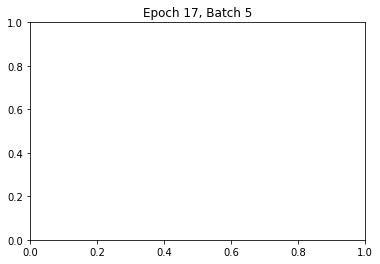

[[0.62442446 0.6200966  0.5778742  0.5940174  0.5797782  0.549336
  0.54177284 0.5494158  0.55970883 0.5294596  0.5222949  0.5198481
  0.49442887 0.50913006 0.50639474 0.49731797 0.49363315 0.50796276
  0.5034281  0.5016741  0.4753129  0.46158594 0.45922026 0.46918553
  0.49797198 0.5553957  0.57197034 0.5901483  0.580544   0.5668404
  0.5725176  0.565354   0.5783898  0.5912638  0.58309495 0.60507095
  0.60537773 0.62149274 0.6321583  0.6307209  0.6204454  0.61024594
  0.6341634  0.64597917 0.6463866  0.64316964 0.62644196 0.61233026
  0.6044317  0.5988756  0.6107589  0.61408645 0.63428074 0.65190613
  0.6510657  0.6708151  0.6910372  0.68107384 0.68394876 0.6811379
  0.67292607 0.6573522  0.6389642  0.6332804  0.61607826 0.6157478
  0.6242159  0.6329193  0.6534026  0.63520116 0.65823203 0.66028655
  0.64772815 0.6577565  0.6548251  0.6427288  0.6412761  0.63307416
  0.6372794  0.65546834 0.6967895  0.7202649  0.7292575  0.7473315
  0.7258066  0.7210381  0.72172177 0.7258752  0.7438295

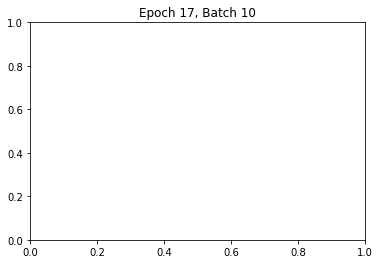

[[0.6847181  0.68062633 0.63610804 0.652887   0.6377691  0.6055202
  0.5979263  0.60602313 0.61750525 0.58536136 0.5773747  0.57390743
  0.54695374 0.56257516 0.56115264 0.55093235 0.54702944 0.5626754
  0.55802107 0.555809   0.5267773  0.511981   0.50933003 0.52007896
  0.55180925 0.6130638  0.6307026  0.6494147  0.63962364 0.62490296
  0.63125825 0.62338346 0.6372823  0.6505583  0.64243555 0.66536516
  0.6655284  0.6826193  0.69399005 0.69218874 0.6813046  0.66990733
  0.6947873  0.707874   0.7079283  0.70593375 0.688142   0.6726973
  0.6643294  0.6584303  0.6708677  0.67495966 0.696253   0.7144272
  0.71307176 0.73411876 0.7549605  0.74607825 0.7480064  0.7460777
  0.73747176 0.721208   0.70183766 0.69561464 0.6774737  0.6770167
  0.68554944 0.69469786 0.71627474 0.6972728  0.72142565 0.72319686
  0.7093409  0.7182164  0.7141273  0.7028919  0.70057726 0.69235784
  0.6953519  0.7134857  0.7552077  0.7796566  0.78956574 0.8080554
  0.78642726 0.7807388  0.78200686 0.78595054 0.8047151

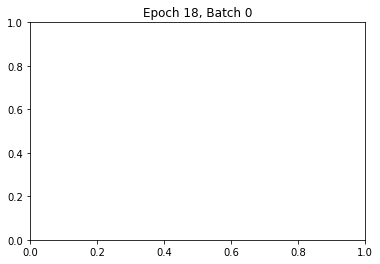

[[0.6698029  0.6656463  0.62191844 0.6384636  0.62362623 0.5918404
  0.5842396  0.59225655 0.6034941  0.5717948  0.56391186 0.5607571
  0.5341378  0.5496742  0.54798037 0.5380763  0.53399765 0.54961616
  0.54486257 0.54275197 0.5142826  0.49952677 0.49694458 0.5076246
  0.5388999  0.5990938  0.6164583  0.6350707  0.62524474 0.6107816
  0.6171274  0.60935426 0.623032   0.63617164 0.6279893  0.65078354
  0.65093255 0.6678369  0.67905235 0.6773214  0.6666165  0.6554265
  0.6800901  0.6929578  0.69304705 0.69086456 0.6732724  0.6580715
  0.6498531  0.64399743 0.65628797 0.66023016 0.68133104 0.6994153
  0.69815147 0.7189318  0.739493   0.7305654  0.7326149  0.7305558
  0.7220197  0.7059356  0.6869266  0.680851   0.66292655 0.6625309
  0.6710339  0.67995226 0.7012762  0.6825939  0.7063728  0.70819795
  0.6946695  0.70362484 0.6997564  0.6884102  0.6862823  0.67807585
  0.68129927 0.6991855  0.74040914 0.7645229  0.77426803 0.7924843
  0.77117455 0.76554763 0.76682925 0.77069366 0.7892141  0

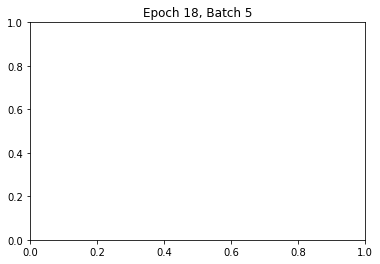

[[0.6508905  0.64663893 0.6035065  0.6198378  0.6052359  0.5738201
  0.56609946 0.574032   0.5850599  0.55369824 0.54612535 0.5432624
  0.5170123  0.5322609  0.5302946  0.5206321  0.5164273  0.5319336
  0.52712506 0.52512014 0.49713373 0.4828852  0.4802447  0.49047112
  0.52139264 0.58098555 0.5980573  0.6164069  0.6066665  0.5924296
  0.5986158  0.5909934  0.60448027 0.61740273 0.60932875 0.6317597
  0.632      0.64863485 0.6596424  0.65795165 0.6474281  0.63644606
  0.661168   0.6735901  0.67387563 0.6711914  0.6539203  0.6389542
  0.6308666  0.6251181  0.63718647 0.640994   0.6617864  0.6799244
  0.678832   0.6994769  0.7201155  0.71047485 0.71304405 0.7104243
  0.7019001  0.68591493 0.6670632  0.66113573 0.6434297  0.64297837
  0.651426   0.66029626 0.6813716  0.6628513  0.68649095 0.68850785
  0.67538947 0.68464774 0.6809172  0.6697219  0.6677132  0.65958697
  0.6628746  0.68058056 0.72120166 0.7450166  0.7545353  0.77255017
  0.75143343 0.7459782  0.7471759  0.7510738  0.7692473 

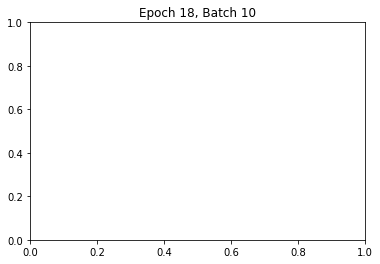

[[0.65732044 0.6532985  0.61028045 0.6265107  0.6120172  0.5808657
  0.573237   0.58113754 0.59202117 0.5609594  0.5532316  0.550323
  0.52432334 0.53943104 0.53685945 0.5272712  0.5231884  0.5383224
  0.5337311  0.53160685 0.5039893  0.48989192 0.4876071  0.49783865
  0.5279235  0.58748835 0.6047223  0.6228024  0.6133602  0.59888726
  0.6052741  0.5975087  0.611106   0.6239373  0.6160677  0.63844454
  0.63857186 0.65527916 0.6663881  0.66457576 0.65401584 0.642757
  0.66723764 0.6801031  0.6801094  0.6780767  0.6607856  0.64557856
  0.6374615  0.6316382  0.6436729  0.64773685 0.66845    0.6864845
  0.6850795  0.705777   0.72635657 0.71748316 0.7194582  0.7173911
  0.7088815  0.6929377  0.67393136 0.66792065 0.65002805 0.649491
  0.6578972  0.6669141  0.6880281  0.6694687  0.6931345  0.69492656
  0.68144274 0.6900226  0.6862007  0.675132   0.6729606  0.6648236
  0.6679979  0.68575543 0.7263598  0.75025356 0.759921   0.77799016
  0.75687927 0.75131005 0.7525639  0.75644577 0.77473766 0.

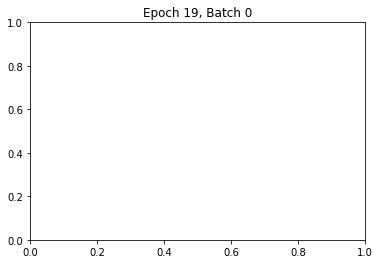

[[0.67023444 0.6663307  0.6224667  0.6390584  0.62397647 0.5919081
  0.5844313  0.5924279  0.6038986  0.5721619  0.5641128  0.56067437
  0.5341427  0.5493685  0.54836917 0.5380165  0.5342098  0.54960585
  0.5451586  0.5428905  0.5141748  0.49958894 0.49710235 0.5076971
  0.53887993 0.5998243  0.61744165 0.6358488  0.6260394  0.6112846
  0.61779934 0.6097934  0.62369037 0.6368083  0.6288713  0.6517124
  0.65176237 0.66873175 0.67990834 0.67775095 0.66744906 0.65547204
  0.6800386  0.6932068  0.693164   0.69200826 0.67435193 0.6586867
  0.6503013  0.6444203  0.6566632  0.660905   0.6821424  0.6999446
  0.6983018  0.71931374 0.7400597  0.73164344 0.73315156 0.73147464
  0.7228997  0.70689785 0.68744004 0.6812959  0.66309994 0.662466
  0.6708065  0.6799413  0.70097613 0.6826667  0.70633656 0.70800304
  0.6941986  0.702521   0.698379   0.68754864 0.6851672  0.6769729
  0.6798603  0.6977788  0.73909163 0.763359   0.77326113 0.7915393
  0.77025235 0.764506   0.7658593  0.76973623 0.78829837 0

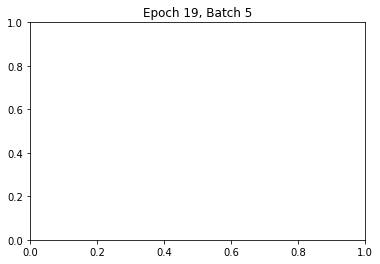

[[0.65842474 0.65442896 0.61041903 0.6270956  0.6120406  0.5799831
  0.5722651  0.58025634 0.59154874 0.559871   0.55204535 0.54904616
  0.5225295  0.537795   0.53620076 0.52614486 0.5219334  0.53753126
  0.5329036  0.53077817 0.50233936 0.48754278 0.4850458  0.495643
  0.52691156 0.58776546 0.60533476 0.62395173 0.6139638  0.5992865
  0.6055697  0.5976914  0.61157084 0.6248595  0.6167282  0.6396713
  0.6398141  0.6567098  0.66782016 0.6657635  0.6554201  0.6437118
  0.66838396 0.68139374 0.68145806 0.6797166  0.6621963  0.6467202
  0.638367   0.63250566 0.644704   0.6488209  0.6699825  0.6880868
  0.686556   0.7074773  0.72844195 0.71938956 0.7212593  0.7192263
  0.710583   0.6945384  0.6748996  0.6688404  0.65065205 0.6500449
  0.6584364  0.66768634 0.6887919  0.6702492  0.6942067  0.69602495
  0.6823833  0.69111943 0.68730277 0.6761672  0.67396533 0.66566145
  0.6689112  0.68703014 0.7282597  0.7524139  0.76211065 0.780378
  0.7590261  0.753466   0.7546906  0.75861764 0.7770635  0.7

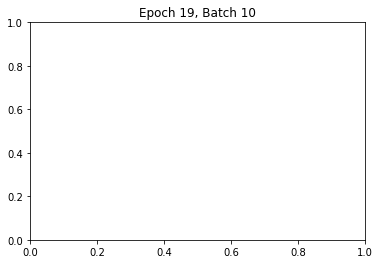

[[0.665195   0.6611989  0.6167681  0.63349074 0.61821324 0.58581144
  0.57803    0.58609635 0.59758073 0.56558025 0.5576296  0.554563
  0.5278157  0.5433786  0.5417876  0.5315091  0.52725697 0.54300344
  0.538413   0.5362452  0.507393   0.4925112  0.4899392  0.5006278
  0.5322916  0.59392524 0.6116849  0.6304119  0.62035304 0.60552454
  0.6119144  0.6039132  0.61794716 0.6313182  0.6231594  0.64629245
  0.6465403  0.66334283 0.67451835 0.67239684 0.6620432  0.65012395
  0.67496884 0.68815553 0.6881958  0.6865829  0.66898906 0.6532661
  0.6448792  0.6389526  0.6510416  0.65543264 0.67661315 0.69484794
  0.69325614 0.7144627  0.73570687 0.72654486 0.72843957 0.72633344
  0.7175724  0.7015356  0.6817386  0.6756051  0.6570936  0.65637964
  0.66466117 0.67411894 0.69542503 0.67668784 0.7009024  0.7027272
  0.68890405 0.69761527 0.693755   0.68256855 0.6803159  0.67189777
  0.67519546 0.6935142  0.7350902  0.7594561  0.76928365 0.7877935
  0.76620597 0.76053894 0.7618188  0.7657678  0.784418

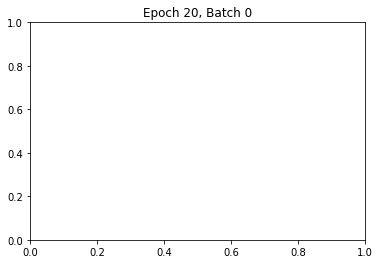

[[0.66579664 0.6618301  0.61785823 0.6341624  0.61906147 0.58728576
  0.5793096  0.5874493  0.5987694  0.56680894 0.5588392  0.5560678
  0.52940404 0.54495907 0.5423119  0.5323659  0.5275616  0.54353243
  0.5388575  0.536579   0.50836176 0.4932684  0.49102014 0.50169194
  0.5330041  0.5945127  0.6123589  0.63103414 0.6209374  0.6060842
  0.6124539  0.6044232  0.6184783  0.63181925 0.6237681  0.6469418
  0.6468159  0.6637085  0.67486084 0.6726074  0.66237104 0.6501889
  0.67503285 0.68843114 0.6883923  0.68709284 0.6694968  0.65338326
  0.64489686 0.6390296  0.65104955 0.65566516 0.676914   0.6952251
  0.6934772  0.71479    0.7360772  0.7272556  0.7288875  0.7269454
  0.7180005  0.70191395 0.68182176 0.67563415 0.65718484 0.6561602
  0.664251   0.6739111  0.69524264 0.67643505 0.7007891  0.7025728
  0.6885669  0.6967766  0.6928621  0.68193424 0.6795875  0.6713033
  0.6746069  0.6928552  0.7343048  0.75869    0.76856637 0.78720564
  0.76556766 0.75980484 0.7611489  0.7650978  0.783926   

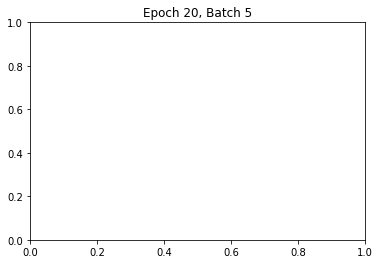

[[0.6457244  0.64184844 0.5985757  0.6147202  0.59981847 0.56869555
  0.5609202  0.56880057 0.5797166  0.548596   0.54092205 0.53825647
  0.51222336 0.52722925 0.52457476 0.51476055 0.5103665  0.52553195
  0.52104384 0.5189311  0.49149826 0.4774597  0.47521037 0.48535043
  0.51529914 0.5757299  0.5932012  0.6116143  0.6016247  0.5870276
  0.59334415 0.5853965  0.59923035 0.61227566 0.6043754  0.62715864
  0.627155   0.6437436  0.6546799  0.65240484 0.6423885  0.630248
  0.6548006  0.66799957 0.6679265  0.66657966 0.6491996  0.6333745
  0.62504256 0.6192716  0.6310766  0.63550425 0.6565052  0.6745925
  0.6728269  0.6939323  0.7152191  0.70602983 0.70786065 0.7056531
  0.6966792  0.6808798  0.66111183 0.65507376 0.6369872  0.63591
  0.6439133  0.6533488  0.6742323  0.65583485 0.67963153 0.6814428
  0.6678425  0.676282   0.67252624 0.6616449  0.6595065  0.6511363
  0.6547051  0.6725403  0.7132433  0.73726034 0.7471262  0.7655415
  0.74415016 0.73844165 0.73982024 0.7437864  0.7623212  0.7

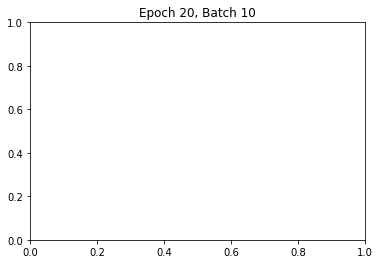

[[0.65640515 0.652617   0.6083108  0.6246335  0.6092045  0.5774167
  0.57033247 0.5780005  0.58975244 0.5581506  0.5501842  0.546715
  0.52045727 0.5352726  0.5350069  0.5242421  0.52023846 0.5356149
  0.5313323  0.5292006  0.5003351  0.48644775 0.483876   0.49396914
  0.5250359  0.5867148  0.6042711  0.6221925  0.61237365 0.5975196
  0.6043251  0.5959986  0.6099662  0.6228431  0.61517364 0.63791746
  0.63792753 0.654727   0.66577715 0.66345435 0.6533512  0.6409357
  0.6657887  0.67920184 0.6790915  0.6778577  0.66025126 0.6441139
  0.6355898  0.62976277 0.64179295 0.6463085  0.66756815 0.6858017
  0.6839574  0.7052586  0.726708   0.71768093 0.71934867 0.7172688
  0.7082642  0.69230396 0.6721763  0.6660433  0.64772826 0.6465594
  0.6545813  0.66417414 0.685293   0.6667085  0.69079536 0.69249886
  0.6786218  0.6867682  0.6828626  0.67211026 0.66981715 0.6614196
  0.66454583 0.68258744 0.72395086 0.7482011  0.7582714  0.77688086
  0.7553235  0.74945265 0.75093096 0.7548918  0.77364504 0.

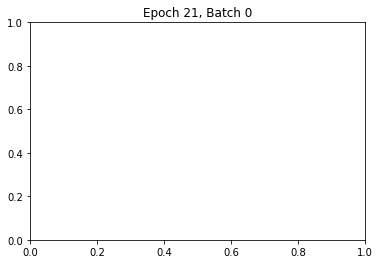

[[0.66138643 0.6575808  0.61253995 0.62905854 0.61341    0.581384
  0.57425714 0.5819635  0.59386986 0.56242883 0.5543     0.5505352
  0.5243625  0.5389159  0.5393159  0.5282834  0.5241894  0.53970355
  0.53545505 0.5332942  0.5041197  0.48998877 0.48735794 0.4975807
  0.5290787  0.59076804 0.60854155 0.6266598  0.61667967 0.6016417
  0.6084867  0.6000254  0.6142048  0.6272958  0.6194972  0.6425249
  0.642608   0.6595364  0.670674   0.6682806  0.6581047  0.6455478
  0.67055315 0.68418187 0.68406624 0.6828006  0.6649892  0.6486702
  0.6399947  0.63415486 0.646286   0.65078676 0.6723373  0.6908844
  0.68895787 0.71046495 0.7322517  0.7230329  0.724737   0.72254956
  0.71332747 0.69721574 0.67672455 0.6705414  0.65204257 0.65079916
  0.65883476 0.6685445  0.689871   0.6710921  0.6955045  0.6972967
  0.683267   0.69145745 0.6875584  0.6767132  0.6744521  0.6659332
  0.66911656 0.68743974 0.7291668  0.75352216 0.7636619  0.78249675
  0.7607216  0.7547483  0.7562931  0.76026976 0.77915996 0.

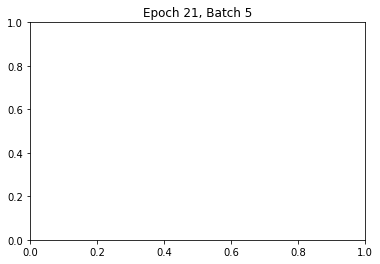

[[0.6445365  0.64073485 0.59608096 0.61254674 0.59707904 0.5652526
  0.5580167  0.56557816 0.57713807 0.5462411  0.538306   0.5349205
  0.50907284 0.52334046 0.52335584 0.51268035 0.5083828  0.52378136
  0.5194242  0.5174391  0.48886755 0.47501382 0.4723852  0.48251483
  0.5133396  0.574386   0.5920567  0.61006266 0.6001216  0.5852284
  0.5919402  0.5836004  0.59762543 0.61061555 0.602862   0.62568814
  0.6257721  0.6424996  0.653468   0.6511065  0.6411291  0.6287136
  0.6534589  0.6669044  0.6668053  0.66541344 0.6478434  0.6317516
  0.62315935 0.6173634  0.62933356 0.633729   0.65508264 0.67353225
  0.67166084 0.6930421  0.7147622  0.70524126 0.7071039  0.7047427
  0.69548905 0.67954034 0.6591084  0.65305096 0.6347249  0.63348144
  0.64146847 0.6511477  0.6722056  0.6535861  0.67779523 0.6796872
  0.6660147  0.6743755  0.67081875 0.6597812  0.65771    0.6491477
  0.6527435  0.6710647  0.7124556  0.73665565 0.7465802  0.7653839
  0.7435793  0.7378084  0.73922586 0.7433018  0.7619747  

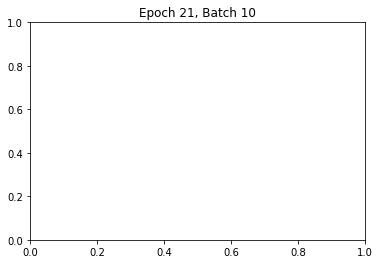

[[0.64132476 0.6376228  0.59314835 0.6095195  0.5942622  0.56328064
  0.55579126 0.56341165 0.57450557 0.5438875  0.5360687  0.5332525
  0.50761026 0.52191526 0.5212394  0.5103207  0.5066601  0.5211673
  0.5173719  0.51532006 0.4871948  0.47348025 0.47087488 0.4809292
  0.5110407  0.57149684 0.58897054 0.6068361  0.59700596 0.58218896
  0.58895725 0.580613   0.5945778  0.60743976 0.5997304  0.62255365
  0.6225513  0.6392109  0.65018034 0.6477469  0.637879   0.62530005
  0.6500182  0.66353464 0.6633706  0.6622319  0.6446028  0.6284819
  0.6198981  0.6141123  0.6259345  0.6304349  0.6518121  0.67022264
  0.6682328  0.689628   0.7114161  0.70197326 0.7037524  0.7014222
  0.692104   0.6761801  0.65569335 0.6496289  0.6312637  0.6299513
  0.63791287 0.64768076 0.66863906 0.65004957 0.67416453 0.6760355
  0.662421   0.670663   0.6670207  0.65616643 0.6540456  0.6455004
  0.6490302  0.6673337  0.7086191  0.7328094  0.74275666 0.7616514
  0.7397874  0.73401475 0.73543125 0.739513   0.75822043 

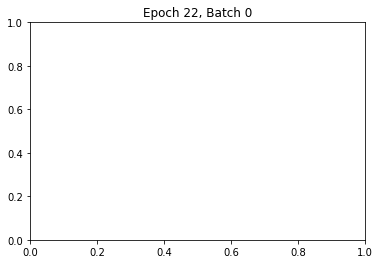

[[0.6375964  0.63390845 0.5898991  0.6061855  0.5910456  0.56012136
  0.5526354  0.5602523  0.5713436  0.5408486  0.5329961  0.53016555
  0.50459284 0.5188121  0.51789075 0.5068932  0.50341076 0.51753205
  0.51394325 0.511908   0.4842008  0.4703462  0.46776295 0.47782943
  0.50747716 0.567748   0.58526504 0.60308164 0.59329224 0.57845837
  0.5852075  0.57684845 0.5908427  0.6036721  0.5960099  0.6188161
  0.6187803  0.63539976 0.64632684 0.6438331  0.6341068  0.62132996
  0.64598906 0.65957946 0.6593851  0.65842307 0.6407399  0.6245691
  0.6159655  0.6102139  0.6219756  0.6264772  0.64789134 0.6662887
  0.66422385 0.68564516 0.7074876  0.69806546 0.69976664 0.6974482
  0.68804    0.6721149  0.6514688  0.64540213 0.6269874  0.6255906
  0.6335226  0.64339894 0.66427606 0.64567524 0.6697794  0.6716346
  0.65800935 0.6661038  0.66241455 0.65174323 0.6496145  0.64102936
  0.64450836 0.6628528  0.7041882  0.72837996 0.7383593  0.7572952
  0.73541963 0.72965187 0.7310632  0.7351468  0.7538910

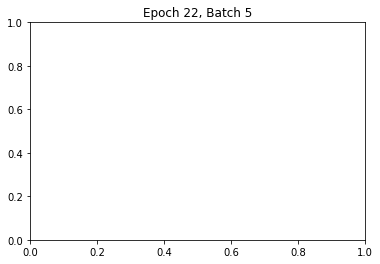

[[0.6534275  0.64975566 0.604073   0.6206621  0.6045598  0.5722247
  0.56497407 0.5726347  0.5846382  0.55332226 0.54498464 0.5414214
  0.51520205 0.5297245  0.5308676  0.51924235 0.5151009  0.5304132
  0.5265872  0.52449065 0.49518353 0.48077345 0.4780228  0.48835695
  0.5200582  0.5822685  0.6003029  0.61846197 0.60842574 0.59311455
  0.6000517  0.59137005 0.605843   0.61905307 0.6112199  0.6346016
  0.63447505 0.65150446 0.66265994 0.6600488  0.6501761  0.6369763
  0.66216135 0.67610866 0.6758797  0.6750704  0.6570528  0.64039594
  0.6314904  0.6255937  0.6376785  0.64235073 0.6642412  0.6830319
  0.6808268  0.7027225  0.72509736 0.7156088  0.71717626 0.7149421
  0.705293   0.68905836 0.66774076 0.6615158  0.6425585  0.6410411
  0.64903986 0.65933347 0.6806821  0.6616197  0.6864163  0.68827564
  0.6741785  0.6821936  0.67843086 0.6676559  0.665348   0.65649086
  0.6599785  0.6786483  0.7207832  0.74539983 0.7556904  0.7748357
  0.7527665  0.746764   0.7483106  0.75242144 0.7715036  

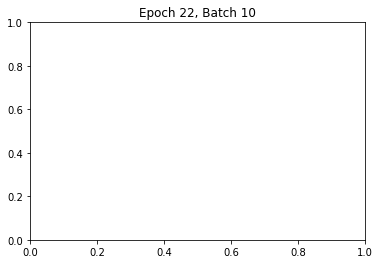

[[0.6399652  0.63632834 0.5908527  0.6074661  0.5914706  0.5595092
  0.55218196 0.55974793 0.57157534 0.54062414 0.53250086 0.5291139
  0.5032841  0.5175412  0.51774764 0.50675493 0.5022663  0.5177708
  0.5135554  0.5115136  0.4827494  0.46887743 0.46621156 0.4762644
  0.50740683 0.5691966  0.587058   0.60527915 0.5951061  0.5799539
  0.58674157 0.57817125 0.59249926 0.6057806  0.5978502  0.6212058
  0.62114346 0.63799787 0.649022   0.6464338  0.6366751  0.62358063
  0.64858675 0.6623927  0.6621796  0.6613045  0.6433676  0.6268709
  0.6180147  0.61219406 0.62417674 0.6287377  0.6505256  0.66923773
  0.667019   0.6887152  0.71092856 0.70140064 0.7030275  0.7007003
  0.69103074 0.67493004 0.65372455 0.64759976 0.6288795  0.62735105
  0.635305   0.6454721  0.66658366 0.64767367 0.6722701  0.6741483
  0.6602458  0.66823816 0.6646104  0.6539101  0.6516941  0.64294195
  0.64644855 0.6651387  0.70712554 0.7317403  0.74182534 0.7609891
  0.7388143  0.73300254 0.7344068  0.73864126 0.7576119  0

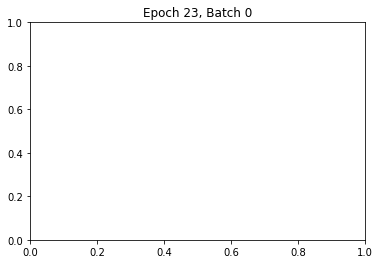

[[0.6534308  0.64990395 0.6037721  0.6203956  0.603846   0.57142705
  0.5641903  0.5718051  0.58409774 0.55274516 0.5443054  0.5405846
  0.51432437 0.52882713 0.5310957  0.518724   0.51491696 0.5299901
  0.52648747 0.52436835 0.4947125  0.480361   0.47752407 0.48787436
  0.519628   0.5824173  0.6005185  0.6186335  0.6085121  0.59304637
  0.6001529  0.5912859  0.60587424 0.61913085 0.6113145  0.63487977
  0.6347094  0.6517424  0.66296846 0.6601941  0.6504502  0.6368097
  0.6620942  0.67638    0.6760406  0.6756217  0.6574056  0.6403988
  0.6313404  0.6254396  0.63753015 0.6423761  0.66451967 0.68348485
  0.68108004 0.70328313 0.7259472  0.7164925  0.7179054  0.7157127
  0.70582867 0.6895183  0.66774166 0.66146326 0.6422431  0.64045364
  0.6484577  0.6590516  0.68049043 0.6613212  0.6863784  0.6882181
  0.6739076  0.6815868  0.6777018  0.6671653  0.6646927  0.6557273
  0.6591379  0.6779224  0.7202676  0.7450008  0.7554992  0.7747107
  0.75265354 0.7464821  0.7481537  0.75227624 0.7714787 

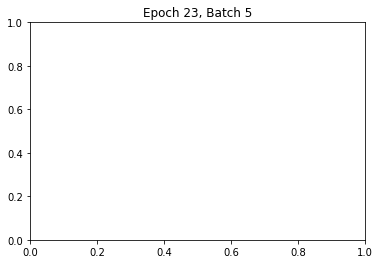

[[0.63552934 0.63210195 0.5865329  0.6029516  0.5867518  0.5552365
  0.5479649  0.55531985 0.5673656  0.53679377 0.5285794  0.52542144
  0.49992228 0.5140037  0.5155036  0.50348675 0.5001502  0.5142854
  0.5109929  0.5089519  0.48035598 0.46708485 0.46430066 0.474062
  0.50428885 0.5655128  0.5833917  0.6012743  0.5912073  0.5759124
  0.58293563 0.5741548  0.58857566 0.60167986 0.593939   0.61724436
  0.6171455  0.6338866  0.6449048  0.64210397 0.6325837  0.6189865
  0.6439158  0.6580718  0.657705   0.6573432  0.63934344 0.6225329
  0.61356264 0.607778   0.61964023 0.6243897  0.6462793  0.6650512
  0.6625839  0.68454355 0.7069896  0.69756097 0.69898504 0.6967148
  0.6868624  0.6708109  0.649117   0.6429505  0.62405914 0.6222484
  0.63006365 0.6405163  0.6615892  0.6426863  0.66745234 0.6692715
  0.6551598  0.6626019  0.65884936 0.64854187 0.6461188  0.6373296
  0.64068663 0.65926975 0.7012115  0.7257178  0.73605037 0.755149
  0.7331787  0.7271513  0.72874254 0.73296136 0.7519346  0.770

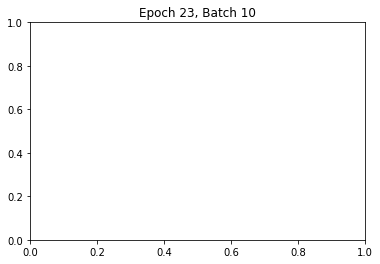

[[0.6415572  0.6381025  0.59181434 0.6083144  0.59185034 0.5598109
  0.5527039  0.56015    0.5723737  0.54142314 0.5330758  0.5294633
  0.50360453 0.51780975 0.52010125 0.50779206 0.5042329  0.51879174
  0.5154246  0.5133303  0.48432082 0.4707232  0.46786052 0.47768864
  0.50865227 0.5706682  0.588696   0.6066795  0.5965433  0.5811118
  0.5882444  0.5793523  0.5938982  0.6070746  0.5992987  0.6228143
  0.6227772  0.6397331  0.6508106  0.64797807 0.6382612  0.6246327
  0.64980406 0.66405565 0.66370535 0.6632469  0.6450851  0.62806815
  0.6190082  0.6131631  0.6251023  0.62993467 0.65203446 0.67098427
  0.6684325  0.6906495  0.7134442  0.7038293  0.7053064  0.70294476
  0.69295937 0.6767832  0.6548463  0.64862174 0.6294317  0.62756443
  0.6353967  0.6460891  0.6673251  0.64825916 0.6732578  0.6750916
  0.66083884 0.66823643 0.6645372  0.6541221  0.65164304 0.64266497
  0.64615846 0.66498154 0.70720327 0.73178095 0.74225163 0.7615537
  0.7394601  0.7333032  0.7349919  0.7391306  0.7582813

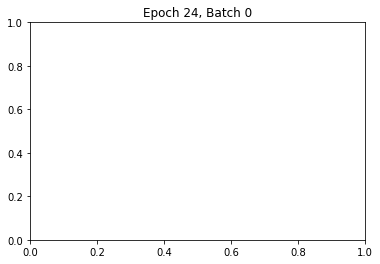

[[0.6482505  0.6447425  0.5975356  0.6142907  0.5973921  0.5647602
  0.5574086  0.5649934  0.5773078  0.54573    0.5374255  0.5340651
  0.5077398  0.522357   0.52349603 0.5115858  0.50710183 0.5227215
  0.5187951  0.5167122  0.48710984 0.47310263 0.47016633 0.48016658
  0.5123317  0.5756573  0.5939863  0.6125939  0.6019718  0.5864868
  0.5934815  0.58450234 0.59924626 0.6128806  0.60474205 0.62871826
  0.628945   0.6461138  0.657323   0.6544186  0.6445887  0.6308071
  0.65623844 0.67069006 0.6703109  0.66959393 0.65106124 0.6340095
  0.6247379  0.6188636  0.6311837  0.6357094  0.65821713 0.67743224
  0.6749322  0.6973747  0.72059286 0.71045357 0.7122516  0.70949954
  0.6992601  0.68289816 0.6606989  0.6544283  0.63503134 0.6330237
  0.6409888  0.6518246  0.67324424 0.65399456 0.67923456 0.6811251
  0.66680765 0.67442244 0.6709542  0.66019034 0.65784067 0.6486715
  0.6524922  0.67158175 0.71421075 0.7390721  0.7495034  0.76930285
  0.7466699  0.74062353 0.74217117 0.74639964 0.76579505 

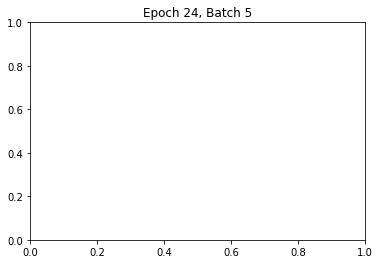

[[0.6496649  0.64623445 0.59878343 0.6155755  0.59879166 0.5661362
  0.55884975 0.5663989  0.57892126 0.54738694 0.5388734  0.5353475
  0.5090407  0.52335054 0.52545094 0.5132485  0.5090112  0.5243387
  0.52063304 0.5185669  0.48883164 0.4750656  0.47207326 0.48196793
  0.51402694 0.57718676 0.5955835  0.61393565 0.603478   0.5877232
  0.59505713 0.58593935 0.600761   0.6142513  0.60626185 0.6303002
  0.6303628  0.64759374 0.6588414  0.655823   0.64611465 0.63197535
  0.6575225  0.67222565 0.67178136 0.6714092  0.65286505 0.63540876
  0.6261217  0.6201498  0.6323853  0.6372007  0.6598061  0.6792149
  0.6765248  0.69920534 0.72264737 0.71268237 0.71420795 0.71167153
  0.70131147 0.68487614 0.6623284  0.656001   0.63640213 0.63431245
  0.64219713 0.65321034 0.67475396 0.65539855 0.68081486 0.6826864
  0.66822153 0.6755072  0.671843   0.66138846 0.65889233 0.64966697
  0.65332526 0.67241275 0.71504235 0.7398438  0.7505029  0.7702664
  0.7477177  0.7414763  0.74319464 0.7474007  0.7668678 

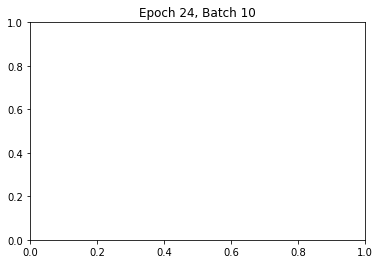

[[0.6376886  0.6343714  0.58779955 0.6042676  0.587823   0.55555576
  0.5484597  0.55579895 0.56823426 0.5372723  0.5288548  0.5252457
  0.49941036 0.51333755 0.51614195 0.50351083 0.50004786 0.5143461
  0.51117796 0.5091645  0.4800698  0.46682596 0.46388584 0.47358787
  0.50430703 0.5663657  0.58457655 0.6025812  0.5923538  0.57675844
  0.583985   0.5750221  0.5896345  0.6029547  0.59510136 0.6189197
  0.61879885 0.63579726 0.64693266 0.6438752  0.6344213  0.62021714
  0.6454111  0.66012484 0.6596206  0.65952426 0.6412038  0.6238697
  0.61461216 0.60872906 0.6207095  0.62558836 0.6479867  0.66722304
  0.66443473 0.6868479  0.71011484 0.7003826  0.70170057 0.69933635
  0.6890424  0.672765   0.6502319  0.64397174 0.62461746 0.6226668
  0.6303933  0.64117306 0.6624631  0.6432645  0.66851896 0.6703754
  0.65600663 0.6631073  0.6593384  0.6492235  0.646668   0.6376068
  0.6410118  0.6599176  0.7022497  0.7269917  0.7375471  0.7569803
  0.7347833  0.7286116  0.7302954  0.7345119  0.7537164 

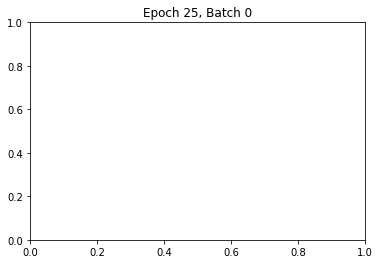

[[0.62976074 0.62654847 0.58012444 0.596523   0.5801233  0.5487339
  0.5410835  0.5485104  0.5603946  0.5295895  0.52146137 0.5189646
  0.49324834 0.50733733 0.5090849  0.4963199  0.49275926 0.5071032
  0.50394815 0.50196546 0.47283304 0.46005052 0.4570839  0.46665445
  0.49714684 0.5591435  0.57731014 0.5952497  0.5849853  0.56936926
  0.5766321  0.56759983 0.58224314 0.59553087 0.5876993  0.61149645
  0.611347   0.62815666 0.63926405 0.63611823 0.6269221  0.61252034
  0.6375665  0.6523784  0.65177727 0.65190667 0.6336442  0.6163005
  0.6070202  0.6011831  0.613065   0.61795664 0.6403374  0.6596016
  0.6567319  0.67912287 0.7022001  0.6925905  0.693834   0.6915183
  0.681176   0.664973   0.642327   0.6361122  0.61668164 0.61456287
  0.62228537 0.6332392  0.6544229  0.6352963  0.6605324  0.6624023
  0.64809877 0.655049   0.6512724  0.64134103 0.63878345 0.6296692
  0.6331098  0.65182054 0.6939724  0.7185747  0.7290935  0.74856544
  0.7263185  0.7201208  0.7218556  0.7261204  0.74529403

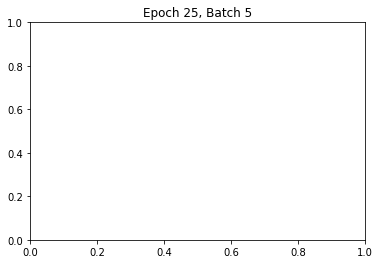

[[0.63745373 0.63424975 0.58701766 0.60370475 0.5870172  0.5553319
  0.5476375  0.5551526  0.567018   0.5359284  0.52781934 0.5252445
  0.49922517 0.51341236 0.5155887  0.5024201  0.4988034  0.51334924
  0.5102637  0.5082365  0.47844002 0.46504062 0.46194452 0.47160235
  0.50329363 0.5662524  0.58464104 0.60269046 0.5923168  0.576449
  0.5839042  0.57462555 0.58953226 0.6029117  0.5950617  0.6191358
  0.6189545  0.63593453 0.6471612  0.6439121  0.6346918  0.6199201
  0.6452902  0.66036004 0.659731   0.6600437  0.6415484  0.6238664
  0.61444783 0.6085329  0.62049365 0.6255704  0.648213   0.66770667
  0.66469723 0.68744725 0.7108647  0.7012487  0.7023716  0.700092
  0.6895649  0.67322564 0.6502072  0.6439103  0.6242093  0.6218243
  0.6295694  0.64083165 0.66223365 0.6429403  0.66849166 0.67035866
  0.6558178  0.66262954 0.6587238  0.64886945 0.6461652  0.6369492
  0.6403238  0.65921915 0.7016225  0.7264448  0.7372268  0.7566752
  0.7344853  0.728082   0.7299554  0.734257   0.753498   0.7

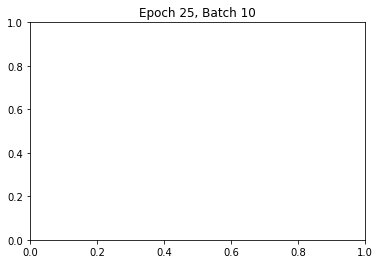

[[0.64471996 0.6412428  0.59433347 0.6113191  0.5949101  0.5629406
  0.5552351  0.5627884  0.574823   0.54349154 0.5352448  0.5324897
  0.5062956  0.52050126 0.52085483 0.5085652  0.50379115 0.5187569
  0.5154819  0.5134261  0.48460776 0.47021025 0.4675022  0.47736984
  0.5089539  0.571675   0.59022135 0.60830873 0.59789914 0.5818667
  0.5894644  0.5800584  0.5950915  0.6085332  0.60067266 0.62492293
  0.6246932  0.6418832  0.6531423  0.6498371  0.6405316  0.62560874
  0.65119624 0.6663542  0.6657222  0.6661169  0.6474816  0.62957025
  0.62007004 0.6140994  0.62612444 0.63130826 0.6541266  0.67373294
  0.67061037 0.6935646  0.71733093 0.70764226 0.7086871  0.7064286
  0.69578135 0.6793537  0.6561186  0.64975625 0.62988377 0.62752384
  0.63519925 0.6465309  0.66806096 0.6486659  0.6743923  0.6762335
  0.6615131  0.668214   0.6643552  0.65442055 0.6520353  0.64299875
  0.646866   0.6658085  0.7081377  0.7328027  0.7431943  0.7627514
  0.74055547 0.7342091  0.73599607 0.74019045 0.7595915

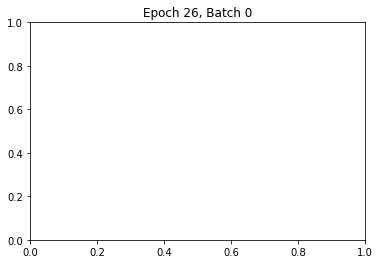

[[0.6273649  0.62421876 0.5768164  0.59342676 0.5771981  0.54549944
  0.5379718  0.5451989  0.5570158  0.5260698  0.5183799  0.5158471
  0.49011654 0.50384116 0.5051134  0.49236023 0.4889218  0.5031329
  0.4997975  0.49803868 0.4689187  0.45596355 0.45282876 0.4623952
  0.49309707 0.5557896  0.57415354 0.5923347  0.5817617  0.56597215
  0.57334965 0.5642273  0.5789387  0.5924224  0.5844704  0.6087069
  0.6087655  0.6257697  0.6368391  0.63354784 0.62422025 0.6095728
  0.63489187 0.6498906  0.64926356 0.6494225  0.63094795 0.61320055
  0.6037225  0.5978407  0.60976905 0.6148165  0.6374626  0.6569716
  0.65381426 0.67660755 0.7003443  0.6904289  0.69163233 0.68917245
  0.67848635 0.6622508  0.6390302  0.63279104 0.61338705 0.6110789
  0.6186853  0.6295877  0.6507929  0.63172036 0.657088   0.6589422
  0.6444423  0.6510834  0.6473016  0.63756394 0.6348661  0.62582266
  0.6291545  0.64798766 0.6902328  0.7150056  0.7257163  0.7454675
  0.7230411  0.7166899  0.71854025 0.7228409  0.7421995  

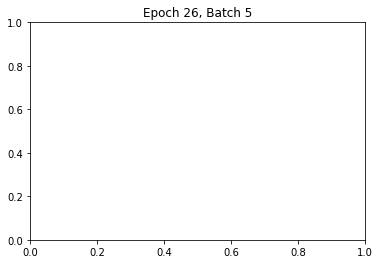

[[0.6279581  0.6248572  0.5770362  0.5937056  0.5774217  0.5456282
  0.53797513 0.5452872  0.5571706  0.5262893  0.5183692  0.5158747
  0.49012333 0.503987   0.50559133 0.49256885 0.48901996 0.5034444
  0.50007755 0.49821877 0.4689198  0.4560586  0.45288026 0.46236104
  0.49336666 0.5562948  0.5748228  0.59307665 0.58239    0.5663963
  0.57386905 0.56455606 0.57951206 0.5930402  0.5851021  0.6093267
  0.60947734 0.626518   0.63761663 0.63426346 0.6249707  0.6101297
  0.6355372  0.6506829  0.6500147  0.65020126 0.6316088  0.6137071
  0.6041694  0.59829247 0.610337   0.6153256  0.6381215  0.65773314
  0.6545587  0.6775039  0.70139307 0.69133514 0.6926225  0.69003004
  0.6792411  0.6629787  0.63951844 0.63324326 0.6135216  0.61111134
  0.6186655  0.62994325 0.6512343  0.6319758  0.6576083  0.65945953
  0.6448657  0.6513499  0.64773136 0.6378613  0.63512635 0.62582636
  0.6293637  0.64839    0.6906578  0.71548575 0.7262551  0.7461514
  0.7236081  0.71727324 0.7190905  0.72340494 0.74294   

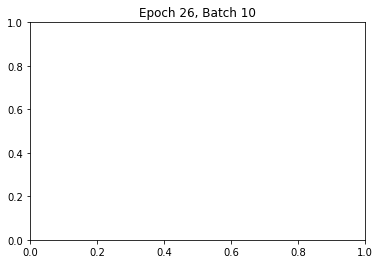

[[0.6407395  0.63732535 0.589944   0.60706955 0.5902762  0.55830383
  0.5507181  0.5581249  0.5702118  0.5389659  0.53075886 0.5281139
  0.50187963 0.51599246 0.5174655  0.5041432  0.4999951  0.51452804
  0.5117081  0.5097254  0.48014867 0.4662695  0.46326366 0.47303414
  0.5044948  0.5682203  0.5869121  0.60506105 0.59444195 0.5782223
  0.58598375 0.576397   0.591579   0.6050853  0.59720474 0.62163764
  0.6215846  0.6388356  0.65011066 0.64666575 0.6373526  0.6221449
  0.64783806 0.6633023  0.6625833  0.6630493  0.6443202  0.6260645
  0.6164286  0.6104555  0.62255126 0.62779135 0.650817   0.67064685
  0.6673916  0.69062394 0.71474564 0.7048159  0.7059082  0.703497
  0.69265014 0.67623204 0.65252346 0.6461386  0.62607056 0.6233409
  0.6310113  0.64264697 0.6642389  0.6447949  0.67076814 0.6726002
  0.6577154  0.6641115  0.6602684  0.6504595  0.6475659  0.63836
  0.6423702  0.6613845  0.70361775 0.72819453 0.7391995  0.758949
  0.73665595 0.730064   0.7320814  0.7362763  0.7559083  0.77

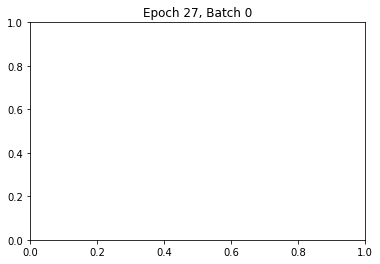

[[0.6372252  0.63383514 0.58689785 0.60394865 0.58726734 0.5553899
  0.54791325 0.55523306 0.56734365 0.5363381  0.5281831  0.52528316
  0.4994009  0.51309997 0.5135504  0.5015877  0.49664974 0.511579
  0.5081952  0.506361   0.47787073 0.4647494  0.4618628  0.4712501
  0.5019377  0.56304985 0.58109635 0.5992145  0.5894303  0.57406765
  0.58107156 0.5725296  0.5868483  0.6003112  0.5920288  0.6159773
  0.6160551  0.6327654  0.64372176 0.6408629  0.63164014 0.6179021
  0.6425574  0.65702933 0.6565737  0.655687   0.63783807 0.6209425
  0.6116658  0.60577035 0.6177128  0.62184733 0.6441304  0.6638163
  0.6611653  0.68283385 0.70660764 0.6970561  0.697828   0.69573027
  0.68490684 0.6685871  0.64558125 0.6394476  0.62027496 0.6183147
  0.62614775 0.6368149  0.6578498  0.6386253  0.66330737 0.6655126
  0.65206563 0.6597524  0.6562019  0.646168   0.64410037 0.6350313
  0.63882715 0.65770304 0.6994683  0.7238458  0.73396134 0.75367796
  0.7310336  0.7252572  0.72668743 0.7309095  0.749682   0.

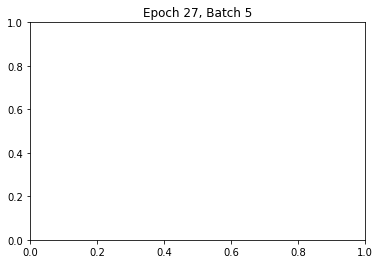

[[0.6467942  0.64352906 0.596034   0.61311096 0.5963264  0.5641626
  0.5569744  0.56423247 0.57648814 0.5454976  0.5370948  0.53388655
  0.50790495 0.5213398  0.5225016  0.5101385  0.50538826 0.52008915
  0.5169997  0.5151304  0.48631766 0.47327575 0.47035074 0.47973728
  0.5104615  0.5718427  0.5901369  0.6082536  0.59849274 0.58286816
  0.5901201  0.58139694 0.5959053  0.60941666 0.60113615 0.62534046
  0.6253047  0.6421201  0.65320015 0.6501913  0.6410513  0.62683827
  0.65167814 0.6664716  0.6659337  0.6654247  0.6473425  0.6301288
  0.6207168  0.61475444 0.62676305 0.63103634 0.653575   0.6733679
  0.6705639  0.69253373 0.71603316 0.70579815 0.7073976  0.7047335
  0.69443023 0.6778653  0.6549459  0.64870334 0.62927186 0.627304
  0.6350484  0.64580655 0.6670005  0.6476269  0.67253375 0.67469525
  0.66096926 0.66843635 0.66472673 0.65485203 0.6526552  0.64348286
  0.6471764  0.6660397  0.707797   0.7323004  0.74265486 0.7624849
  0.73981416 0.7338309  0.7354066  0.7395909  0.7584700

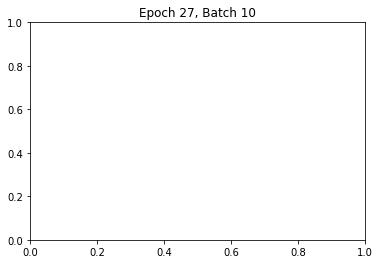

[[0.63845813 0.63548857 0.58702874 0.60372794 0.5864801  0.55423003
  0.54665154 0.5540208  0.56629425 0.535048   0.52681774 0.5240709
  0.49798444 0.511844   0.51601046 0.50150377 0.49809816 0.5125654
  0.50996    0.5080523  0.47717986 0.46409747 0.4606188  0.47014573
  0.5025124  0.56719035 0.58608925 0.6040935  0.5934295  0.57693005
  0.58494776 0.5750769  0.5905016  0.6040066  0.59620833 0.62091595
  0.62054527 0.6377992  0.6491752  0.64549404 0.6364935  0.620556
  0.646367   0.6623207  0.66141874 0.6626042  0.6437052  0.62499803
  0.6151949  0.6091935  0.62114567 0.6267628  0.65007275 0.67008173
  0.6664638  0.69002116 0.71437526 0.70480293 0.70545226 0.7033531
  0.69222224 0.67577124 0.6515221  0.64508164 0.62475055 0.62175155
  0.6293     0.64121974 0.6629114  0.64341646 0.6696984  0.67148453
  0.6563131  0.66226065 0.65812665 0.64879566 0.6456062  0.63612133
  0.63925046 0.6583604  0.7006733  0.7256046  0.73683697 0.7565827
  0.7344287  0.72760063 0.7298004  0.7339714  0.753675

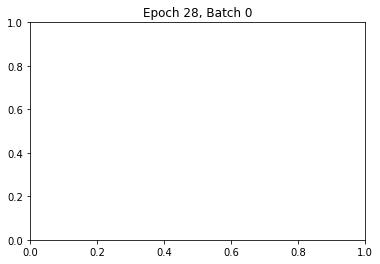

[[0.643665   0.64078    0.59113175 0.60796195 0.59014153 0.55761033
  0.55002016 0.55738324 0.57004213 0.53872824 0.5301343  0.5272723
  0.5012024  0.51520485 0.5192035  0.50483286 0.5012971  0.51610786
  0.51313585 0.5111628  0.48013565 0.46718192 0.46375236 0.47321513
  0.5058319  0.57113624 0.5903384  0.60887074 0.5976929  0.5810116
  0.5890333  0.5790138  0.594685   0.60856557 0.6005122  0.62568605
  0.62566036 0.6431416  0.654555   0.6507521  0.6415179  0.6254572
  0.65152115 0.66762656 0.6667192  0.66776234 0.6485016  0.6295575
  0.6195901  0.61359125 0.6258615  0.631317   0.6549583  0.67503995
  0.67137223 0.6953451  0.7202632  0.7102093  0.71114093 0.70866054
  0.6973149  0.68071586 0.6560956  0.6495755  0.6289446  0.6257892
  0.6334123  0.6455663  0.66737217 0.6477197  0.6742535  0.67597634
  0.66052204 0.66629547 0.66244    0.65283245 0.6496026  0.63992363
  0.64331824 0.6627136  0.705309   0.73054993 0.74188966 0.76184803
  0.7395424  0.7326848  0.7348638  0.7390719  0.75903

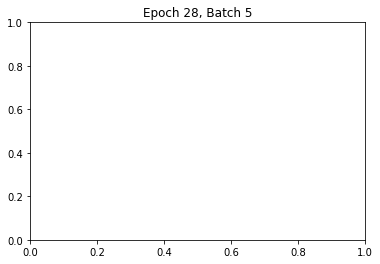

[[0.61192364 0.6086496  0.5620078  0.57882136 0.56212485 0.5308121
  0.5232866  0.53046    0.5423     0.51202095 0.5039314  0.5015038
  0.47620443 0.48951712 0.49059203 0.47803217 0.4740043  0.48757303
  0.48478505 0.4830349  0.45533103 0.44222608 0.43951505 0.4487596
  0.47831354 0.5396977  0.55807406 0.5758871  0.5652654  0.5492653
  0.55696315 0.5473957  0.56238234 0.5756156  0.56797254 0.5922736
  0.5921525  0.6092425  0.6203127  0.6165507  0.60768414 0.59193027
  0.6174357  0.63309646 0.63219047 0.6333537  0.61438525 0.59589064
  0.5862706  0.58049154 0.5922124  0.5975336  0.62074214 0.64050895
  0.63672507 0.6600865  0.68433714 0.6747016  0.67536175 0.6730857
  0.6617626  0.6455671  0.62128454 0.6150031  0.5951761  0.5922239
  0.59961504 0.61132014 0.6323583  0.6133026  0.6388953  0.640619
  0.6257824  0.63148195 0.627826   0.61851037 0.61629725 0.6073947
  0.6112302  0.62978643 0.67110556 0.6956328  0.7055807  0.7255203
  0.7031143  0.69717264 0.6985712  0.7028588  0.7224376  0.

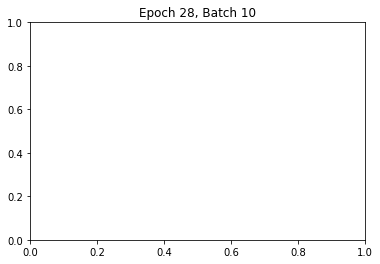

[[0.6265321  0.6234574  0.5762349  0.59328145 0.57627565 0.54431516
  0.53688556 0.5440752  0.55624074 0.52554744 0.51723    0.5144858
  0.48877975 0.5021621  0.5030683  0.49066925 0.48611397 0.5003466
  0.49731362 0.49552566 0.46743953 0.4544497  0.45157748 0.46090108
  0.49095643 0.551867   0.5698946  0.58819145 0.57818806 0.5628653
  0.56990695 0.561369   0.5756199  0.58910537 0.5807715  0.6050485
  0.60522074 0.6218712  0.63278335 0.6295857  0.6206922  0.6062412
  0.63104004 0.6457436  0.64510155 0.6458072  0.6267903  0.6093115
  0.599837   0.5940249  0.6058725  0.609976   0.6330319  0.6528485
  0.64940435 0.67264    0.69701976 0.68758965 0.6880918  0.6859623
  0.674559   0.6582702  0.6337046  0.62732434 0.6078619  0.6057138
  0.61335886 0.62403077 0.6446999  0.62568635 0.65136045 0.6530323
  0.63883144 0.64606816 0.6424388  0.6329059  0.6308591  0.6218757
  0.6255659  0.64405495 0.68554974 0.71010715 0.72026354 0.74024594
  0.71745723 0.71174616 0.7131031  0.7173807  0.7361939  0.

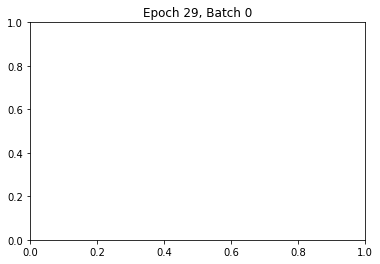

[[0.62826335 0.6250931  0.5772323  0.5944012  0.5773724  0.5450341
  0.53740525 0.5445965  0.55699027 0.5258946  0.51761    0.5150127
  0.4890947  0.5026073  0.5036189  0.49100128 0.48594964 0.50079584
  0.49763614 0.4958714  0.46728364 0.45410684 0.45112303 0.46051636
  0.49129763 0.55298537 0.5713627  0.589586   0.5795785  0.56389105
  0.57109004 0.56233895 0.5768679  0.5905495  0.58214194 0.6066046
  0.60671973 0.62346077 0.6344034  0.63120335 0.62234324 0.6077523
  0.6326364  0.6475192  0.64688057 0.6474821  0.6284124  0.61089927
  0.60127896 0.59538335 0.60736436 0.61149985 0.6346182  0.6546456
  0.6512754  0.67450404 0.69907945 0.68959016 0.69001496 0.68792003
  0.67642486 0.66008013 0.6351027  0.6286729  0.6089032  0.6066931
  0.6143456  0.62528634 0.64632857 0.62690336 0.65302455 0.65474933
  0.6405336  0.64771676 0.6441418  0.634622   0.63247347 0.6232886
  0.62706214 0.6459189  0.6878809  0.71242326 0.7227124  0.7426443
  0.7198789  0.7139947  0.71551627 0.7198105  0.7385668 

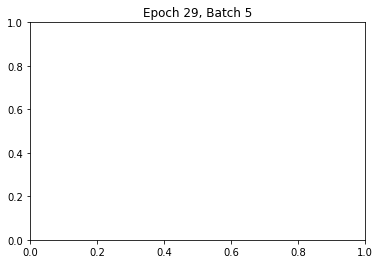

[[0.6289072  0.6257923  0.5775903  0.5949259  0.57753104 0.54521817
  0.5375755  0.5448192  0.55732226 0.5261319  0.51777965 0.51521313
  0.48918262 0.5028376  0.5061711  0.49145216 0.48804516 0.5018563
  0.49961042 0.4977324  0.46747202 0.4541468  0.4505849  0.46032006
  0.49194017 0.5567451  0.5758584  0.59374654 0.58285624 0.56605524
  0.574304   0.5640892  0.5797834  0.5933601  0.5856213  0.6105809
  0.6101152  0.62738484 0.6387345  0.63470465 0.62604904 0.609313
  0.6351997  0.6516408  0.65055925 0.65243554 0.6333238  0.61408687
  0.60405046 0.5980727  0.60997206 0.61582434 0.6394941  0.6596642
  0.655623   0.67959887 0.70435697 0.69487303 0.69522786 0.6931808
  0.68164843 0.6652512  0.64015985 0.63370246 0.6130435  0.60957366
  0.6169655  0.6293952  0.6510534  0.6315215  0.6581464  0.65987676
  0.6443592  0.6496233  0.64541173 0.6365937  0.6333922  0.62404126
  0.62787175 0.6467441  0.6886658  0.71318203 0.72419935 0.74380755
  0.72197825 0.71482474 0.7173275  0.7214606  0.741141

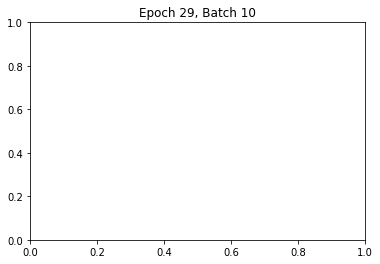

[[0.61378026 0.6106863  0.5633081  0.5802838  0.56334656 0.53151655
  0.5241358  0.5311272  0.5433366  0.51288116 0.5047933  0.50221753
  0.47680274 0.48982877 0.49308214 0.47855377 0.47553518 0.48874012
  0.48658812 0.484822   0.45527968 0.44293073 0.43939248 0.44864818
  0.47904655 0.54232633 0.56122005 0.578969   0.5680922  0.55149186
  0.55959225 0.5495637  0.5650155  0.57851243 0.5708065  0.59557337
  0.5951724  0.6121984  0.6233483  0.61934423 0.61086786 0.59424067
  0.6198587  0.63606155 0.6350017  0.6368862  0.6179128  0.59886795
  0.5888673  0.5829967  0.59477246 0.6004914  0.6239729  0.6439573
  0.639876   0.66364145 0.68812937 0.6787523  0.6790992  0.6770097
  0.6654526  0.6492514  0.6242027  0.61783516 0.59748113 0.59422415
  0.6014113  0.61355466 0.63488936 0.61555016 0.6419126  0.64361775
  0.6282697  0.6333743  0.62930393 0.62064266 0.6173573  0.6082144
  0.6119958  0.6306486  0.6722433  0.69672513 0.7076944  0.7272111
  0.70545614 0.6985506  0.70087385 0.7050141  0.7245

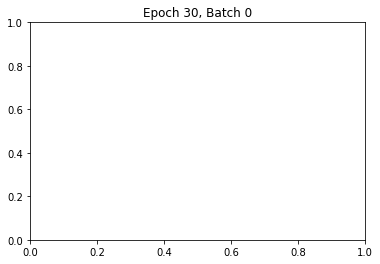

[[0.5943167  0.59157467 0.5441982  0.5601674  0.543436   0.51235175
  0.5050148  0.5119529  0.523654   0.493866   0.48602462 0.48371327
  0.45895666 0.47176865 0.47756028 0.46257842 0.4605475  0.47298902
  0.47114152 0.46948397 0.440044   0.428045   0.4245719  0.4335746
  0.46364996 0.525246   0.54385495 0.5615357  0.5506147  0.5343945
  0.54226506 0.5324554  0.5475812  0.560917   0.55327094 0.5778049
  0.57751477 0.594349   0.6053077  0.6013105  0.5929035  0.5765778
  0.6019279  0.61783695 0.6167849  0.61860013 0.59971726 0.5809127
  0.57097346 0.56522095 0.5768307  0.5824663  0.6057664  0.62553525
  0.621415   0.64501995 0.66931033 0.6599201  0.6603097  0.6581087
  0.64651465 0.6305351  0.60561347 0.59937835 0.57945335 0.5761963
  0.58333725 0.59520984 0.61610585 0.597198   0.62308526 0.62478614
  0.60971177 0.61472285 0.610765   0.60226345 0.5989626  0.58967865
  0.5926217  0.61125016 0.652634   0.6771497  0.6882758  0.7077328
  0.6859357  0.67930305 0.6814439  0.685675   0.70506215

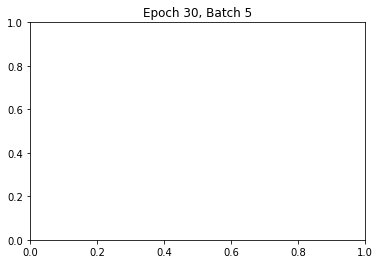

[[0.6362751  0.63329995 0.5855464  0.6022118  0.58502114 0.55293345
  0.54559404 0.5528112  0.5652637  0.5342932  0.5257861  0.52276385
  0.49690646 0.5103525  0.51292175 0.4988679  0.49531794 0.5086447
  0.5061578  0.5043354  0.47541547 0.4621824  0.4590236  0.46854895
  0.49916407 0.56314695 0.5823951  0.5999623  0.5892123  0.57232517
  0.5807655  0.5705972  0.58612764 0.59948623 0.59202904 0.6168038
  0.61644125 0.63371134 0.64499223 0.6408476  0.6320582  0.6158111
  0.6410941  0.6575745  0.6564381  0.65858686 0.639393   0.6198765
  0.6097951  0.603893   0.6157488  0.6217876  0.64542806 0.6652883
  0.66103625 0.6852578  0.71012056 0.7008741  0.70111036 0.69910705
  0.6875054  0.6712381  0.64600444 0.6394743  0.6188041  0.61544305
  0.6225533  0.63488144 0.65638155 0.6369679  0.6635152  0.6650655
  0.64926857 0.6542196  0.6505806  0.6413475  0.63894206 0.62963146
  0.6331431  0.6520632  0.6938603  0.71865094 0.7290952  0.7491303
  0.7262229  0.720403   0.72180253 0.72612894 0.7456457

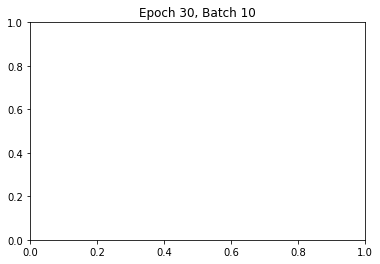

[[0.60427177 0.6012136  0.5549882  0.5713748  0.5549256  0.52412707
  0.5170367  0.5238272  0.53553504 0.5062026  0.49820203 0.49526846
  0.4708552  0.4833859  0.48575863 0.4726269  0.46861997 0.48188844
  0.47943863 0.47779033 0.44990346 0.43659058 0.43372056 0.4429114
  0.47291303 0.5326641  0.55112994 0.5685761  0.5578767  0.54166096
  0.54960155 0.5400529  0.55485946 0.56799626 0.5605708  0.58484757
  0.58463895 0.601364   0.61227113 0.6082523  0.5998118  0.5841644
  0.6086819  0.6245652  0.623485   0.62541986 0.60663545 0.58781
  0.57799476 0.5723231  0.58386093 0.5894973  0.61259633 0.6320293
  0.62789047 0.65146405 0.6756244  0.66641176 0.6667992  0.6646176
  0.6531622  0.63731825 0.61264694 0.60639715 0.5866158  0.5833342
  0.59032583 0.60216427 0.62287927 0.60415876 0.62974596 0.63134
  0.61614144 0.62149763 0.6181776  0.60900956 0.6069616  0.59811467
  0.6018319  0.62009907 0.6607312  0.68492556 0.6949038  0.714776
  0.69197124 0.686557   0.6877352  0.69210374 0.710884   0.73

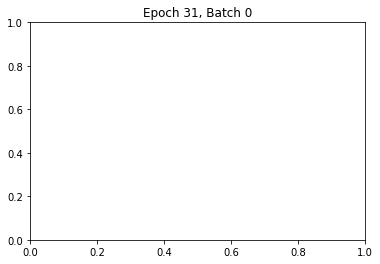

[[0.61444896 0.61142457 0.5647335  0.58131653 0.56471145 0.5335069
  0.52635115 0.5333022  0.5452386  0.51549256 0.5074193  0.5041269
  0.47958294 0.49214694 0.496101   0.48160535 0.4788168  0.4911738
  0.48944512 0.487796   0.45881703 0.4463021  0.44308728 0.4521397
  0.4818939  0.5434858  0.56223845 0.57966304 0.56890213 0.5524086
  0.56061864 0.5504677  0.56584656 0.57907295 0.571622   0.5961386
  0.59577835 0.6126404  0.6237756  0.61965185 0.61124206 0.5944711
  0.6198961  0.63623947 0.6350604  0.63726413 0.61834663 0.59914756
  0.58915603 0.5833595  0.5950194  0.60092366 0.62431824 0.6439002
  0.63971525 0.6635181  0.6877017  0.67877567 0.6789683  0.67700434
  0.6655618  0.6495818  0.6245202  0.61815476 0.59797776 0.5945921
  0.6015674  0.61367685 0.6348238  0.615749   0.6419661  0.6435828
  0.6281278  0.63269436 0.6289959  0.62017727 0.6175275  0.6086155
  0.6121788  0.6304344  0.67120206 0.6954672  0.70573235 0.7255698
  0.7035388  0.6971495  0.6989675  0.7031319  0.72268546 0.7

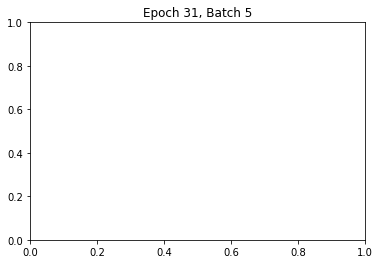

[[0.6501941  0.6477346  0.59886736 0.6158676  0.5984501  0.5662443
  0.55914956 0.56640166 0.57912576 0.54801744 0.53911406 0.5353926
  0.509679   0.5231804  0.5297281  0.5129245  0.5116191  0.5242443
  0.52272725 0.52069026 0.4892858  0.47797772 0.47413698 0.48308942
  0.5142264  0.57951045 0.59904355 0.6165965  0.6058537  0.588546
  0.5974702  0.5866429  0.6027655  0.61615354 0.60875595 0.6338554
  0.63327885 0.65078425 0.66232026 0.65800613 0.6492521  0.6318733
  0.65796024 0.6749837  0.6737122  0.6764043  0.6570005  0.63688475
  0.6266802  0.6206413  0.6326278  0.63902086 0.66293603 0.6830161
  0.6786367  0.7031701  0.7280621  0.71937037 0.71917325 0.7176458
  0.70599467 0.6895293  0.66400045 0.657299   0.6362526  0.6326005
  0.63964146 0.6523276  0.6742026  0.65462756 0.6815546  0.6830502
  0.6668097  0.67113423 0.66659135 0.6581904  0.6542957  0.64448947
  0.646914   0.6660046  0.708505   0.7339823  0.7460425  0.7658865
  0.7440191  0.7364123  0.73919445 0.74326605 0.7635505  0.7

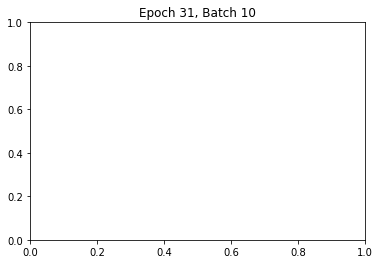

[[0.60905343 0.60659105 0.5597646  0.5760908  0.55954385 0.52862036
  0.5219902  0.5287206  0.5405835  0.5113503  0.5032364  0.4996375
  0.47540498 0.48798016 0.49427652 0.47838932 0.47689384 0.48908514
  0.4875113  0.4858215  0.45570755 0.44451967 0.44082946 0.44947007
  0.47958055 0.5408982  0.5597324  0.57685626 0.56625766 0.54961205
  0.5580028  0.547681   0.56316996 0.57629746 0.568994   0.59338605
  0.5928471  0.6096765  0.6207057  0.616516   0.60823286 0.5913539
  0.61660075 0.63294506 0.6317307  0.6343001  0.6154059  0.5961452
  0.5862024  0.580451   0.5919471  0.5979899  0.6212366  0.640749
  0.63638645 0.66021854 0.6844739  0.6756911  0.6757121  0.6738566
  0.66231555 0.6464417  0.6214436  0.6150637  0.5948425  0.5914009
  0.5982343  0.6104131  0.6314099  0.6124468  0.63854253 0.6400521
  0.6245222  0.62887573 0.6247494  0.6164782  0.61290526 0.6034946
  0.6060475  0.62454736 0.66576    0.6905085  0.7019698  0.72146165
  0.6998744  0.6928241  0.6952731  0.6993814  0.71909004 

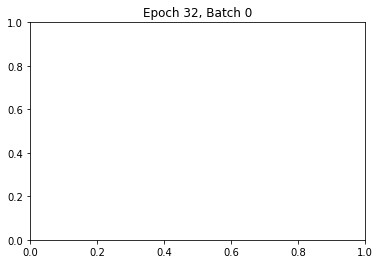

[[0.6422329  0.6393252  0.5912917  0.6079324  0.59013873 0.5581078
  0.55103916 0.55825907 0.57095337 0.53997827 0.5310878  0.5274882
  0.5019032  0.51578873 0.52111095 0.50440013 0.50287163 0.515263
  0.51391965 0.51206946 0.48094344 0.46930456 0.46551952 0.4743206
  0.50545126 0.5708023  0.59020525 0.60765135 0.5968801  0.5796624
  0.5884975  0.57768524 0.5937359  0.60708594 0.59973675 0.6247307
  0.624198   0.64159495 0.6530238  0.6486266  0.6399514  0.62253755
  0.6484907  0.6654571  0.6641746  0.6670013  0.64760655 0.6275551
  0.6173477  0.61138135 0.62323177 0.62965095 0.6535149  0.673432
  0.6689071  0.69349885 0.7186306  0.70969933 0.70959747 0.7078497
  0.6961263  0.6798384  0.6542412  0.6475968  0.6266046  0.6227589
  0.6297794  0.6425611  0.6642508  0.644801   0.6716737  0.67314523
  0.656919   0.661019   0.6566474  0.6482733  0.6443568  0.63461524
  0.63804287 0.6568288  0.6985658  0.7236306  0.7355897  0.7554682
  0.733496   0.72609144 0.72871053 0.7328372  0.7532452  0.77

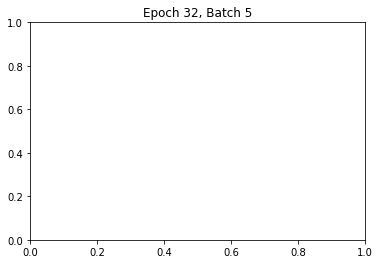

[[0.648815   0.6460016  0.5974666  0.6141795  0.5960812  0.5637853
  0.5565852  0.5638882  0.5768023  0.54584086 0.5366578  0.5328019
  0.50737584 0.521263   0.5241827  0.5097362  0.5059767  0.5196278
  0.5175806  0.51566195 0.48634738 0.4736127  0.4704278  0.4796584
  0.51025146 0.5732825  0.59243464 0.609902   0.600101   0.5838872
  0.5917287  0.5823338  0.5973374  0.6108745  0.6027647  0.62744683
  0.6275011  0.6444423  0.65548575 0.65189403 0.6429891  0.6276525
  0.6526406  0.668163   0.667309   0.6694512  0.64995205 0.630946
  0.62107325 0.61516184 0.62714124 0.63183063 0.6558541  0.6757784
  0.6712508  0.6959004  0.7212604  0.7122636  0.7121254  0.7103666
  0.6985154  0.68221235 0.65637624 0.6496959  0.6285844  0.62570775
  0.63311064 0.6447207  0.66628987 0.646763   0.6737806  0.67522764
  0.6593466  0.6652465  0.6614746  0.6524854  0.64984167 0.6403831
  0.64375377 0.66276014 0.70459473 0.7297798  0.7406449  0.76121044
  0.7379992  0.7317729  0.73346263 0.73772883 0.7573423  0.

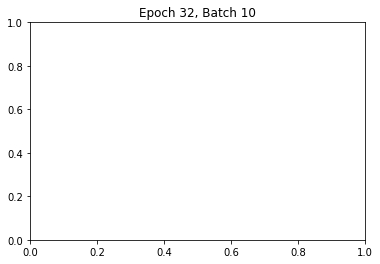

[[0.62109137 0.61827713 0.570932   0.58729494 0.56978667 0.53849185
  0.5312271  0.5383992  0.55087113 0.5209046  0.5122076  0.5084708
  0.4840275  0.49699965 0.50276816 0.48632237 0.48467505 0.49690676
  0.49564072 0.49376613 0.46326506 0.4518106  0.44809562 0.45680732
  0.487392   0.55089724 0.57002366 0.5872669  0.57654536 0.55955017
  0.5681773  0.55752873 0.573375   0.5866389  0.5793239  0.60410863
  0.6034763  0.62047076 0.6316886  0.6272491  0.619053   0.60145646
  0.62707347 0.64392114 0.64255863 0.6456575  0.6263901  0.60655594
  0.5963722  0.5905934  0.60220844 0.6084628  0.63219094 0.65192497
  0.6473137  0.6716585  0.69644886 0.687651   0.68744034 0.68571234
  0.67387986 0.65780455 0.6321448  0.6256314  0.6048406  0.60088426
  0.60783803 0.6206218  0.64191043 0.62268853 0.6492958  0.6507683
  0.6348412  0.63870513 0.63440394 0.62637424 0.6226058  0.61291814
  0.6160977  0.6347143  0.67576504 0.7006317  0.7124003  0.7321305
  0.7104013  0.703067   0.70571107 0.7098482  0.729

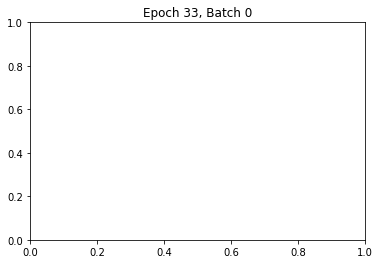

[[0.64087766 0.63850266 0.58917767 0.6052762  0.58668846 0.55442417
  0.547082   0.5543575  0.56750226 0.53666425 0.52723426 0.5237314
  0.49820173 0.51188815 0.5209425  0.5034187  0.5019645  0.5147326
  0.5132949  0.511342   0.4795021  0.46826872 0.4643431  0.47315714
  0.5047836  0.5710334  0.59062034 0.60804373 0.59726864 0.5798134
  0.58880895 0.57782173 0.59406656 0.60749054 0.60012054 0.6253742
  0.62451226 0.64186466 0.65335286 0.6487941  0.64051855 0.6224772
  0.64848304 0.66580784 0.6643998  0.6677781  0.6482667  0.6279213
  0.6175717  0.6116056  0.6233929  0.62996846 0.6540508  0.6741498
  0.66942614 0.6942594  0.7196307  0.7107811  0.7104074  0.70880646
  0.6968353  0.68050086 0.65447325 0.64778686 0.6265618  0.6225202
  0.629507   0.6424926  0.6642669  0.6447314  0.6718292  0.6732933
  0.6569706  0.6607818  0.6561802  0.64819556 0.6441913  0.63437444
  0.6367102  0.6557693  0.6979406  0.72320694 0.7354566  0.7553438
  0.73350424 0.72572017 0.7287021  0.73284554 0.7531783  0

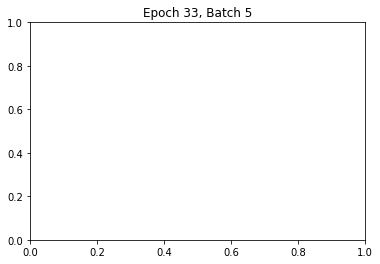

[[0.61968446 0.61687607 0.56910646 0.58584225 0.56829756 0.536788
  0.5294486  0.5365215  0.5489528  0.5186288  0.51012355 0.50676006
  0.482011   0.49491957 0.50119716 0.48427796 0.48293242 0.4949837
  0.49382946 0.49201792 0.46127063 0.45024762 0.44644016 0.45502862
  0.4855175  0.5495125  0.56879354 0.586093   0.57533234 0.55816436
  0.5669191  0.55616856 0.5721389  0.5854989  0.57808256 0.60313654
  0.6024676  0.61944544 0.6306466  0.62615454 0.61804324 0.6003402
  0.6258912  0.64290094 0.64152855 0.6446878  0.6254697  0.60548824
  0.5952201  0.5893852  0.60099214 0.60728264 0.6310998  0.6510173
  0.6462743  0.67071265 0.69572437 0.686819   0.686562   0.6848299
  0.6728955  0.6568096  0.63093185 0.62442315 0.60348773 0.59952176
  0.60642135 0.6192472  0.64060044 0.62133735 0.6480248  0.64955604
  0.63368535 0.6374451  0.6330972  0.6252351  0.621438   0.61173755
  0.6141949  0.6330457  0.6748259  0.699822   0.71164477 0.7314316
  0.70963424 0.7022679  0.7049476  0.7090776  0.7290779

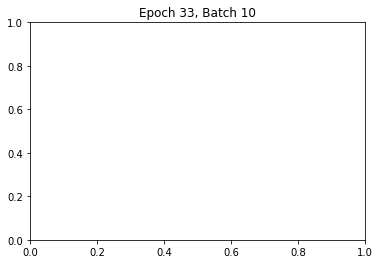

[[0.63389766 0.63103294 0.5826858  0.5996048  0.5815474  0.54943717
  0.5420692  0.5493095  0.5620418  0.5310557  0.5222002  0.5188834
  0.493364   0.50703895 0.5123308  0.49506634 0.49369305 0.5060112
  0.504762   0.50289667 0.47175968 0.46043378 0.45655453 0.4652557
  0.49622476 0.562175   0.5817561  0.5991891  0.5883516  0.570916
  0.5798607  0.56888586 0.58512574 0.5985792  0.59116495 0.6163988
  0.615753   0.6330331  0.6444234  0.6398543  0.6315542  0.61361605
  0.63950783 0.65682757 0.655416   0.6585968  0.6391159  0.6187768
  0.60841954 0.60250235 0.6142947  0.62072146 0.6448152  0.6649487
  0.6601509  0.6849741  0.7104671  0.7013931  0.70113873 0.6993722
  0.6873228  0.67103434 0.644894   0.6382725  0.6171099  0.61298263
  0.6199714  0.63291144 0.65454066 0.63510895 0.6621216  0.6636145
  0.64741886 0.6511198  0.64674723 0.63871896 0.6347708  0.6249588
  0.628253   0.64723283 0.6889528  0.7140566  0.72611624 0.7460842
  0.7240822  0.7165735  0.7193121  0.72345984 0.7437621  0.7

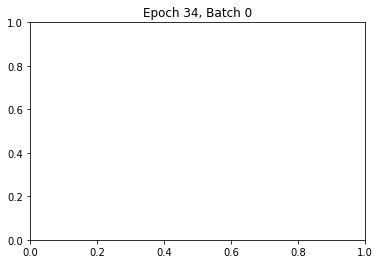

[[0.6275055  0.6246075  0.5763336  0.593302   0.57545274 0.54328144
  0.5357487  0.5430819  0.55568606 0.5244623  0.51598144 0.5128816
  0.48728734 0.5009826  0.50282675 0.4889272  0.48425528 0.49847037
  0.49584246 0.49420518 0.4654859  0.45253894 0.44941062 0.45874217
  0.48914352 0.55187607 0.571299   0.5886758  0.57859915 0.5624887
  0.57022744 0.5609803  0.57585436 0.58941746 0.5811288  0.60586125
  0.60582495 0.62242866 0.6335016  0.6296871  0.6212246  0.60592484
  0.6304828  0.6459156  0.6450253  0.6475896  0.6282821  0.6092007
  0.599371   0.59351915 0.6052613  0.60996884 0.63391745 0.6539681
  0.6491532  0.67376906 0.6990492  0.68998826 0.68973637 0.68798035
  0.6759567  0.6598275  0.63376397 0.6272357  0.60616153 0.60303545
  0.6104284  0.621953   0.643407   0.6241038  0.65096515 0.6525051
  0.63687176 0.6427867  0.6391746  0.63044316 0.62807184 0.61867195
  0.6221582  0.6410377  0.6824388  0.70695144 0.7175442  0.7378567
  0.7148518  0.7088004  0.71043724 0.7147297  0.733813

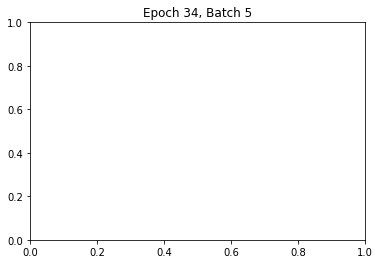

[[0.60845846 0.60610324 0.5569672  0.572801   0.55435306 0.5225616
  0.51497084 0.5221167  0.53500634 0.50454664 0.4955503  0.49296317
  0.46789724 0.48128697 0.4900681  0.47302568 0.47129926 0.4837863
  0.48241007 0.4807426  0.44988677 0.4388256  0.43509218 0.44359347
  0.4742864  0.5393755  0.5586898  0.57606834 0.5650809  0.5478574
  0.5565885  0.54578656 0.5618116  0.5752776  0.5678014  0.593031
  0.59243256 0.60947007 0.6206266  0.61599475 0.6079665  0.59002596
  0.61570865 0.6328148  0.63137275 0.6346423  0.61531067 0.5951576
  0.5847553  0.57895076 0.59055626 0.59682715 0.62088865 0.6409602
  0.63605314 0.6606689  0.68591946 0.676835   0.6766278  0.6747351
  0.66255957 0.6465004  0.620148   0.6136779  0.59261525 0.58841234
  0.5953694  0.6084179  0.62978107 0.61045665 0.6373778  0.6389181
  0.62302107 0.6265703  0.62234825 0.6145411  0.61073434 0.60091037
  0.6034418  0.6223304  0.66391486 0.68879336 0.70065755 0.720596
  0.69870996 0.69133765 0.6940332  0.6982374  0.7182775  0.

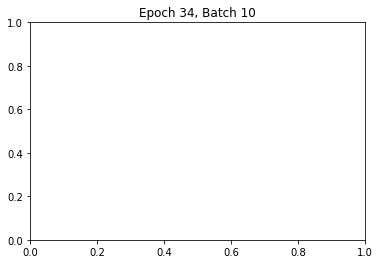

[[0.6387031  0.63646036 0.58625025 0.6024165  0.58285284 0.5491036
  0.5424832  0.5496707  0.56406575 0.53321517 0.5232781  0.5182202
  0.4929274  0.5070435  0.5185075  0.5003457  0.49855483 0.5116455
  0.510502   0.50849736 0.47583765 0.46465266 0.46067727 0.46932125
  0.50176835 0.56859785 0.5884235  0.60582274 0.5949142  0.5771615
  0.586412   0.5751262  0.59163487 0.60512143 0.5977731  0.6233376
  0.6224736  0.6398923  0.6514613  0.64664716 0.6384978  0.61986434
  0.6459811  0.66388583 0.6622993  0.6661325  0.64634526 0.6254947
  0.61494035 0.6089523  0.62074506 0.62751496 0.65198684 0.67239773
  0.6673118  0.69262004 0.7184675  0.7095978  0.709028   0.70742613
  0.69509065 0.678666   0.6519531  0.6452285  0.6237062  0.61938196
  0.62625766 0.63952744 0.66139245 0.641768   0.6692169  0.6706726
  0.65410393 0.6574412  0.65282834 0.6450771  0.6408969  0.6308887
  0.6332003  0.65238214 0.6947297  0.72018135 0.7326518  0.7527178
  0.73080087 0.7228612  0.72595704 0.7301159  0.7505089  

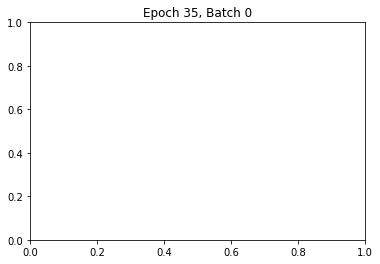

[[0.6260681  0.62384385 0.5748447  0.5905795  0.5715698  0.53841496
  0.5318541  0.53893596 0.553051   0.5226222  0.51296234 0.5081593
  0.48313713 0.49719858 0.50789756 0.49020717 0.48829672 0.5013756
  0.5001002  0.4981686  0.46603626 0.45516574 0.4512369  0.4597664
  0.49160796 0.5573367  0.57680917 0.5939881  0.58315444 0.56572247
  0.57475936 0.56369895 0.57990587 0.5932162  0.5859543  0.61113703
  0.6103238  0.62746197 0.6388264  0.6340644  0.6260653  0.60771585
  0.63342214 0.651042   0.64947665 0.6532525  0.63375705 0.6132596
  0.6028739  0.5970026  0.6086011  0.6152152  0.63932425 0.6594689
  0.6544452  0.6793767  0.7048115  0.69602144 0.6954961  0.6938803
  0.68168104 0.66552156 0.639174   0.6325718  0.61140656 0.6071429
  0.61393344 0.62704444 0.6485522  0.62922406 0.6562811  0.6577283
  0.6414245  0.6447004  0.6402102  0.63254344 0.62845045 0.6185847
  0.62087804 0.6397518  0.681456   0.7066637  0.71882665 0.7386321
  0.71692264 0.70927286 0.7121677  0.7162781  0.7364513  0

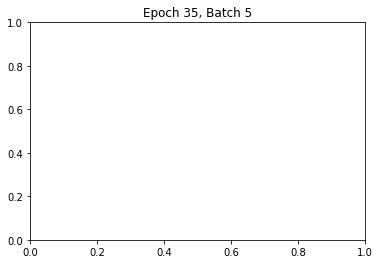

[[0.60016483 0.5977936  0.54968065 0.5651074  0.5466426  0.5142605
  0.5077848  0.5146405  0.52825606 0.49850756 0.4893442  0.48479506
  0.46079147 0.47408715 0.4836474  0.4667882  0.46533975 0.47736117
  0.4760896  0.47436646 0.44441506 0.43410766 0.43044582 0.43849367
  0.46802837 0.53172565 0.5508075  0.56788844 0.55702674 0.54011935
  0.5486297  0.5380719  0.55376655 0.5670505  0.5597139  0.5845563
  0.5840317  0.6008445  0.6118279  0.60725105 0.5992361  0.5818363
  0.60722667 0.62379533 0.62234503 0.6256329  0.6065013  0.5865547
  0.57631534 0.57062507 0.58213603 0.5882707  0.6119807  0.6318038
  0.6268855  0.65131295 0.67629236 0.66733825 0.66710204 0.66521615
  0.6531121  0.63727313 0.61122656 0.6048296  0.584076   0.5801674
  0.58716595 0.5996397  0.62057906 0.60160595 0.6281347  0.62961215
  0.61384827 0.6172729  0.6133516  0.6054192  0.6016002  0.5919229
  0.59459144 0.61334676 0.6544005  0.67916465 0.690895   0.71053904
  0.68888205 0.6816737  0.6842608  0.688488   0.7083213

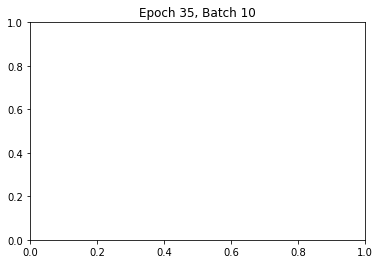

[[0.63866585 0.6362363  0.5863866  0.6022724  0.5828028  0.54914534
  0.54251546 0.5497314  0.5641166  0.5331633  0.5232531  0.5182008
  0.4929085  0.5074759  0.5180259  0.49987134 0.4980102  0.5111095
  0.5098652  0.5079763  0.47535753 0.4631097  0.4591203  0.46826088
  0.5012151  0.5679343  0.5877224  0.6054708  0.5941994  0.5766395
  0.5856693  0.57450026 0.5908802  0.6046072  0.5970386  0.6226785
  0.6222056  0.6396364  0.65112764 0.64630777 0.63804233 0.6197364
  0.64595294 0.6634934  0.66194344 0.6654545  0.6455535  0.62479615
  0.61419094 0.6082961  0.62029356 0.62669957 0.6512992  0.67170775
  0.6667093  0.6920819  0.7178713  0.70868015 0.7084998  0.7065114
  0.69416755 0.6778007  0.65107775 0.6443769  0.62291026 0.61861885
  0.6256583  0.63868815 0.66052693 0.6409637  0.6683694  0.66984135
  0.65337    0.656731   0.6524899  0.6442986  0.640368   0.6302556
  0.6329216  0.65211195 0.6945953  0.720171   0.732412   0.7525692
  0.7304217  0.7228274  0.7255962  0.7298385  0.75033927

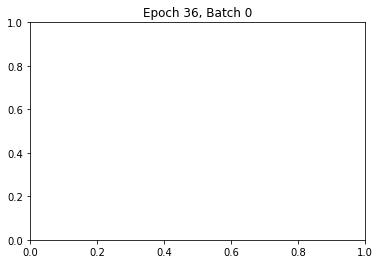

[[0.6198726  0.61702853 0.56874496 0.5853762  0.5675385  0.5357521
  0.52825755 0.53547263 0.54814404 0.5171707  0.5084923  0.50553966
  0.480149   0.49403945 0.49899077 0.4816751  0.47977796 0.4926225
  0.491013   0.4892205  0.4581074  0.44714212 0.44338942 0.45178184
  0.48286682 0.54849845 0.56800115 0.58540636 0.57434446 0.55698866
  0.5658614  0.5548875  0.5710575  0.5845209  0.57709795 0.6023469
  0.60191154 0.6190373  0.6302847  0.62555546 0.6174335  0.5994056
  0.6252151  0.64248073 0.6409477  0.6442687  0.62483627 0.6043976
  0.5939845  0.58815044 0.59990686 0.606209   0.6303392  0.65052384
  0.64554703 0.6705136  0.69608104 0.6868731  0.6866863  0.6847339
  0.6724813  0.6563499  0.6298995  0.6233444  0.6021721  0.5980292
  0.60491055 0.6178024  0.63923055 0.6199499  0.6469404  0.6484356
  0.63230723 0.6357712  0.63165176 0.6236196  0.6197117  0.6098283
  0.61246496 0.63152534 0.67312306 0.6980327  0.70986575 0.72981405
  0.70793885 0.70057505 0.70323604 0.7073485  0.7275463  

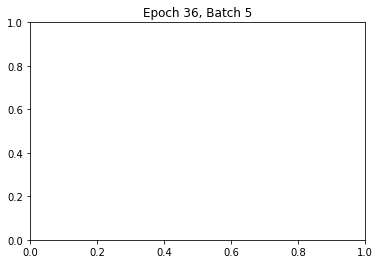

[[0.6197544  0.61702365 0.5683681  0.5852035  0.5672966  0.5354146
  0.5280803  0.5351382  0.54790264 0.5171952  0.50840235 0.5051736
  0.48002037 0.49336034 0.49896747 0.48169905 0.48019698 0.4922862
  0.49115044 0.48938838 0.45873076 0.44755614 0.44372877 0.4522203
  0.482736   0.54820335 0.56777954 0.5850382  0.57410884 0.5566108
  0.56562024 0.55456614 0.57080793 0.5842538  0.57686067 0.602245
  0.60146695 0.61861277 0.6298823  0.6250981  0.61716926 0.598786
  0.62460345 0.64208573 0.6405156  0.6442976  0.62481076 0.6042321
  0.5937725  0.58790123 0.59947664 0.6060306  0.6302457  0.65054274
  0.64538324 0.6703713  0.69592905 0.6870301  0.6865123  0.6848434
  0.6725117  0.6563509  0.6297375  0.6231644  0.6018897  0.5977255
  0.60454834 0.6175101  0.6389855  0.61967057 0.64674544 0.6482515
  0.63207    0.6354257  0.6310018  0.6233454  0.61934173 0.6094262
  0.612044   0.6308505  0.6723104  0.6969878  0.7090746  0.7286936
  0.7073302  0.6994965  0.70261335 0.7066374  0.7264894  0.7474

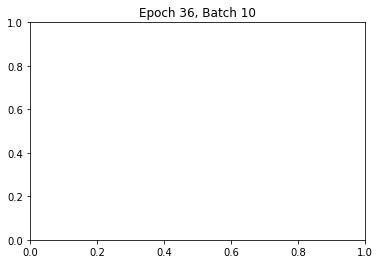

[[0.62274027 0.6201441  0.5709897  0.58809686 0.5698975  0.53758013
  0.5301623  0.5373125  0.55014896 0.5191424  0.51032484 0.50725967
  0.48175293 0.49547753 0.5029942  0.48528412 0.48334104 0.49622056
  0.49486747 0.49306366 0.46144336 0.45027292 0.44636682 0.4549535
  0.4864818  0.5527086  0.572422   0.5897418  0.5787828  0.5611908
  0.57028365 0.55913943 0.57549787 0.58896697 0.58155096 0.6070925
  0.6062926  0.6235484  0.6349024  0.63008714 0.6221175  0.60360897
  0.6295928  0.6472149  0.64564073 0.6494465  0.6298591  0.609128
  0.59860075 0.5926708  0.60430026 0.6109339  0.63531286 0.65578383
  0.6505967  0.6757401  0.7014889  0.6925263  0.6919788  0.69031537
  0.67789435 0.6616358  0.63482404 0.62822    0.60687613 0.60256076
  0.60942364 0.6225191  0.64416814 0.6247281  0.6519959  0.65354234
  0.6373034  0.64065075 0.63619226 0.6285095  0.62445736 0.61447424
  0.6167664  0.6358576  0.67764133 0.70241225 0.7146394  0.7343352
  0.71292853 0.70491153 0.7081738  0.7122221  0.732173

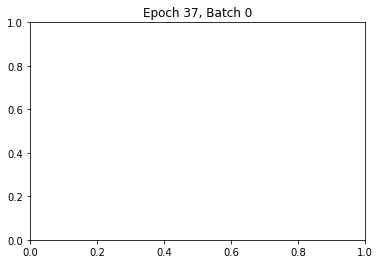

[[0.6137003  0.61104506 0.56282496 0.57982486 0.56189317 0.5299902
  0.5226834  0.5296945  0.5423684  0.5117081  0.50304395 0.5000648
  0.47483125 0.4881309  0.49435005 0.4768822  0.4753154  0.48745167
  0.4864012  0.4847076  0.4537452  0.44305307 0.43924552 0.44759354
  0.47804925 0.54299873 0.56258404 0.57979053 0.56885695 0.5513666
  0.56038946 0.5493115  0.56555796 0.5789866  0.5715856  0.5970153
  0.59617084 0.61311686 0.6244476  0.6195324  0.61191386 0.59319943
  0.61880845 0.6366017  0.6348607  0.6389949  0.61952037 0.59889215
  0.5883892  0.58252794 0.594065   0.6005984  0.62486905 0.6452545
  0.6400207  0.6650186  0.690501   0.68171906 0.68109554 0.67946225
  0.6670363  0.65090126 0.6240974  0.6175546  0.596341   0.59204966
  0.5988094  0.6118519  0.6332877  0.6139941  0.6410647  0.6426234
  0.6265046  0.62973464 0.62526673 0.6178249  0.61378187 0.6038355
  0.6066189  0.625087   0.6662207  0.6909489  0.70299965 0.7225512
  0.70130163 0.6934849  0.6965919  0.70063514 0.7204344 

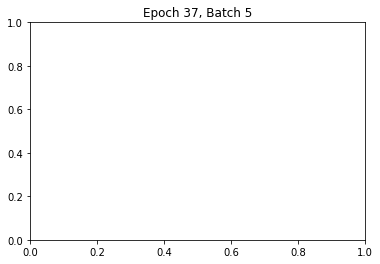

[[0.6229908  0.6202959  0.57169056 0.58882993 0.5706731  0.5384094
  0.5310746  0.5381585  0.55105966 0.52013457 0.5113144  0.5080733
  0.48259532 0.49605426 0.49875578 0.4843428  0.47923383 0.49347496
  0.4911268  0.48949283 0.46052748 0.44790772 0.4446326  0.4535739
  0.48437598 0.54710203 0.5668561  0.5840633  0.573669   0.55737907
  0.5652954  0.55595607 0.5708961  0.5844721  0.576154   0.6014186
  0.60090727 0.6175462  0.6289291  0.6244093  0.6164835  0.6004255
  0.6249204  0.641131   0.63968474 0.64361054 0.6240663  0.6040826
  0.5940741  0.5881736  0.599833   0.60499716 0.62936944 0.6498733
  0.6445865  0.66971093 0.6953202  0.68660325 0.6858742  0.68430966
  0.67181396 0.65561956 0.6286526  0.6220681  0.6006989  0.5970444
  0.6042345  0.616226   0.63778096 0.61839586 0.6456414  0.6472
  0.6309269  0.6365     0.6326789  0.6244877  0.6220542  0.6124978
  0.6157513  0.634391   0.6757973  0.7001994  0.71084076 0.7309932
  0.7083442  0.70205045 0.7039294  0.70808643 0.72686696 0.746

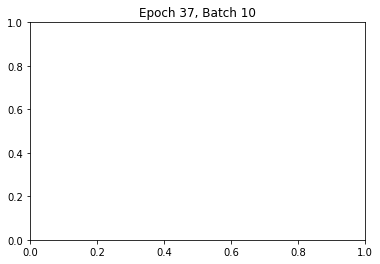

[[0.6384649  0.63575065 0.5862541  0.6035682  0.5850776  0.5522696
  0.5450016  0.5521543  0.5653304  0.53398865 0.5249054  0.52142286
  0.49559435 0.5093585  0.51248574 0.49760354 0.49212602 0.5069584
  0.5047262  0.5029864  0.47293726 0.46005732 0.45672226 0.46580032
  0.49767548 0.5611856  0.58125424 0.5986488  0.58833927 0.5717498
  0.5799303  0.5703264  0.58555615 0.5992517  0.590898   0.61630356
  0.61606824 0.63291836 0.6444329  0.6400537  0.6318258  0.61556286
  0.64048696 0.65675646 0.6555674  0.65921307 0.63934445 0.61912
  0.60894185 0.60294735 0.6148353  0.6199124  0.644688   0.6654146
  0.65997493 0.68559515 0.71191955 0.7029443  0.7021531  0.7006047
  0.6879424  0.67151856 0.6441045  0.6373689  0.6156304  0.6120909
  0.61930233 0.6312898  0.65320164 0.63352466 0.66120994 0.66273457
  0.64627266 0.65175366 0.64790034 0.63955665 0.6369821  0.6272882
  0.6306067  0.6497936  0.6918189  0.716578   0.7275039  0.74795395
  0.7250172  0.7185559  0.7205034  0.7246556  0.74386466 0

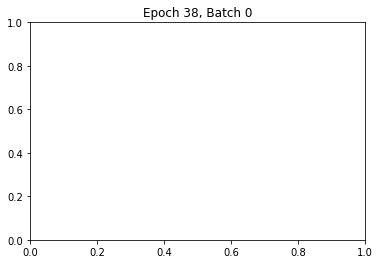

[[0.59527636 0.5924492  0.5444425  0.56120855 0.5434299  0.51175624
  0.50446874 0.51123244 0.523824   0.49385035 0.4854987  0.48241228
  0.45824742 0.47072926 0.4742545  0.45915237 0.45541948 0.46765974
  0.46622872 0.4645882  0.43674517 0.4247497  0.42162317 0.43015
  0.45914024 0.52155536 0.54095095 0.5581931  0.54707944 0.5298245
  0.5386205  0.52798337 0.5437371  0.55721956 0.5497189  0.5751461
  0.57467645 0.5915354  0.60255903 0.5976665  0.5899986  0.57234055
  0.5972664  0.61451715 0.61289424 0.6165164  0.5972073  0.5766558
  0.5660457  0.56029975 0.5718002  0.57803154 0.60234445 0.6226695
  0.61734927 0.6420929  0.66780907 0.6585961  0.6581486  0.6561962
  0.6436666  0.62773883 0.60055935 0.59412956 0.57309574 0.5686864
  0.5754886  0.58837503 0.60953087 0.5903047  0.6173099  0.6188919
  0.6029728  0.6061102  0.60283405 0.5946258  0.5923665  0.5830353
  0.58670706 0.60529375 0.6460534  0.6701511  0.68043786 0.7006976
  0.6779564  0.67207706 0.67354435 0.6778527  0.6972843  0.7

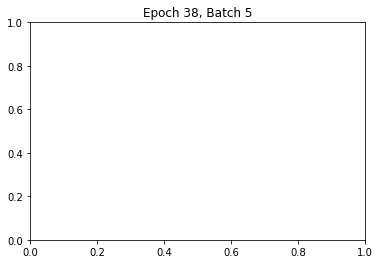

[[0.601886   0.59967345 0.5508923  0.5676974  0.54967886 0.5177159
  0.51055896 0.51737475 0.53025025 0.49993622 0.49125072 0.48813745
  0.46346068 0.47640234 0.48456708 0.4665524  0.46511734 0.47700348
  0.47628984 0.47459298 0.4434737  0.4329577  0.42896673 0.43715024
  0.4678139  0.53288716 0.55252415 0.5696576  0.5586619  0.5410162
  0.5501866  0.5389259  0.55529696 0.5687557  0.56135863 0.58694464
  0.5862356  0.6032513  0.61440986 0.6093698  0.6017609  0.58279854
  0.6085173  0.6263604  0.6246372  0.62882    0.60924417 0.5883304
  0.57766414 0.57183176 0.5832702  0.58990216 0.6143443  0.6347985
  0.6293008  0.6544904  0.6804113  0.6714558  0.67075807 0.6689885
  0.6562568  0.6401772  0.6128425  0.6062908  0.5848861  0.58017886
  0.586748   0.6002665  0.6215613  0.6022769  0.6294312  0.63095725
  0.6147236  0.6173073  0.61294013 0.6058957  0.6016689  0.59166735
  0.5938726  0.612718   0.6539648  0.67891777 0.69118935 0.71113294
  0.6895004  0.68177503 0.6847579  0.6889217  0.70901

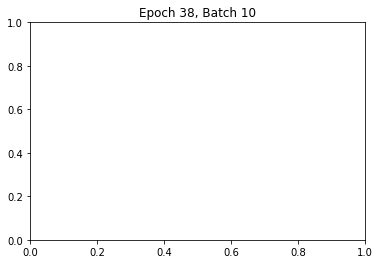

[[0.61330205 0.6111586  0.5613779  0.57833856 0.5600653  0.52774984
  0.5204953  0.527368   0.54053056 0.5097953  0.500881   0.49770322
  0.47265357 0.48583585 0.4945458  0.47598094 0.47466114 0.48672453
  0.4859317  0.48417345 0.45268032 0.4421058  0.43803245 0.446299
  0.47726098 0.54346734 0.56339777 0.58064973 0.569567   0.5516751
  0.56102985 0.5495892  0.56618094 0.5797343  0.5723173  0.59818655
  0.59748447 0.61473614 0.6260547  0.62090117 0.61318177 0.59394413
  0.6199577  0.63808095 0.6363124  0.6406277  0.62078935 0.59949464
  0.5887045  0.5828163  0.5944273  0.6011389  0.625875   0.64654917
  0.64096314 0.6665347  0.6928316  0.68380606 0.68307513 0.6813094
  0.66842777 0.652154   0.62445986 0.6177972  0.5961485  0.591326
  0.5979114  0.61161107 0.6331779  0.61367184 0.6411443  0.642653
  0.6261521  0.62868637 0.6242537  0.6171385  0.6128141  0.60269403
  0.6049231  0.6240082  0.6656496  0.6907136  0.7031836  0.7233439
  0.70163715 0.69367236 0.696845   0.70098346 0.72124094 

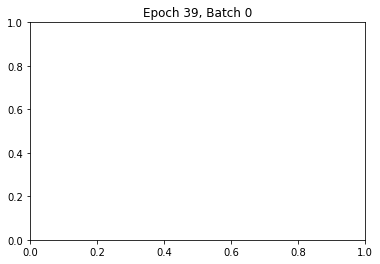

[[0.62433255 0.6216018  0.57176423 0.58904326 0.57016003 0.53733253
  0.5298699  0.5368629  0.5502652  0.51895094 0.5098804  0.506812
  0.4811708  0.49501717 0.5006579  0.4829008  0.4795875  0.49275035
  0.49172813 0.4899618  0.458358   0.44613087 0.4420825  0.4511122
  0.48316705 0.5503554  0.57047087 0.58808136 0.5767653  0.55875045
  0.56813157 0.55659723 0.5733623  0.58713615 0.57952553 0.60564303
  0.60513633 0.62255085 0.6340012  0.62882555 0.62097865 0.60172033
  0.62795293 0.64622295 0.6444529  0.64850986 0.62849665 0.6070822
  0.5961452  0.5901964  0.6021234  0.6086588  0.6336797  0.6546487
  0.64913464 0.67487836 0.7015628  0.6921216  0.6916033  0.6895902
  0.6766179  0.66019547 0.63222307 0.62549615 0.60364115 0.5987248
  0.6054338  0.6192552  0.64109695 0.6213503  0.6491519  0.65072167
  0.6341091  0.63677156 0.6324799  0.6250223  0.6209999  0.6111917
  0.6148374  0.6338941  0.6754859  0.7002618  0.7122836  0.7326379
  0.7106061  0.70264846 0.7057552  0.7099558  0.73042786 

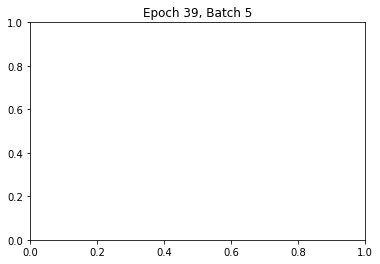

[[0.60757065 0.6048395  0.5561582  0.5732702  0.55499744 0.52271247
  0.5153319  0.522257   0.535261   0.504447   0.49562728 0.49267522
  0.4674388  0.48059553 0.4839476  0.46877968 0.46410576 0.47738233
  0.4755284  0.47405693 0.4454072  0.43302172 0.42963082 0.43836862
  0.468733   0.53269815 0.55248666 0.5697713  0.55863476 0.5410218
  0.55007255 0.53962636 0.5552225  0.5688603  0.5613276  0.5872172
  0.5863962  0.6033927  0.6147044  0.60946405 0.60214055 0.58398557
  0.6085436  0.6266697  0.6248114  0.62935513 0.60964435 0.5885087
  0.57774425 0.57186687 0.58338195 0.59000546 0.61468226 0.63540184
  0.6297937  0.65513986 0.68125916 0.6723509  0.6715064  0.66977596
  0.65686035 0.64067894 0.612922   0.6063328  0.5846849  0.5798895
  0.5865173  0.6002012  0.6216643  0.6021606  0.6296356  0.6311972
  0.61482865 0.61839235 0.61461174 0.6068711  0.60444444 0.5948228
  0.59811974 0.61678666 0.6578741  0.68216956 0.6928117  0.7131024
  0.6902508  0.6841041  0.68588066 0.69015914 0.7089836

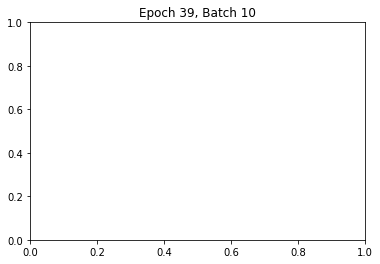

[[0.61528116 0.6127652  0.56392604 0.5811078  0.56290895 0.53063524
  0.5235697  0.53039014 0.54348797 0.5126609  0.5038049  0.50046885
  0.47529322 0.4879623  0.49167725 0.4766961  0.47206166 0.48539504
  0.48370424 0.48217717 0.45354867 0.44182286 0.4385235  0.4469438
  0.47667238 0.5383783  0.5583181  0.57556456 0.56518227 0.54870623
  0.5568028  0.5474238  0.56237984 0.57610184 0.5676288  0.5931714
  0.5927478  0.6093621  0.6207606  0.61595386 0.6083638  0.5916863
  0.6158549  0.632669   0.63112676 0.63557667 0.61571616 0.59545535
  0.585246   0.57929784 0.59090555 0.59591883 0.62073094 0.6414538
  0.63573194 0.6612933  0.68761617 0.67880857 0.67782146 0.6762022
  0.6632172  0.64697534 0.6190476  0.6123696  0.5906743  0.5872895
  0.59421146 0.60605145 0.6276074  0.60805076 0.6356381  0.63713783
  0.62105745 0.6261391  0.62221915 0.6145671  0.61203283 0.60246176
  0.6056186  0.624132   0.66510695 0.68948334 0.7003012  0.7204252
  0.6978764  0.6914584  0.6934437  0.6976071  0.7161909

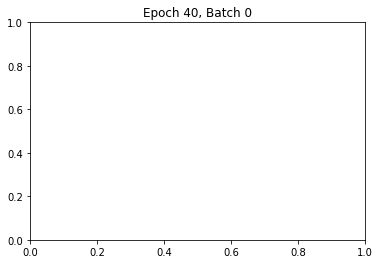

[[0.62009394 0.6175616  0.56815934 0.58563256 0.56703854 0.53422964
  0.5271063  0.53403515 0.5473772  0.51603997 0.50729525 0.5037806
  0.47813827 0.49121785 0.4951339  0.4800126  0.4744137  0.48894116
  0.4867343  0.48541573 0.45544887 0.44292554 0.43933728 0.44816795
  0.47988442 0.5429033  0.56244504 0.57968843 0.5701937  0.5534545
  0.5618529  0.55217826 0.5674227  0.581111   0.5726453  0.59820825
  0.59776366 0.614248   0.6253074  0.62121665 0.6136539  0.5968411
  0.62111545 0.6379672  0.6365878  0.6402097  0.62032634 0.60087615
  0.59065676 0.5845768  0.5961788  0.6007823  0.6253001  0.64621246
  0.6412296  0.6661466  0.6925144  0.68378127 0.68271106 0.68116784
  0.66818076 0.65187645 0.6238086  0.6171175  0.5962815  0.592659
  0.59964    0.6116965  0.63271654 0.61322117 0.64057916 0.64211124
  0.6271449  0.6322352  0.6281787  0.620576   0.61796945 0.60828817
  0.61143136 0.63005984 0.67083657 0.6951794  0.70607865 0.726143
  0.7037746  0.6970483  0.6993136  0.7034194  0.7218474

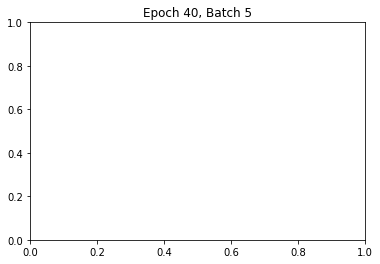

[[0.6118269  0.60910255 0.5601205  0.57774454 0.5592584  0.5266467
  0.519529   0.5263211  0.5394539  0.5082647  0.49974376 0.49652943
  0.47092834 0.48376328 0.4875253  0.47234604 0.46696034 0.4811449
  0.47887006 0.47765777 0.44816133 0.43575683 0.43213224 0.44089583
  0.47214812 0.5366753  0.5567209  0.57391936 0.5627788  0.5451078
  0.55423373 0.5438622  0.5593379  0.5729394  0.5655084  0.59164214
  0.5906063  0.6077131  0.6191835  0.61379546 0.60657734 0.58839196
  0.61247    0.63123053 0.6292085  0.6342863  0.6144611  0.5928454
  0.58217084 0.576099   0.5876331  0.59443337 0.61936253 0.64032274
  0.6345282  0.6602141  0.68654495 0.6779033  0.67673856 0.67527866
  0.66226536 0.6460028  0.6178809  0.6112348  0.58940953 0.5843386
  0.5913345  0.60479003 0.6265123  0.6068986  0.6346805  0.6362261
  0.61955225 0.62401325 0.619974   0.61247194 0.6099343  0.6003196
  0.6034816  0.6221058  0.66290915 0.68696195 0.69772035 0.71775013
  0.69523823 0.688753   0.69082874 0.6950079  0.7133159

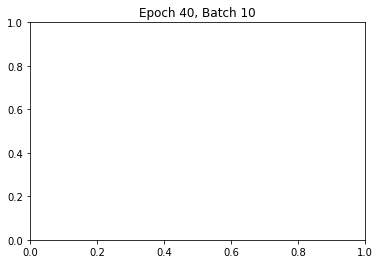

[[0.6264608  0.6238059  0.57428885 0.5920656  0.57336044 0.5404129
  0.53338766 0.54021454 0.5535823  0.52224207 0.51331586 0.5098117
  0.48390353 0.49682304 0.5013082  0.48565522 0.4801602  0.4946662
  0.4927278  0.49134576 0.46093562 0.44868466 0.44493118 0.4537603
  0.48559806 0.5489658  0.569258   0.586413   0.5760889  0.55915713
  0.5677734  0.55794096 0.57331896 0.58698094 0.5785578  0.60441285
  0.60364485 0.6205624  0.63219315 0.62720793 0.61973476 0.6026151
  0.62697625 0.6443069  0.64273506 0.64757407 0.6275201  0.6069039
  0.5966348  0.5904782  0.60208166 0.60726607 0.63242286 0.65353155
  0.6476128  0.67360556 0.70024896 0.6916349  0.69035006 0.6889563
  0.6758259  0.65942967 0.63106644 0.62430155 0.60266876 0.5989817
  0.6058608  0.61795545 0.6395069  0.61977226 0.6477814  0.6492963
  0.63362575 0.6385654  0.6343302  0.6269363  0.6242095  0.6145108
  0.6175529  0.63623667 0.67737204 0.70165265 0.7126912  0.7328301
  0.71023595 0.7035178  0.70575476 0.7098846  0.728416   0.

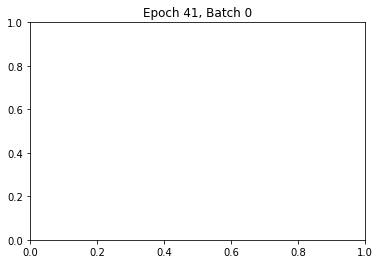

[[0.6217579  0.6191492  0.56973004 0.58738375 0.5687313  0.5359109
  0.5287249  0.53552604 0.54900277 0.51773584 0.5088079  0.50547063
  0.4796611  0.49256837 0.49709466 0.48145023 0.4759005  0.490386
  0.4884473  0.487112   0.45676982 0.44462678 0.44092643 0.4495774
  0.48139596 0.54408467 0.5633677  0.5807811  0.57144296 0.5545378
  0.5631306  0.5533359  0.5686767  0.5823062  0.5738877  0.5995196
  0.59893614 0.6153908  0.6265025  0.62233096 0.6149644  0.5978011
  0.62206626 0.6391995  0.63773525 0.6403426  0.6214059  0.6020559
  0.5917747  0.5857105  0.5972323  0.6019044  0.6257087  0.6469831
  0.64249307 0.6661243  0.6927233  0.6841098  0.68280864 0.68140584
  0.6682577  0.65196913 0.62429845 0.6179684  0.5975525  0.5938426
  0.60060275 0.6127386  0.63385963 0.6143944  0.6401498  0.64231724
  0.62837565 0.6332249  0.62899685 0.62175226 0.6190089  0.6093304
  0.6123537  0.63097    0.6721436  0.6962836  0.7073004  0.727502
  0.70490795 0.6981636  0.7004558  0.70452654 0.7230418  0.74

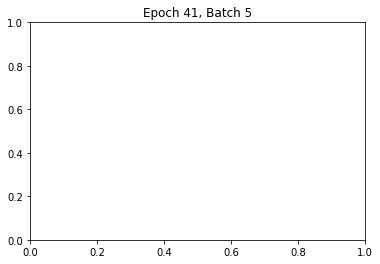

[[0.60817194 0.60550565 0.5558462  0.5734676  0.5546429  0.5219811
  0.5145661  0.52137196 0.5347423  0.503703   0.49486226 0.49196434
  0.4664927  0.47950506 0.4832698  0.46792197 0.46220168 0.47651386
  0.47459188 0.4732253  0.44369394 0.43207687 0.4285743  0.43678325
  0.46774784 0.53123236 0.5513439  0.568518   0.557261   0.54053324
  0.5489056  0.5392986  0.5544621  0.5681875  0.5599272  0.5862399
  0.5853814  0.6025096  0.61386263 0.6083281  0.6011465  0.5839008
  0.6080443  0.6257051  0.62364644 0.6287389  0.60880876 0.58763653
  0.5772892  0.5712799  0.5828501  0.5884346  0.6135406  0.6345738
  0.62851506 0.6543584  0.6810945  0.672257   0.67107624 0.6694865
  0.65623355 0.6400057  0.61141104 0.6047506  0.582677   0.57843703
  0.5852694  0.59800214 0.6196435  0.600012   0.62794185 0.62946093
  0.61307347 0.61802006 0.61411184 0.60675645 0.60419345 0.5945085
  0.59779525 0.6165129  0.6577284  0.6819044  0.6927428  0.7131882
  0.6902867  0.6838583  0.6858844  0.6900805  0.7085960

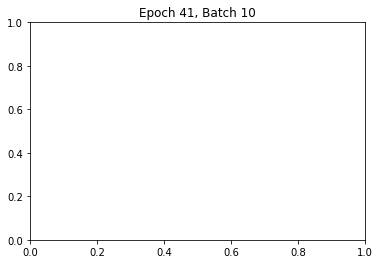

[[0.62810904 0.6256097  0.5747698  0.59258896 0.57326114 0.54007804
  0.5328445  0.5396865  0.5534127  0.5220302  0.51279676 0.5093772
  0.4835407  0.49662492 0.5015865  0.48543912 0.4797616  0.49423385
  0.4925996  0.49114165 0.46059543 0.44773602 0.44407627 0.4528405
  0.48534125 0.5489232  0.56942797 0.5865945  0.57650286 0.5593863
  0.5681308  0.55817336 0.57370216 0.587457   0.57896286 0.6048643
  0.6044847  0.6211342  0.63271296 0.6279585  0.620475   0.60313463
  0.6276842  0.64492744 0.6434545  0.64794457 0.62769514 0.60711974
  0.59666616 0.59054404 0.6022578  0.6070005  0.6324397  0.653712
  0.6478303  0.67386675 0.7010856  0.6922607  0.6909142  0.6894328
  0.6760258  0.6595531  0.6305946  0.6237703  0.60214764 0.5982413
  0.6050107  0.6173268  0.6386948  0.6189277  0.64713293 0.6486153
  0.63299364 0.63767457 0.63355684 0.6262613  0.6234969  0.61366606
  0.61683065 0.6358155  0.6773557  0.70181304 0.71298164 0.7336338
  0.7107981  0.7038683  0.7062885  0.7104022  0.7290617  0

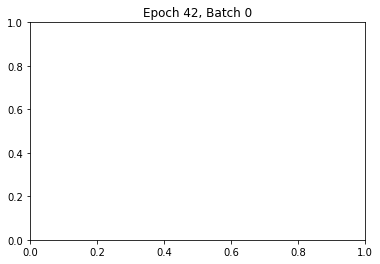

[[0.62018824 0.61766446 0.56713283 0.58498764 0.56596684 0.5329771
  0.525821   0.53253    0.54617155 0.51485175 0.5057528  0.5024589
  0.47669324 0.48950556 0.49417973 0.47819966 0.47248745 0.48687544
  0.4852305  0.48381332 0.45353276 0.44159198 0.43793833 0.44644126
  0.47807714 0.54161525 0.56206334 0.57912576 0.5685863  0.5515232
  0.5602319  0.55036116 0.5657829  0.57950795 0.5710082  0.5972645
  0.5964116  0.6135266  0.62501013 0.6196659  0.61234957 0.59499454
  0.6194937  0.63684297 0.63508874 0.6403011  0.62009466 0.5990454
  0.5885963  0.5824938  0.59404886 0.59933484 0.6247391  0.6459585
  0.63969433 0.6659516  0.693064   0.6843784  0.6829119  0.6814989
  0.668036   0.65163946 0.62262225 0.61582977 0.5936574  0.58971995
  0.59643245 0.6087787  0.63054156 0.6107703  0.63895345 0.640429
  0.6243844  0.6290259  0.62479335 0.6178076  0.61508733 0.6053015
  0.6083346  0.62729704 0.6686952  0.6930014  0.7040547  0.72469807
  0.70190567 0.69505364 0.69743085 0.7015126  0.72003603 0

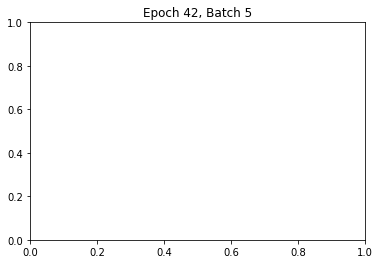

[[0.62027955 0.61765015 0.56734395 0.58532107 0.56623787 0.5332623
  0.5260941  0.53282994 0.5463361  0.5149935  0.50599813 0.5027306
  0.47690424 0.48947868 0.49403474 0.47802958 0.47220665 0.48665825
  0.48495975 0.4836095  0.45337263 0.44096115 0.43724266 0.4459584
  0.4778311  0.5414933  0.56198806 0.57909083 0.5685027  0.5514272
  0.5601455  0.55028844 0.5657095  0.5794842  0.5709158  0.59728813
  0.59639955 0.6136013  0.6251156  0.6197053  0.6123943  0.5950788
  0.61956203 0.63700855 0.63518363 0.6404127  0.6202073  0.59911275
  0.58865297 0.58252233 0.5940698  0.599342   0.62480503 0.646129
  0.6398335  0.66613615 0.6934172  0.68460596 0.68318546 0.6817264
  0.668232   0.65181035 0.6227143  0.61593276 0.59380305 0.5898684
  0.59658384 0.6088942  0.6306753  0.6109214  0.63912475 0.6406342
  0.6246868  0.6294364  0.62525666 0.6182029  0.61552584 0.60574657
  0.60883087 0.62780064 0.6693604  0.6936629  0.7046826  0.72531486
  0.70230013 0.6956478  0.6978299  0.70197076 0.72058225 0

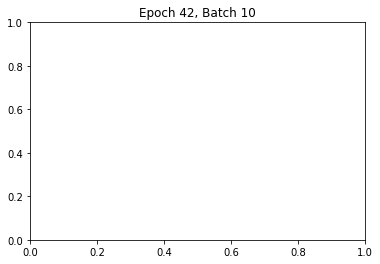

[[0.6237453  0.6212299  0.57061064 0.58859247 0.56928945 0.53617364
  0.5290977  0.535831   0.5495115  0.51814574 0.50898695 0.50554967
  0.47971413 0.49230662 0.49749306 0.48116422 0.4753506  0.48981008
  0.48820034 0.4868496  0.45636606 0.4438549  0.4401479  0.4487021
  0.48097056 0.54432225 0.56401914 0.5812801  0.572025   0.5548334
  0.56366616 0.553715   0.5692202  0.5829825  0.57445127 0.6005079
  0.5999145  0.61653966 0.62760925 0.62327003 0.6159934  0.5985067
  0.62305075 0.64025116 0.63876235 0.64258295 0.6223939  0.6026209
  0.5921245  0.5859797  0.5975232  0.60215795 0.6268754  0.64827627
  0.6432264  0.6683221  0.695686   0.6869484  0.68541574 0.68402886
  0.670472   0.6540225  0.62479067 0.61798865 0.59725845 0.5932316
  0.5999162  0.6123235  0.6335356  0.6138939  0.6411763  0.6426566
  0.6280607  0.63265806 0.6283844  0.6214441  0.618706   0.60887784
  0.6118917  0.6309029  0.67246115 0.6967548  0.70794594 0.72851086
  0.70567524 0.6987784  0.7011837  0.70519423 0.723825 

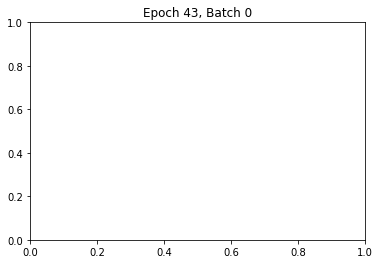

[[0.62270445 0.62019926 0.569754   0.58776885 0.56841743 0.5352516
  0.52823114 0.5348958  0.5487626  0.51738334 0.5081767  0.50459385
  0.47874194 0.49137548 0.4974845  0.48018873 0.47517434 0.48889002
  0.4875243  0.48614088 0.45526615 0.44283697 0.43898237 0.44757664
  0.48007762 0.5464762  0.5672111  0.58415717 0.572977   0.5541192
  0.56438196 0.55279994 0.5693826  0.58304226 0.5757859  0.6025263
  0.6012552  0.61870444 0.6303621  0.6244234  0.6174787  0.5973067
  0.62262607 0.64219165 0.6399428  0.64613146 0.6257075  0.6028966
  0.5915805  0.58550906 0.5970639  0.6045326  0.6302225  0.6516771
  0.64518356 0.67185944 0.6993154  0.6908044  0.68906367 0.687822
  0.67412966 0.6576299  0.6281468  0.6212702  0.598679   0.5929116
  0.5990936  0.6138489  0.6358652  0.61599547 0.6445029  0.6459388
  0.6284816  0.6314776  0.6270557  0.6203362  0.61747146 0.6076385
  0.61054045 0.6294661  0.6710638  0.6953552  0.706604   0.7270443
  0.704276   0.69734144 0.6997795  0.7038517  0.72258997 0.7

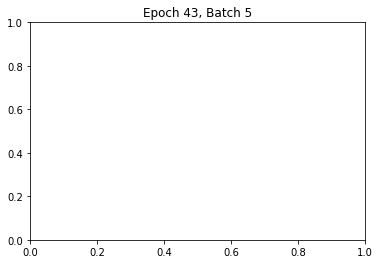

[[0.623783   0.621381   0.5703065  0.5882414  0.5688379  0.5356457
  0.5285766  0.5352484  0.5492301  0.51779985 0.5084472  0.5048865
  0.47901502 0.49178857 0.49725085 0.4805234  0.4749353  0.48919636
  0.4878303  0.48648867 0.4556416  0.44333696 0.43956065 0.44794872
  0.48039633 0.54387736 0.5639789  0.5810014  0.57164335 0.5543041
  0.5633199  0.55318433 0.5688218  0.5825783  0.5740819  0.6002301
  0.5996963  0.6163038  0.62740964 0.6229136  0.61572856 0.597926
  0.6224931  0.6399209  0.63834554 0.64279675 0.6223405  0.60210943
  0.5915024  0.5853343  0.59694713 0.60169333 0.626786   0.64824146
  0.642766   0.6683762  0.69603086 0.68739843 0.68567634 0.6843525
  0.6705705  0.65411264 0.62443364 0.6175454  0.59651273 0.5923237
  0.5988779  0.6114433  0.63266295 0.6130052  0.6406406  0.64203286
  0.62705004 0.6313282  0.6270156  0.620271   0.6174002  0.6075256
  0.610533   0.62946963 0.67108583 0.6954348  0.70680124 0.72727424
  0.70458007 0.69753575 0.70005643 0.7040589  0.7226245  

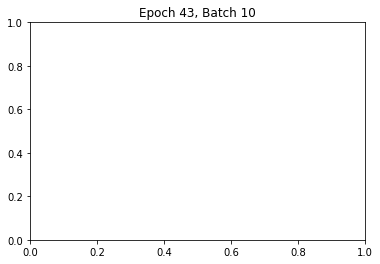

[[0.6242063  0.6217711  0.5707506  0.588773   0.56924725 0.5359224
  0.5288611  0.5354818  0.5495223  0.51808184 0.50873935 0.5051734
  0.479299   0.49201977 0.49785572 0.48100367 0.4754119  0.48966184
  0.48826134 0.48698395 0.45603153 0.4432588  0.43932623 0.4482063
  0.48084217 0.5445044  0.5642825  0.5816054  0.5723145  0.5549311
  0.56399107 0.5538344  0.5694958  0.58324516 0.5747511  0.6009858
  0.60038215 0.6170061  0.6281427  0.62362313 0.6164812  0.59860533
  0.6231946  0.64069825 0.63910013 0.6431851  0.6230372  0.60287607
  0.5922578  0.5860722  0.5976387  0.60245043 0.6271332  0.6486587
  0.64362097 0.668807   0.69647485 0.6879207  0.68611085 0.68485916
  0.67103523 0.6545714  0.62482655 0.61824214 0.5973387  0.59310895
  0.5996625  0.61226463 0.6335491  0.61384743 0.6410985  0.6424878
  0.6279826  0.6322677  0.62791526 0.6211962  0.61832225 0.60843474
  0.6113936  0.63035583 0.67192775 0.69625896 0.70762336 0.72812724
  0.70549226 0.698305   0.7009655  0.70491016 0.7234556

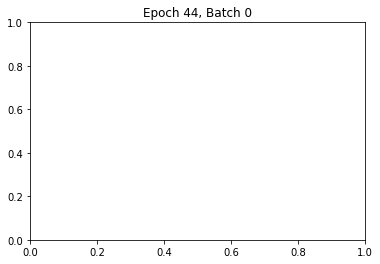

[[0.62535554 0.623004   0.57187754 0.5898494  0.57011616 0.53669935
  0.5298512  0.53642225 0.5506308  0.51921725 0.509768   0.5059699
  0.48014942 0.49264634 0.4994863  0.48219013 0.47681022 0.4909129
  0.48972303 0.48838732 0.45720658 0.44469294 0.44072163 0.4494849
  0.482091   0.54599494 0.5658672  0.5830419  0.5737872  0.5562606
  0.5654974  0.5551452  0.5709413  0.5846843  0.5762621  0.6025726
  0.6017606  0.6183613  0.62961006 0.62491226 0.6180038  0.5996422
  0.624313   0.6420839  0.6403494  0.64495087 0.6247376  0.60427016
  0.5935847  0.58738315 0.5988991  0.6039552  0.6286786  0.6502588
  0.6451267  0.6704832  0.69826674 0.68996364 0.68790585 0.68681335
  0.6728295  0.65634274 0.62631196 0.6197698  0.59877414 0.5944421
  0.6009364  0.61360407 0.6349313  0.6152508  0.64253664 0.6438659
  0.62927663 0.6332629  0.6287203  0.6222502  0.6192578  0.6092992
  0.6120118  0.63089055 0.6724075  0.6967727  0.708295   0.7288635
  0.7062527  0.69897217 0.70168865 0.70561564 0.7243023  0.

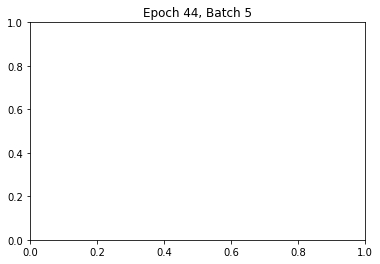

[[0.6182652  0.6160445  0.5654418  0.5833895  0.5640434  0.5308906
  0.52423793 0.5306528  0.5446627  0.5136478  0.50434524 0.50039643
  0.47513473 0.48686767 0.49395174 0.47668478 0.4715839  0.48531693
  0.48423368 0.48294637 0.4525615  0.44148922 0.43772876 0.44565028
  0.47659183 0.5396082  0.55934054 0.5762709  0.56714255 0.54967684
  0.55896956 0.548606   0.56433076 0.577908   0.5695997  0.59570354
  0.59480995 0.61122936 0.62240386 0.6177197  0.61096334 0.5925665
  0.61676073 0.63476515 0.6329108  0.6360107  0.61774325 0.59736294
  0.58674043 0.5805747  0.59194213 0.5970425  0.6212683  0.6429624
  0.6377992  0.66117805 0.6871014  0.6787951  0.6771267  0.6756157
  0.6630893  0.6464107  0.6192443  0.61276144 0.5918982  0.58765787
  0.5939582  0.60649395 0.6276367  0.608144   0.63390845 0.6363259
  0.62205094 0.62581253 0.6212062  0.6149952  0.61196584 0.6021144
  0.6047111  0.62324744 0.66416323 0.68822986 0.6996866  0.7199046
  0.6977282  0.6903607  0.69320434 0.6970561  0.7152840

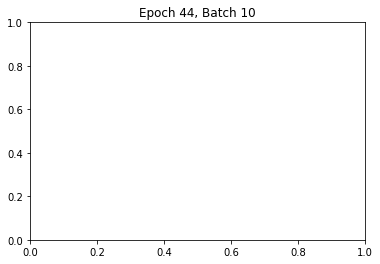

[[0.6472904  0.6449321  0.5931282  0.6115272  0.59147114 0.55752385
  0.5507294  0.5573812  0.5718335  0.53986454 0.53016645 0.52599573
  0.49957165 0.5119574  0.5198304  0.5017766  0.49678725 0.5108207
  0.509746   0.5084197  0.4763954  0.46377385 0.4596157  0.4685601
  0.5017571  0.5666966  0.58697    0.6041155  0.5949809  0.57700664
  0.58670515 0.57600075 0.59215385 0.6058509  0.5975367  0.6241506
  0.6231272  0.6400727  0.6515989  0.6468416  0.63975626 0.62100524
  0.6460375  0.66438705 0.6625548  0.665646   0.64702773 0.62603545
  0.61523104 0.6088456  0.6204442  0.62586516 0.65063465 0.67284834
  0.66760075 0.6916031  0.71819097 0.70842546 0.70797104 0.70614296
  0.6939529  0.6768711  0.64928395 0.6425885  0.62126726 0.616871
  0.6232849  0.6360437  0.6578844  0.6379568  0.6643846  0.66681284
  0.65212685 0.65596944 0.6511058  0.6446932  0.64143986 0.6314135
  0.6339915  0.6531836  0.6952211  0.719787   0.7316188  0.75231636
  0.7295347  0.7219328  0.7248749  0.72874707 0.747592

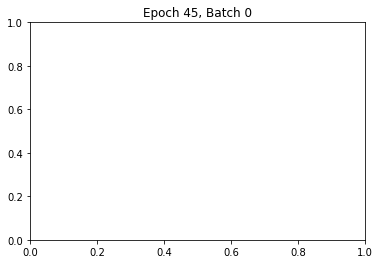

[[0.6370116  0.6345105  0.58185995 0.6003183  0.5800123  0.54592603
  0.5389719  0.54553044 0.5599276  0.52796066 0.5184324  0.5147904
  0.48830485 0.501253   0.5078463  0.4898531  0.484471   0.49861583
  0.49748498 0.49631754 0.46451634 0.45178837 0.44771138 0.45651382
  0.48970133 0.5545483  0.5752735  0.592623   0.58278805 0.56511694
  0.5744499  0.5638747  0.57993364 0.59409845 0.58526254 0.6121621
  0.61165357 0.6285776  0.6399398  0.6352165  0.6280592  0.6096181
  0.63452464 0.65268886 0.6509466  0.65571463 0.63463616 0.61390656
  0.6029445  0.59669507 0.6085534  0.6133476  0.6390071  0.6609593
  0.65553856 0.68167555 0.7102738  0.70136464 0.69954646 0.6980685
  0.68375945 0.6671015  0.6364289  0.6295483  0.60817087 0.60368866
  0.6101514  0.6230097  0.6447183  0.62476486 0.6526525  0.6539542
  0.63916963 0.64322454 0.6389266  0.6320858  0.6292521  0.61903167
  0.62216103 0.641567   0.68365663 0.7082677  0.71988976 0.74087703
  0.7177043  0.7104372  0.7130896  0.717134   0.736061

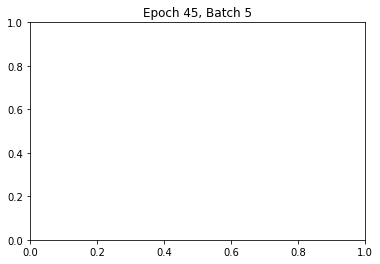

[[0.604227   0.6018791  0.5505005  0.5684239  0.548836   0.51598036
  0.50927347 0.5155028  0.52934474 0.49866083 0.48974404 0.4861358
  0.4613631  0.47246155 0.47998378 0.46154314 0.4578705  0.46966204
  0.46963254 0.467999   0.43836638 0.42766452 0.4238409  0.43157634
  0.46128187 0.52780706 0.5486539  0.5653894  0.55386966 0.5347536
  0.54530674 0.5326371  0.5501267  0.56382924 0.5566409  0.5837323
  0.5824912  0.59995896 0.61147916 0.60502785 0.5984545  0.57680386
  0.60271925 0.62273353 0.6202135  0.6273817  0.6066613  0.5831042
  0.57143104 0.5654538  0.57685846 0.5846794  0.6107513  0.6322735
  0.6251265  0.6523201  0.68041223 0.67202795 0.6698245  0.6686761
  0.65435755 0.6380517  0.6074061  0.60050124 0.57746714 0.57122475
  0.5771039  0.59232926 0.61415917 0.5943102  0.62325567 0.62450224
  0.6066032  0.6083757  0.60398364 0.5979354  0.5950366  0.5851381
  0.58793217 0.60682213 0.6479086  0.6720831  0.68325526 0.7040664
  0.681088   0.6743112  0.6766098  0.6807521  0.69986206

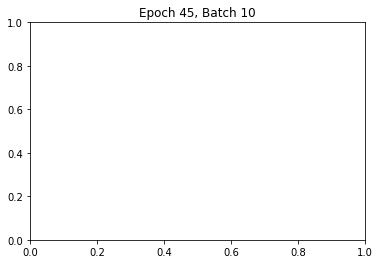

[[0.63313603 0.63083005 0.5789758  0.59718615 0.57701516 0.54327005
  0.5363852  0.54297245 0.5575302  0.52597475 0.5161358  0.5119668
  0.4860714  0.49846056 0.50549495 0.48753214 0.48225656 0.49610135
  0.4953328  0.49395838 0.4624659  0.4502349  0.4461309  0.45480672
  0.4873666  0.5519546  0.5729159  0.5896673  0.5802107  0.56225395
  0.5718668  0.5612006  0.57732606 0.5911077  0.5826924  0.6093673
  0.60841656 0.6252067  0.63654387 0.63163733 0.62485653 0.60595894
  0.63084924 0.6490082  0.6471647  0.65291697 0.63187623 0.6107068
  0.59975106 0.5934621  0.6050394  0.6102175  0.6360565  0.657853
  0.651924   0.67830455 0.70678616 0.6985498  0.69614804 0.6951745
  0.68078905 0.6641997  0.6333158  0.6262126  0.60460454 0.59997535
  0.6063687  0.61931205 0.6408373  0.62091947 0.6492595  0.6504605
  0.6349909  0.63855165 0.6338092  0.6277174  0.6245875  0.61449516
  0.61708635 0.6363343  0.6781326  0.70293665 0.7145817  0.735771
  0.71235275 0.7053268  0.70772153 0.71192896 0.73104155 

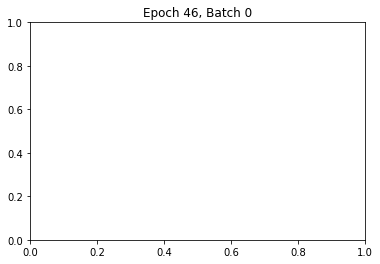

[[0.63167834 0.6293125  0.57769585 0.5955397  0.5757648  0.54219234
  0.53516126 0.54190665 0.5562837  0.5246844  0.5148609  0.5108144
  0.4849717  0.49758804 0.50350195 0.4859026  0.4802845  0.49433476
  0.4934533  0.49204832 0.4607654  0.44817045 0.44418976 0.4529305
  0.48565483 0.549983   0.5701089  0.58728814 0.57816344 0.5604475
  0.56983924 0.5593963  0.5753102  0.5891036  0.58063304 0.6072848
  0.6064522  0.6232829  0.63453317 0.6297426  0.6227988  0.6046986
  0.62954724 0.646999   0.6452297  0.64820254 0.6294783  0.60869896
  0.59780824 0.5915303  0.60319674 0.6081431  0.6329584  0.65514195
  0.6497749  0.6736319  0.70031047 0.69030833 0.69000816 0.6878158
  0.6753631  0.6583307  0.63041097 0.6237956  0.6024467  0.597955
  0.60480714 0.6172106  0.63867366 0.6187622  0.6450218  0.6474353
  0.63293207 0.6367605  0.63248515 0.62582886 0.62284124 0.6127509
  0.6158628  0.6352272  0.6770907  0.701994   0.71354854 0.7345733
  0.7112181  0.704339   0.70661473 0.71088254 0.7299139  0.

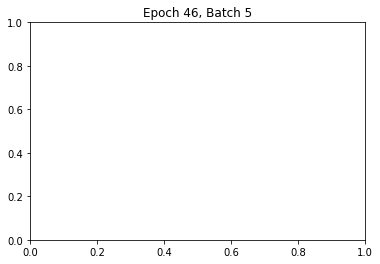

[[0.59898657 0.59672445 0.5461946  0.5637435  0.54439706 0.51162046
  0.50457746 0.5110567  0.52500886 0.49406463 0.48488224 0.48155874
  0.4564301  0.46843225 0.4737322  0.4568736  0.45112216 0.46479014
  0.46372625 0.4625765  0.43266588 0.4212182  0.41745937 0.4253689
  0.45645398 0.51954424 0.54014987 0.5568402  0.54623646 0.5289499
  0.5379945  0.5279512  0.5434002  0.55711645 0.5485588  0.5749951
  0.57416016 0.590914   0.60230356 0.5966266  0.5900858  0.5720956
  0.5962371  0.61352503 0.61170274 0.61815286 0.5976171  0.5760973
  0.56531173 0.5591706  0.5705126  0.57580143 0.601656   0.623109
  0.616177   0.6429248  0.67070854 0.662407   0.66025573 0.6590058
  0.64473677 0.6285489  0.5980677  0.59125006 0.5689693  0.56468034
  0.5712143  0.5834517  0.6047488  0.58505803 0.6137741  0.6150299
  0.59911805 0.60298425 0.5987665  0.59255695 0.5898645  0.580056
  0.58300763 0.6016386  0.6425402  0.66662496 0.67771256 0.6986783
  0.6754659  0.6688656  0.67104286 0.6751881  0.6938576  0.7

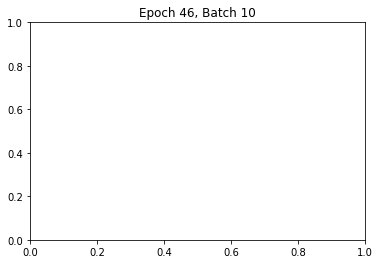

[[0.5979248  0.59567547 0.54507864 0.5628145  0.54343295 0.5105225
  0.50363165 0.5100177  0.5240072  0.4930337  0.48395392 0.48052138
  0.45533103 0.46728835 0.47321656 0.45625505 0.4505435  0.46415702
  0.46310398 0.46204764 0.431928   0.420064   0.41614065 0.42425513
  0.4558256  0.51965964 0.5402983  0.5569548  0.5457873  0.5284579
  0.53760463 0.5274255  0.54298115 0.55666274 0.5482427  0.5751292
  0.5737563  0.59093624 0.60236764 0.5961096  0.5896913  0.5713617
  0.5954892  0.6136961  0.6113124  0.6183537  0.5978813  0.5757925
  0.56505907 0.55886245 0.5701356  0.5761027  0.6018968  0.6234429
  0.6163466  0.6432508  0.67108786 0.66280717 0.66059065 0.65939885
  0.6451403  0.6289538  0.5985881  0.59175813 0.5687907  0.56438863
  0.57067305 0.583581   0.6052296  0.58554965 0.6143187  0.6155995
  0.59909624 0.6029339  0.59854215 0.5924748  0.5897604  0.5798593
  0.58267    0.60127693 0.64224243 0.6662283  0.6773206  0.69816744
  0.6751027  0.6683388  0.6706844  0.6747829  0.6933752 

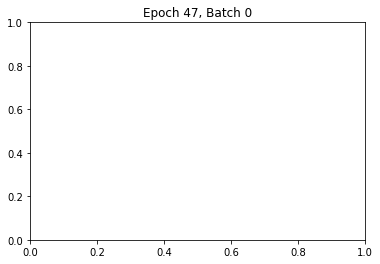

[[0.6020108  0.5996398  0.5492125  0.5671993  0.54792804 0.51505893
  0.5082894  0.51461196 0.5284526  0.49751335 0.48856294 0.48508078
  0.4597041  0.47153813 0.4771534  0.46018103 0.45455593 0.46810773
  0.46699718 0.46603686 0.435812   0.4239381  0.41998816 0.4281344
  0.45968133 0.5224652  0.54316765 0.5596903  0.5494884  0.5320985
  0.5413516  0.5311493  0.54673076 0.5602662  0.5517992  0.5779738
  0.5770867  0.5936189  0.60507274 0.59969455 0.59322137 0.5752701
  0.5994081  0.6167341  0.61502236 0.62119156 0.60081345 0.5795549
  0.568893   0.56266356 0.57386225 0.5790299  0.6047709  0.6263771
  0.61982995 0.64618087 0.67398053 0.6657856  0.66347325 0.6624076
  0.64824486 0.63207906 0.60181576 0.5949996  0.57316905 0.56890935
  0.57546693 0.5875096  0.6084885  0.58907104 0.61760646 0.6189225
  0.60352945 0.607415   0.6030783  0.5968669  0.5941357  0.5842951
  0.5872392  0.6060696  0.6470442  0.670806   0.6819366  0.7024968
  0.67974013 0.67281914 0.6753221  0.6793366  0.6976463  0

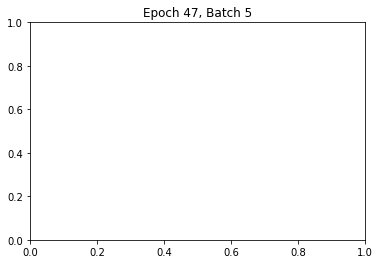

[[0.62239146 0.619938   0.56865406 0.5868438  0.56733656 0.53407794
  0.5271586  0.53364164 0.54770803 0.5163585  0.50699025 0.50330454
  0.47744435 0.48965785 0.4951073  0.47767213 0.47189105 0.48584205
  0.48482433 0.48371857 0.45274875 0.44033843 0.4363456  0.44515392
  0.4772671  0.5419612  0.5629482  0.57962084 0.568517   0.5512129
  0.5602902  0.550266   0.5657508  0.579397   0.5710652  0.5981901
  0.59682167 0.61439884 0.6260603  0.61997235 0.61298186 0.59535515
  0.61983114 0.637723   0.63532704 0.6422571  0.62161213 0.59900343
  0.5882194  0.5819295  0.5936904  0.5995176  0.6256244  0.64752626
  0.6403329  0.6676896  0.6961034  0.68771636 0.6853492  0.68436074
  0.67010707 0.6536783  0.623078   0.6161052  0.5930091  0.5888828
  0.5956162  0.60780436 0.6297924  0.6099068  0.6390939  0.6404018
  0.62366664 0.6277745  0.6237392  0.6168073  0.61408836 0.60424334
  0.60752755 0.62674904 0.66841817 0.69253886 0.7039505  0.72447497
  0.7017591  0.6945675  0.69724685 0.7012422  0.7195

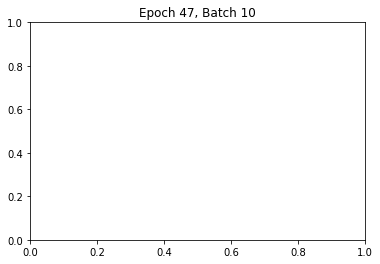

[[0.62021637 0.6177713  0.5664257  0.58463675 0.5649369  0.53172183
  0.52484643 0.5313087  0.5453943  0.5141304  0.5047928  0.5010501
  0.47524422 0.48745435 0.4934126  0.47587278 0.4700591  0.48400462
  0.4829424  0.48193604 0.4508525  0.43839565 0.43430984 0.44293725
  0.47546786 0.5395236  0.5604684  0.5771052  0.5667365  0.5492093
  0.5585434  0.5482759  0.56397647 0.5776148  0.5690966  0.59562427
  0.594804   0.6117935  0.62342024 0.6179163  0.6110674  0.5933446
  0.6177757  0.635222   0.633518   0.6395728  0.61905646 0.5972579
  0.58649826 0.5801769  0.5916613  0.59697133 0.6230294  0.64497215
  0.638169   0.6650902  0.69339687 0.685      0.68263584 0.6816291
  0.66742986 0.6510401  0.62046355 0.61352086 0.5912455  0.5868346
  0.59359366 0.60567874 0.6271825  0.6073534  0.63650435 0.6378427
  0.6219942  0.62595636 0.62180984 0.61515075 0.612305   0.60235447
  0.6056518  0.6248068  0.66633713 0.6903382  0.70174044 0.7222994
  0.6995304  0.6923228  0.6950367  0.6990387  0.7173936 

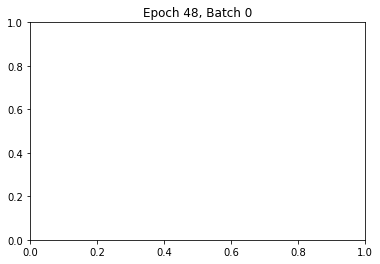

[[0.61229974 0.609875   0.55938    0.5774386  0.55801636 0.52508026
  0.51835006 0.5247045  0.53869563 0.507726   0.49857688 0.4948447
  0.4693438  0.48096153 0.48771662 0.47039047 0.464715   0.47849903
  0.47737467 0.47638804 0.44583416 0.43378583 0.42988423 0.43818286
  0.4699883  0.5324712  0.55224323 0.569074   0.5602163  0.54267
  0.5520696  0.5417678  0.55745703 0.57099825 0.56255597 0.58882475
  0.58778924 0.60404617 0.6151856  0.6105382  0.6041475  0.5856067
  0.60976887 0.6277752  0.625953   0.62884164 0.61093384 0.5904551
  0.5797617  0.5735023  0.58475655 0.58971274 0.61401695 0.6363159
  0.6310077  0.65419775 0.6812479  0.6732808  0.670712   0.6698858
  0.65593845 0.6395506  0.611806   0.6053824  0.5844882  0.58016294
  0.5863536  0.5987466  0.61992246 0.60045594 0.62625986 0.62885755
  0.61493665 0.6188689  0.6141312  0.60819304 0.60532373 0.5954582
  0.59806246 0.6166685  0.657858   0.6816373  0.6929533  0.7132104
  0.69078714 0.68360955 0.6863332  0.6902869  0.7083625  0

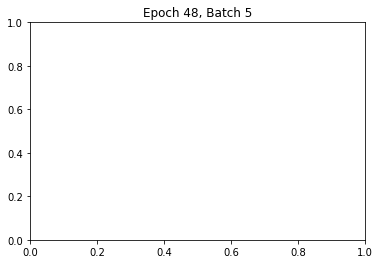

[[0.61533755 0.6130976  0.56140715 0.57973355 0.5601807  0.5270841
  0.52052546 0.526687   0.54071474 0.5096273  0.50051945 0.49684983
  0.47108132 0.482482   0.48975787 0.4723991  0.46669933 0.48034307
  0.4792489  0.4783451  0.4477491  0.43569258 0.43171862 0.44003913
  0.47190043 0.53434557 0.5542502  0.5710514  0.562264   0.5445803
  0.55411893 0.54372925 0.5595098  0.57305217 0.56459635 0.5910019
  0.58989626 0.60625285 0.61742705 0.6127458  0.6063619  0.5877257
  0.6119632  0.6300749  0.62821746 0.6311442  0.61324173 0.59258145
  0.5818332  0.57552403 0.58677506 0.59179324 0.61621493 0.6386724
  0.6332748  0.65654385 0.6827703  0.6747318  0.67237204 0.6712777
  0.6583645  0.64158493 0.6139958  0.607537   0.5865261  0.5821869
  0.5883358  0.60076004 0.6220117  0.60246676 0.6283724  0.6310044
  0.6170315  0.62085    0.6160154  0.6102032  0.60729057 0.5973938
  0.59996516 0.6186633  0.65964186 0.68336004 0.6947153  0.7153142
  0.6928678  0.6853072  0.68837315 0.69220406 0.7103766  0

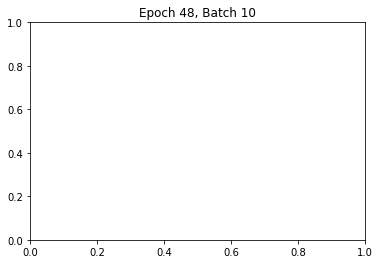

[[0.6138909  0.61147225 0.5595885  0.57803345 0.5584587  0.5253232
  0.51855594 0.5248134  0.53876776 0.50749785 0.49847463 0.4950953
  0.4691903  0.48074043 0.48713708 0.4699841  0.46406004 0.47792748
  0.47667313 0.47576517 0.44535735 0.43334764 0.42942    0.43774658
  0.46944958 0.5318984  0.55182683 0.5687384  0.55987287 0.5421809
  0.5516978  0.54134065 0.55710167 0.5707505  0.56218606 0.5887229
  0.58777493 0.60419685 0.6152959  0.61067194 0.6041101  0.5857124
  0.6099432  0.6279772  0.6261995  0.62877387 0.6108781  0.59029025
  0.57949    0.5731825  0.58447057 0.5893762  0.61384493 0.6363649
  0.6309666  0.65420574 0.6804876  0.6706702  0.6700447  0.66807264
  0.6559461  0.63913393 0.6114459  0.6049978  0.58397204 0.5796467
  0.58580595 0.5982539  0.6195052  0.5999286  0.62585133 0.6285198
  0.6146422  0.6185923  0.613897   0.60798055 0.6051256  0.5952135
  0.59796757 0.61692345 0.6582802  0.6820557  0.693391   0.7139445
  0.69118637 0.6840487  0.6867283  0.69067705 0.70885503 0

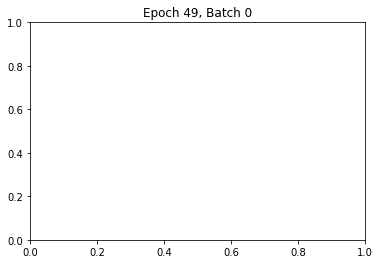

[[0.63072765 0.6282463  0.5761627  0.5950846  0.5751871  0.54158103
  0.53472316 0.54112697 0.55538195 0.52354634 0.51413786 0.5104943
  0.48402235 0.49598134 0.50242555 0.48465213 0.4787787  0.49282473
  0.49170718 0.49074337 0.45945278 0.44700494 0.44289088 0.45150325
  0.4841591  0.54772866 0.56792825 0.5848739  0.57609665 0.5581306
  0.5679338  0.55735195 0.57334137 0.5870493  0.57846767 0.60527635
  0.6041767  0.6207646  0.63209224 0.62739855 0.6208428  0.60233724
  0.62683743 0.64495355 0.64313173 0.6459665  0.6279277  0.6069312
  0.5960458  0.58960444 0.6009888  0.6061173  0.63081783 0.6536361
  0.6481844  0.6717244  0.6982498  0.6888243  0.6877714  0.68598187
  0.67378587 0.6567482  0.6288274  0.622251   0.60098577 0.59654117
  0.60303867 0.61528754 0.63692427 0.6171348  0.64331853 0.64603245
  0.63192785 0.6359103  0.63114786 0.62506443 0.62219167 0.61222786
  0.6150851  0.6342645  0.67609143 0.70016384 0.71160495 0.7324632
  0.7093897  0.70216984 0.7048557  0.708827   0.72722

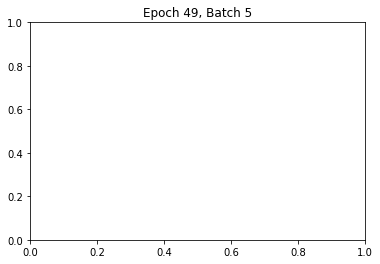

[[0.6047399  0.6023503  0.55115795 0.56989723 0.5503102  0.51732737
  0.5106469  0.5167529  0.5306161  0.49953812 0.49070752 0.4873934
  0.46163404 0.4730258  0.47917163 0.46175045 0.4558167  0.46939653
  0.46838832 0.46757752 0.43723005 0.4253651  0.4212964  0.42950296
  0.461051   0.52558976 0.54659206 0.5629351  0.55156916 0.5332494
  0.5431278  0.5324691  0.5481928  0.56171966 0.5542938  0.5814336
  0.57975906 0.59698385 0.60854304 0.6020009  0.5959464  0.57637125
  0.6003509  0.6199686  0.61726123 0.62504727 0.6046708  0.58113265
  0.5703525  0.56399417 0.5750775  0.58229333 0.60832316 0.6302735
  0.62280524 0.65009844 0.678194   0.67028373 0.6674817  0.6667463
  0.65241015 0.6362101  0.6053042  0.598406   0.5752273  0.5700528
  0.5761762  0.5896217  0.61150426 0.591844   0.6209541  0.6222795
  0.6049002  0.608771   0.60402215 0.5984401  0.59574413 0.5859123
  0.58865577 0.6073726  0.6482975  0.6717613  0.68287677 0.7036938
  0.6806901  0.6736917  0.6762597  0.6802729  0.69846046 

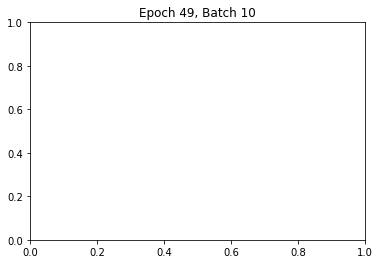

0.00022042777


In [35]:
# Make Session
net = tf.Session()
# Run initializer
net.run(tf.global_variables_initializer())

#Setup interactive plot
plt.ion()
fig = plt.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_data)
line2, = ax1.plot(y_data*0.5)
plt.show()

# Number of epochs and batch size
epochs = 50
batch_size = 256

for e in range(epochs):

    # Shuffle training data
    shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    X_train = X_train[shuffle_indices]
    y_train = y_train[shuffle_indices]

    # Minibatch training
    for i in range(0, len(y_train) // batch_size):
        start = i * batch_size
        batch_x = X_train[start:start + batch_size]
        batch_y = y_train[start:start + batch_size]
        # Run optimizer with batch
        net.run(opt, feed_dict={X: batch_x, Y: batch_y})
#        


# Show progress
        if np.mod(i, 5) == 0:
            # Prediction
            pred = net.run(out, feed_dict={X: X_test})
            line2.set_ydata(pred)
            print(pred)
            plt.title('Epoch ' + str(e) + ', Batch ' + str(i))
            file_name = 'img/epoch_' + str(e) + '_batch_' + str(i) + '.jpg'
            plt.savefig(file_name)
            plt.pause(0.01)
            
mse_final = net.run(mse, feed_dict={X: X_train, Y: y_train})
print(mse_final)